### Name: Stephanie Neureiter

<p style="font-size:24px; font-weight:bold; text-align:left;">Prüfung Immersion 13.4. bis 13.5.2025, Teil II (Python) <br> "Diabetes Hospital Readmission" <br> Fokus: Neuronale Netzwerke und Embeddings </p>

<hr style="width:50%; margin-left:25% !important; margin-right:25% !important;" />

__WICHTIGE HINWEISE ZUR BEARBEITUNG DIESES AUFGABENTEILS__

Der zweite Teil der Immersion-Prüfung ist in Python umzusetzen. Dabei soll ein bereits bestehendes und für geeignet befundenes Jupyter-Notebook als Vorlage verwendet und auf andere Daten und geänderte Fragestellungen angepasst werden.  

Als Vorlage für die Bearbeitung der Aufgaben PT1, PT2, PT3 und PT7 b) dient das Notebook zum Use Case "Prognose seltener Ereignisse: Credit Scoring" der DAV (siehe https://aktuar.de/de/wissen/fachinformationen/detail/prognose-seltener-ereignisse-credit-scoring/) und muss gemäß Aufgabenstellung angepasst werden (d.h. Texte, Codes und Notebook-Zellen zielführend ändern, ergänzen, einfügen, löschen oder auskommentieren). Das als Vorlage zu verwendende Notebook befindet sich in einer um die Aufgabenstellung ergänzten und leicht bearbeiteten Version namens `template2-credit-scoring.ipynb` den Prüfungsunterlagen und wird im Folgenden mit dem Kürzel CSN abgekürzt. Anmerkung: Dieses Notebook.

Die Aufgaben PT0, PT4 bis PT7 a) behandeln neue, bisher nicht in der Notebook-Vorlage behandelte Themen. Hierfür sind ausreichend viele Notebook-Zellen einzufügen und das Notebook ist der Aufgabenstellung entsprechend zu erweitern.

Für die Bearbeitung werden die im Aufgabenteil I (R-Notebook) erzeugten Datensätze `diabetic_data_bin.csv` und `icd9_data.csv` benötigt. 

Bei der Überarbeitung ist darauf zu achten, dass Sektionsnummern des Ausgangsnotebooks CSN (in den ersten drei Aufgaben PT-1 - PT-3) erhalten bleiben. Die dazugehörigen Überschriften können nach Bedarf angepasst werden. Inhaltlich sind die aus der Vorlage übernommenen Texte auf Deutsch zu übersetzen (z.B. mit DeepL) und insbesondere an die geänderten Sachverhalte (z.B. Daten und Ergebnisse) anzupassen. Kommentare in Code-Zellen müssen nicht übersetzt werden. Nicht benötigte Texte können gelöscht werden.

<hr style="width:50%; margin-left:25% !important; margin-right:25% !important;" />

<p style="font-size:22px; font-weight: 500; background-color: #E6E6E6; color: black; height: 50px; line-height: 46px; padding-left: 14px;">Inhaltsverzeichnis</p>

- [PT0 – Aufsetzen einer Entwicklungsumgebung](#pt0)
- [PT1 – Möglichst einfache Erstellung eines guten Benchmarkmodells](#pt1)
- [PT2 – Logistische Regression und Merkmalsanalyse](#pt2)
- [PT3 – Modelloptimierung anpassen und erweitern](#pt3)
- [PT4 – DXG-Diagnosegruppen bilden und Erzeugung von Embeddings vorbereiten](#pt4)
- [PT5 – Erzeugung stabiler Diagnose-Embeddings mit performantem neuronalem Netzwerk](#pt5)
- [PT6 – Embeddings joinen und bei Modellierung verwenden](#pt6)
- [PT7 – AutoML sowie Modellbewertung und Anwendung](#pt7)

## <a id="pt0"></a><font color='red'>Aufgabe PT0: Aufsetzen einer Entwicklungsumgebung [Lernziel 5.1; 1 Punkt]</font>

Für das Aufsetzen der Entwicklungsumgebung wird Python 3.10.16 empfohlen. Den Unterlagen wurde die Datei `requirements.txt` hinzugefügt. Auf Basis dieses Files können die benötigten Pakete installiert werden. Die verwendete Python-Version ist auszugeben. Zudem sind die installierten Pakete übersichtlich (pro Zeile fünf Pakete mit Versionsnummer) auszugeben.

__Lösung:__

In [1]:
import sys
import pkg_resources
import subprocess
from pathlib import Path

install_packages = False  # True setzen, falls Installation gewünscht
req_path = Path("data/requirements.txt")

if install_packages and req_path.exists():
    print("Installiere Pakete gemäß requirements.txt ...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", str(req_path)])
    subprocess.check_call([sys.executable, "-m", "pip", "install", "autogluon"])
elif not req_path.exists():
    print("Die Datei 'requirements.txt' wurde im Ordner 'data' nicht gefunden.")
else:
    print("Paketinstallation wurde übersprungen (install_packages = False).")

Paketinstallation wurde übersprungen (install_packages = False).


C:\Users\Stephanie Neureiter\AppData\Local\Temp\ipykernel_19200\844391218.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


**Python-Version**

Für die Bearbeitung wurde Python 3.10.11 verwendet. Die ursprünglich empfohlene Version war Python 3.10.16, ein Sicherheits-Bugfix-Release für die Legacy-3.10-Serie. Da Python 3.10 inzwischen nur noch mit Sicherheitsupdates gepflegt wird („Security Fixes Only“), war die empfohlene Version nicht mehr verfügbar.

📎 Quelle: [Python 3.10.16 Release Notes](https://www.python.org/downloads/release/python-31016/)


In [2]:
# Python-Version ausgeben
print("Python-Version:", sys.version.split()[0])

Python-Version: 3.10.11


**Installierte Pakete**

In [3]:
dists = sorted(f"{d.key}=={d.version}" for d in pkg_resources.working_set)

# 5 Pakete pro Zeile ausgeben
for i in range(0, len(dists), 5):
    print("  " + "  ".join(dists[i:i+5]))

  absl-py==2.1.0  accelerate==1.6.0  adagio==0.2.6  aiohappyeyeballs==2.6.1  aiohttp-cors==0.8.1
  aiohttp==3.11.18  aiosignal==1.3.2  alembic==1.15.2  annotated-types==0.7.0  antlr4-python3-runtime==4.9.3
  appdirs==1.4.4  asttokens==3.0.0  astunparse==1.6.3  async-timeout==5.0.1  attrs==25.3.0
  autocommand==2.2.2  autogluon.common==1.3.0  autogluon.core==1.3.0  autogluon.features==1.3.0  autogluon.multimodal==1.3.0
  autogluon.tabular==1.3.0  autogluon.timeseries==1.3.0  autogluon==1.3.0  backports.tarfile==1.2.0  beartype==0.20.2
  beautifulsoup4==4.13.4  bleach==6.2.0  blis==1.2.1  boto3==1.38.9  botocore==1.38.9
  cachetools==5.5.2  catalogue==2.0.10  catboost==1.2.7  certifi==2024.12.14  charset-normalizer==3.4.0
  click==8.1.8  cloudpathlib==0.21.0  cloudpickle==3.1.1  colorama==0.4.6  colorful==0.5.6
  colorlog==6.9.0  comm==0.2.2  confection==0.1.5  contourpy==1.3.1  coreforecast==0.0.15
  cycler==0.12.1  cymem==2.0.11  datasets==3.5.1  debugpy==1.8.11  decorator==5.1.1
  def

## <a id="pt1"></a><font color='red'>Aufgabe PT1: Möglichst einfache Erstellung eines guten Benchmarkmodells [Lernziel 5.1; 4 Punkte] </font>

Basierend auf dem Notebook CSN (Part A) sind folgende Anpassungen durchzuführen:

- Die Zellen vor dem Text "Part A: Quick & Easy" mit Bezug zum ursprünglichen Thema Credit Scoring sind zu entfernen.
- In "Part A: Quick & Easy": 
    - Alle im Notebook verwendeten Pakete sind in Sektion 1.1 zu ergänzen, nicht benötigte Imports sind zurückzubauen. Nutzen Sie einen `RANDOM_SEED` von 42.
    - Der in Sektion 1.2 verwendete Datensatz `../input/home-credit-default-risk/application_train.csv` ist durch den in Aufgabe R1 aus Teil I erzeugten Datensatz `diabetic_data_bin.csv` zu ersetzen. Welche Ergänzungen sind vorzunehmen, damit der Datensatz korrekt eingelesen wird?
    - Jedes eingelesene Feature, dessen Name auf „_id“ endet, ist auf den Datentyp „object“ zu setzen. Welchen Vorteil hat dieses Vorgehen?
    - Für Part A sind keine weiteren außer die im Notebook bereits vorhandenen Modifikationen am Datensatz durchzuführen. Falls einzelne Codeblöcke nicht benötigt werden, kommentieren Sie diese mit einer entsprechenden Anmerkung aus. Erinnerung: Beachten Sie hier und im restlichen Notebook den Allgemeinen Hinweis, dass Texte zu übersetzen und an den Datensatz anzupassen sind.

__Lösung:__

<h1 id="parta"
    style="font-size:22px; font-weight: 500; background-color: #E6E6E6; color: black; height: 50px; line-height: 46px; padding-left: 14px;">
    Part A: Quick & Easy
    <a class="anchor-link"
       href="#parta"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
</h1>

In Part A erstellen wir eine erste Ausgangsbasis für die Modellgüte mithilfe eines einfachen, aber effektiven CatBoost-Modells. Dieses erlaubt uns eine schnelle Einschätzung der Vorhersagekraft unseres Datensatzes.

In den folgenden Abschnitten werden wir komplexere Modelle und Optimierungsmethoden untersuchen, um die Vorhersagen zu verbessern und ein tieferes Verständnis für das Patientenverhalten im Zusammenhang mit dem Krankheitsverlauf zu gewinnen.


<h1 id="a01"
    style="font-size:18px; font-weight:bold;">
    1. Entwicklung eines ersten Basis-Modells für maschinelles Lernen
    <a class="anchor-link"
       href="#a01"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In diesem ersten Abschnitt erstellen wir schnell ein einfaches Machine-Learning-Modell für eine binäre Klassifikationsaufgabe. Ziel ist es, beispielsweise das Risiko bestimmter gesundheitlicher Ereignisse vorherzusagen. Dieses Basis-Modell dient als Referenzpunkt für alle nachfolgenden Machine-Learning-Modelle.

<h2 style="font-size:16px; font-weight:bold;">1.1 Einrichtung der Modellierungsumgebung</h2>

Wir beginnen mit dem Import aller benötigten Bibliotheken, der Anpassung der Visualisierungsparameter und dem Setzen eines Zufallsseeds, um die Reproduzierbarkeit unserer Ergebnisse sicherzustellen.

In [4]:
# --- System & Warnungen ---
import os
import warnings
os.environ['PYTHONWARNINGS'] = 'ignore'
warnings.filterwarnings("ignore")

# --- Basisbibliotheken für Datenanalyse & Visualisierung ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
from scipy.stats import uniform, loguniform

# --- Anzeigeoptionen ---
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
COLOR_LIGHT, COLOR_DARK = '#849CBE', '#00548A'

# --- Scikit-learn: Preprocessing, Modellierung & Evaluation ---
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# --- Gradient Boosting Frameworks ---
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# --- Klassische Regression mit Statsmodels ---
import statsmodels.formula.api as smf

# --- TensorFlow & Keras für neuronale Netze ---
import tensorflow as tf
from tensorflow.keras.utils import set_random_seed # type: ignore
from tensorflow.keras import layers, Model, Input # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

# --- Speichern & Laden von Modellen ---
import pickle
import json

# --- Jupyter-Komfort ---
from IPython.display import display, HTML

# --- AutoML ---
from autogluon.tabular import TabularPredictor

# --- Reproduzierbarkeit ---
RANDOM_SEED = 42
set_random_seed(RANDOM_SEED)

**Hinweis:** Der Codeblock zur Begrenzung der GPU-Speichernutzung in TensorFlow wird hier nicht benötigt, da alle Berechnungen in diesem Notebook ausschließlich auf der CPU ausgeführt werden.

In [5]:
# Prevent TensorFlow From Fully Allocating GPU Memory
# Ref: https://www.tensorflow.org/guide/gpu#limiting_gpu_memory_growth
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

**Steuerung von Modell-Läufen**

In diesem Notebook werden manuell gesetzte Flags verwendet, um gezielt die Ausführung einzelner Modellläufe und Codeblöcke zu steuern. Diese Struktur ermöglicht es, das Notebook flexibel auszuführen, ohne bei jedem Lauf alle Modellvarianten erneut trainieren zu müssen. Die Flags werden für jede Modellvariante als Boolean (`True`/`False`) definiert. Wenn ein Flag auf `True` gesetzt ist, wird das jeweilige Modell neu trainiert. Ist das Flag auf `False` gesetzt, wird stattdessen auf bereits gespeicherte Ergebnisse zurückgegriffen. Diese Vorgehensweise dient der Zeitersparnis sowie der strukturierten Reproduzierbarkeit komplexer Modellergebnisse.

In [6]:
# Flags belegen
run_CB1 = False
run_CB2 = False
run_CB4 = False
run_CB5 = False
run_LR1 = False

run_CB_RS = False
run_CB6 = False
run_LGBM_RS = False
run_LGBM = False
run_XGB_RS = False
run_XGB = False

run_LR2 = False
run_CB7 = False

run_AG_PT3 = False
run_AG_PT6 = False

In [7]:
# Funktion zum Speichern (bzw. Aktualisieren) von Modellinfos
def update_model_metadata(model_id, **kwargs):
    path = "save/model_summary.json"

    if os.path.exists(path):
        with open(path, "r") as f:
            metadata = json.load(f)
    else:
        metadata = {}

    # Falls Modell schon existiert, erweitern/aktualisieren
    if model_id not in metadata:
        metadata[model_id] = {}

    for key, value in kwargs.items():
        metadata[model_id][key] = round(value, 4) if isinstance(value, float) else value

    with open(path, "w") as f:
        json.dump(metadata, f, indent=2)

In [8]:
# Funktion zum Laden von Modellinfos
def load_model_metadata(path="save/model_summary.json") -> pd.DataFrame:
    if not os.path.exists(path):
        print("Datei nicht gefunden:", path)
        return pd.DataFrame()

    with open(path, "r") as f:
        meta_dict = json.load(f)

    df = pd.DataFrame.from_dict(meta_dict, orient='index')
    df.index.name = "model_id"
    return df.reset_index()


<h2 style="font-size:16px; font-weight:bold;">1.2 Einlesen und erste Analyse der Eingangsdaten</h2>

Um die Komplexität der Datenvorverarbeitung zu reduzieren, konzentrieren wir uns im gesamten Notebook auf den zentralen Datensatz `diabetic_data_bin.csv`. Dieser enthält bereits eine Auswahl wichtiger Merkmale sowie das Zielattribut zur binären Klassifikation.

Durch die Verwendung dieses vorbereiteten Datensatzes können die Modelle effizient trainiert werden, ohne dass aufwendige Vorverarbeitungsschritte notwendig sind.

Im nächsten Schritt wird der Datensatz eingelesen. Anschließend geben wir die Dimensionen der Daten (Anzahl der Zeilen und Spalten) aus und zeigen einige zufällig ausgewählte Zeilen, um einen ersten Eindruck vom Inhalt und der Struktur der Daten zu bekommen.

In [9]:
# Load the dataset into a pandas DataFrame
df_raw = pd.read_csv("data/diabetic_data_bin.csv", sep=";")  # Der Datensatz verwendet deutsches Format und ist daher mit Semikolon (;) statt Komma (,) getrennt.

# Display the dimensions of the dataset (rows, columns)
print(f"Input Dataset dimensions (rows, columns): {df_raw.shape}")

# Display a random sample of 10 rows from the dataset to inspect data
sample_html = df_raw.sample(n=7, random_state=RANDOM_SEED).to_html()
scrollable_html = f"""
<div style="max-height: 300px; overflow-y: auto; border: 1px solid #ddd; padding: 10px">
{sample_html}
</div>
"""

display(HTML(scrollable_html))

Input Dataset dimensions (rows, columns): (47751, 51)


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,group_diag_1,group_diag_2,group_diag_3,TARGET
47523,Asian,Female,[50-60),?,3,6,1,1,?,Orthopedics,18,4,6,0,0,0,722,250,401,4,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Musculoskeletal,Diabetes,Circulatory,0
8582,Caucasian,Male,[40-50),?,2,6,4,8,?,?,45,6,53,0,0,0,410,414,401,7,NaN,NaN,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,Circulatory,Circulatory,Circulatory,0
42024,Caucasian,Female,[70-80),?,1,3,7,3,MC,?,47,0,13,0,0,0,25012,427,276,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Diabetes,Circulatory,Other,0
15219,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,InternalMedicine,35,2,7,0,0,0,25013,280,789,5,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,Diabetes,Other,Neoplasms,0
45649,Caucasian,Female,[60-70),?,1,2,7,1,?,?,23,0,11,0,0,0,410,414,250,5,NaN,>8,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Circulatory,Circulatory,Diabetes,1
23448,Caucasian,Male,[80-90),?,3,28,1,1,SP,?,55,0,13,0,0,0,294,312,414,5,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Other,Other,Circulatory,1
39945,Caucasian,Male,[40-50),?,1,1,7,4,?,?,56,2,16,1,0,0,535,584,25041,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Other,Genitourinary,Diabetes,1


Anschließend überprüfen wir die Verteilung der Zielvariable `TARGET`, um festzustellen, ob der Datensatz ausgewogen oder unausgewogen ist.

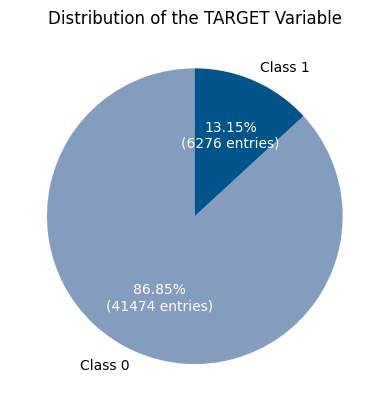

In [10]:
# Count the occurrences of each unique value in the 'TARGET' column
target_counts = df_raw['TARGET'].value_counts()

# Calculate the total number of entries
total_entries = len(df_raw['TARGET'])

# Define a custom formatting function for the pie chart labels
def custom_autopct(pct):
    absolute = int(pct/100.*total_entries)
    return "{:.2f}%\n({:d} entries)".format(pct, absolute)

# Create a pie chart to visualize the distribution of classes in the 'TARGET' column
pie_chart, _, autotexts = plt.pie(target_counts, labels=target_counts.index.map({0: 'Class 0', 1: 'Class 1'}),
                                  autopct=custom_autopct, startangle=90,
                                  colors=[COLOR_LIGHT, COLOR_DARK], wedgeprops={'edgecolor': 'none'})

# Set the color of the autopct texts to white
for autotext in autotexts:
    autotext.set_color('white')

# Plot the pie chart
plt.title('Distribution of the TARGET Variable')
plt.show()

Das Kreisdiagramm zeigt eine deutliche Unausgewogenheit in der Verteilung der Zielvariable `TARGET`: Die kritische Klasse `1` tritt deutlich seltener auf als die Klasse `0`.

Die korrekte Klassifikation seltener Ereignisse stellt bei unausgewogenen Datensätzen, wie hier bei der Variable `TARGET`, eine besondere Herausforderung dar. In solchen Fällen empfiehlt es sich, anstelle der Genauigkeit (Accuracy) die Fläche unter der ROC-Kurve (AUC – Area Under the Curve) als Leistungskennzahl heranzuziehen.

Während Accuracy die generelle Vorhersagegenauigkeit misst, kann sie bei stark ungleichen Klassenverteilungen irreführend sein, da sie die Leistung auf der Minderheitsklasse unzureichend abbildet. Die AUC hingegen bewertet die Fähigkeit eines Modells, Beobachtungen korrekt zu rangieren, und ist damit besonders aussagekräftig für die Unterscheidung zwischen Klassen in solchen Kontexten.

Die AUC berücksichtigt das Verhältnis zwischen wahr-positiver und falsch-positiver Rate und bietet somit eine differenziertere Einschätzung der Modellleistung bei der Erkennung seltener Ereignisse. Wir werden uns damit in Part B noch näher befassen.

<h2 style="font-size:16px; font-weight:bold;">1.3 Umwandlung von ID-Spalten und Ersetzen fehlender kategorialer Werte</h2>

**ID-Spalten in `object` umwandeln**

Warum werden ID-Spalten in den Datentyp `object` umgewandelt?

IDs sind eindeutige Kennzeichen (z. B. Patienten-IDs, Fall-IDs) und enthalten keine numerisch sinnvolle Information.

Durch die Umwandlung in den Datentyp `object` wird verhindert, dass Machine-Learning-Modelle diese Spalten fälschlicherweise als numerische oder kategorielle Merkmale interpretieren und Zusammenhänge erkennen wollen, die es inhaltlich gar nicht gibt.

**Vorteile:**
- Die Modelle lernen nicht auf Basis von reinen Identifikatoren.
- Es wird Rechenzeit gespart, da keine unnötige Verarbeitung von ID-Spalten erfolgt.
- Die Datenvorbereitung bleibt sauber und logisch nachvollziehbar.


In [11]:
id_columns = [col for col in df_raw.columns if col.lower().endswith("id")]
df_raw[id_columns] = df_raw[id_columns].astype("object")

summary = pd.DataFrame({
    'column': id_columns,
    'dtype': [df_raw[col].dtype for col in id_columns]
})

print(summary)

                     column   dtype
0         admission_type_id  object
1  discharge_disposition_id  object
2       admission_source_id  object


**Ersetzen fehlender kategorialer Werte**

Während viele Machine-Learning-Verfahren die in Part B beschriebenen, aufwändigeren Schritte der Datenvorbereitung erfordern, genügt für CatBoost – das in diesem Abschnitt verwendete ML-Verfahren – eine minimale Vorbereitung. 

Dabei werden fehlende Werte in kategorialen Merkmalen durch einen vordefinierten Platzhalterwert ersetzt.

Im Rahmen unserer Analyse aus Teil I wurde festgestellt, dass fehlende Werte im Datensatz häufig durch das Symbol „?“ oder "n.a." gekennzeichnet waren. Diese werden hier durch `NaN` ersetzt, um sie korrekt als fehlend behandeln zu können.


In [12]:
# Identify categorical features by data type 'object'
categorical_features = list(df_raw.select_dtypes(include=['object']).columns)

# Ersetze verschiedene Platzhalter für fehlende Werte durch echte np.nan
missing_values = ["?", "n.a.", "NA", "NaN", "null"]
df_raw[categorical_features] = df_raw[categorical_features].replace(missing_values, np.nan)

# Compute the number of unique values for each categorical feature and reset the index to make 'Feature Names' a column
categorical_feature_counts = df_raw[categorical_features].nunique().reset_index()

# Set the column names to 'Feature' and 'Number of Unique Values'
categorical_feature_counts.columns = ['Categorical Feature', 'Number of Unique Values']

# Sort the DataFrame by 'Number of Unique Values' in descending order
categorical_feature_counts.sort_values(by='Number of Unique Values', ascending=False, inplace=True)

# Display the resulting DataFrame
display(categorical_feature_counts.style.hide(axis='index'))

Categorical Feature,Number of Unique Values
diag_3,723
diag_2,677
diag_1,660
medical_specialty,44
payer_code,16
discharge_disposition_id,15
admission_source_id,11
age,10
group_diag_3,9
group_diag_1,9


Als Nächstes identifizieren wir die kategorialen Merkmale, die fehlende Werte enthalten, und berechnen den Anteil der fehlenden Werte in Prozent.

In [13]:
# Define a function that returns a DataFrame with features containing missing values
# and the percentage of missing values for each of these features
def missing_values_percentage(data):
    # Calculate percentages and create a DataFrame
    nan_percentages = data.isna().sum() * 100 / len(data)
    missing_values_df = pd.DataFrame({
        'Categorical Feature': nan_percentages.index, 
        'Missing Percent': nan_percentages.values
    })
    # Format the 'Missing Percent' column as a percentage string with two decimal places
    missing_values_df['Missing Percent'] = missing_values_df['Missing Percent'].apply(lambda x: f'{x:.2f}%')
    # Filter out features without missing values and sort by percentage
    missing_values_df = missing_values_df[missing_values_df['Missing Percent'] != '0.00%']
    missing_values_df.sort_values(by='Missing Percent', ascending=False, inplace=True)
    return missing_values_df

# Calculate the proportion of missing values for the categorical features
missing_values_df = missing_values_percentage(df_raw[categorical_features])

# Display the resulting DataFrame without the index using the new recommended Styler.hide method
missing_values_df_styled = missing_values_df.style.hide(axis='index')
display(missing_values_df_styled)

Categorical Feature,Missing Percent
weight,96.93%
max_glu_serum,95.42%
A1Cresult,81.19%
medical_specialty,47.42%
payer_code,42.68%
race,3.11%
diag_3,2.02%
group_diag_3,2.02%
diag_2,0.51%
group_diag_2,0.51%


Um fehlende Werte in kategorialen Spalten zu behandeln, ohne Daten zu imputieren oder Beobachtungen zu verwerfen, ordnen wir alle fehlenden Einträge einer eigenen Kategorie namens `__missingValue__` zu. 

Diese Strategie ermöglicht es den eingesetzten Machine-Learning-Algorithmen, das Vorhandensein von fehlenden Werten als eigenständige Information zu nutzen. Dadurch bleibt der vollständige Umfang des Datensatzes erhalten und die Eingabestruktur für das Modell unverändert.

In [14]:
# Replace missing values with a new category '__missingValue__' in all categorical columns
df_raw[categorical_features] = df_raw[categorical_features].fillna('__missingValue__')

<h2 style="font-size:16px; font-weight:bold;">1.4 Datenaufteilung in Trainings-, Validierungs- und Testdaten</h2>

Beim Training eines Machine-Learning-Klassifikators geht es nicht nur darum, die Trainingsdaten zu modellieren oder sich diese einzuprägen – moderne ML-Modelle sind oft groß und leistungsfähig genug, um genau das zu tun. 

Ziel ist es jedoch, dass das Modell auf unbekannte Daten verallgemeinern kann. Daher wird die Modellgüte in der Regel anhand eines zurückgehaltenen Testdatensatzes bewertet, der im Training nie verwendet wurde.

Um eine konsistente Grundlage für spätere Optimierungsstrategien zu schaffen, teilen wir den Datensatz zufällig in drei Teile auf:

* <u>Trainingsdaten</u>: 70 % der Daten werden für das Modelltraining verwendet  
* <u>Validierungsdaten</u>: 15 % dienen zur Bewertung während der Entwicklung und zur Anpassung des Modells  
* <u>Testdaten</u>: 15 % werden zur finalen Beurteilung der Generalisierungsfähigkeit aller Modelle verwendet (siehe [Abschnitt 11](#a11))

Diese Aufteilung ermöglicht ein effektives Modelltraining, gezielte Hyperparameteroptimierung zur Vermeidung von Overfitting und eine objektive Beurteilung der Modellleistung auf neuen, nicht bekannten Daten.

In [15]:
# Constants for data split ratios
TRAIN_RATIO = 0.7
VAL_TEST_RATIO = 0.5  # Splitting the remaining 30% equally into validation and test

# Separate the features (X) and the target (y)
X_raw = df_raw.drop(columns=['TARGET'], axis=1)
y_raw = df_raw['TARGET']

# Split the dataset into a training set and a combined validation and test set
X_raw_train, X_raw_val_test, y_raw_train, y_raw_val_test = train_test_split(
    X_raw, y_raw, train_size=TRAIN_RATIO, random_state=RANDOM_SEED, stratify=y_raw
)

# Further split the combined validation and test set into separate validation and test sets
X_raw_val, X_raw_test, y_raw_val, y_raw_test = train_test_split(
    X_raw_val_test, y_raw_val_test, test_size=VAL_TEST_RATIO, random_state=RANDOM_SEED, stratify=y_raw_val_test
)

# Verify the dimensions of the training, validation, and test sets by displaying (rows, columns)
print(f"Training set dimensions (rows, columns):   {X_raw_train.shape}")
print(f"Validation set dimensions (rows, columns):  {X_raw_val.shape}")
print(f"Test set dimensions (rows, columns):        {X_raw_test.shape}")

Training set dimensions (rows, columns):   (33425, 50)
Validation set dimensions (rows, columns):  (7163, 50)
Test set dimensions (rows, columns):        (7163, 50)


Für die drei Datenteilmengen überprüfen wir die Mittelwerte und Standardabweichungen der Zielvariable `y`, um sicherzustellen, dass die Verteilung in allen Gruppen vergleichbar ist.

In [16]:
# Calculate TARGET mean and std for each set
stats_raw = pd.DataFrame({
    'Mean': [y_raw_train.mean(), y_raw_val.mean(), y_raw_test.mean()],
    'Standard Deviation': [y_raw_train.std(), y_raw_val.std(), y_raw_test.std()]
}, index=['Train', 'Validation', 'Test']).round(4)

print(stats_raw)

              Mean  Standard Deviation
Train       0.1315              0.3379
Validation  0.1315              0.3380
Test        0.1314              0.3378


Die zufällig entstandenen Unterschiede in den Mittelwerten der Zielvariablen wirken auf den ersten Blick gering, können jedoch Einfluss auf die finale Bewertung der Modelle haben – wie wir in [Abschnitt 11](#a11) noch sehen werden.

<h2 style="font-size:16px; font-weight:bold;">1.5 Training eines CatBoost-Standardklassifikators (Baseline-Modell)</h2>

Im nächsten Schritt wenden wir das CatBoost-Modell auf unseren vorbereiteten Datensatz an. Dabei verwenden wir die Standardeinstellungen, um eine erste, unkomplizierte Bewertung ohne Hyperparameter-Optimierung durchzuführen.

In [17]:
model_id = "CB1"
model_path = "save/CB1.cbm"

if os.path.exists(model_path) and not run_CB1:
    # Modell laden
    CB1 = CatBoostClassifier()
    CB1.load_model(model_path)
    print(f"Modell '{model_id}' geladen.")
    meta_df = load_model_metadata()
    elapsed_time_CB1 = meta_df.loc[meta_df["model_id"] == "CB1", "training_time_seconds"].values[0]
else:
    # Training
    start = time.time()
    CB1 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED)
    CB1.fit(X_raw_train, y_raw_train, cat_features=categorical_features, logging_level='Silent')
    elapsed_time_CB1 = time.time() - start
    CB1.save_model(model_path, format="cbm")

    # Zeit + Modell speichern
    update_model_metadata(
        model_id=model_id,
        model="CatBoost",
        training_time_seconds=elapsed_time_CB1,
        random_seed=RANDOM_SEED,
        eval_metric="AUC"
    )

print(f"Training abgeschlossen in {elapsed_time_CB1:.2f} Sekunden.")

Modell 'CB1' geladen.
Training abgeschlossen in 131.36 Sekunden.


Um die Vielzahl an Anpassungsmöglichkeiten bei der Feinabstimmung des CatBoost-Modells zu veranschaulichen, zeigen wir eine vollständige Übersicht aller Hyperparameter sowie deren Standardeinstellungen.

In [18]:
# Display all model hyperparameters in a DataFrame
hyperparams_list = [(k, v) for k, v in CB1.get_all_params().items()]
hyperparams_df = pd.DataFrame(hyperparams_list, columns=['Hyperparameter', 'Value'])
display(hyperparams_df.style.hide(axis='index'))

Hyperparameter,Value
nan_mode,Min
eval_metric,AUC
combinations_ctr,"['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']"
iterations,1000
sampling_frequency,PerTree
fold_permutation_block,0
leaf_estimation_method,Newton
random_score_type,NormalWithModelSizeDecrease
counter_calc_method,SkipTest
grow_policy,SymmetricTree


Um erste Einblicke in das Verhalten des trainierten Modells zu erhalten, visualisieren wir die integrierten Feature-Wichtigkeiten. Diese zeigen auf, welche Merkmale den größten Einfluss auf die Modellvorhersagen haben.

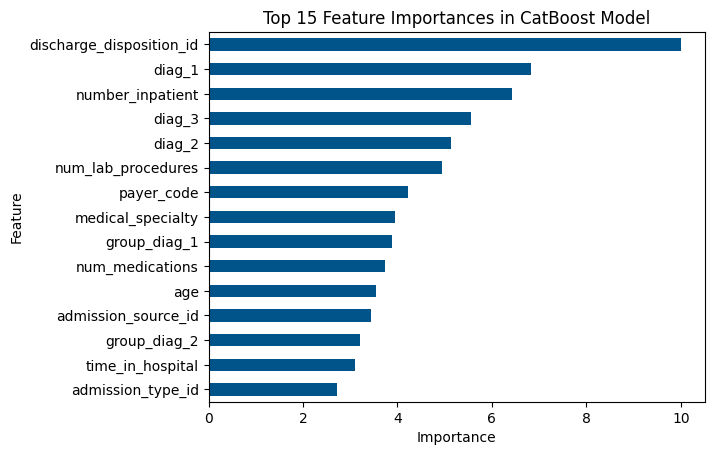

In [19]:
# Extract the 15 most important features and create a Series for plotting
fi = CB1.get_feature_importance(type="FeatureImportance")
feature_importances = (pd.Series(fi, index=X_raw_train.columns).nlargest(15))

# Plot the feature importances
feature_importances.plot(kind='barh', color=COLOR_DARK)
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances in CatBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Die obige Visualisierung der Feature-Wichtigkeiten zeigt, dass `discharge_disposition_id` den stärksten Einfluss auf die Vorhersagen des CatBoost-Modells hat. Auch `number_inpatient`, `diag_1` und `diag_2` spielen eine zentrale Rolle.

Weitere wichtige Merkmale sind die Aufnahmekategorie (`admission_type_id`), die Herkunft der Einweisung (`admission_source_id`) sowie diverse diagnostische und klinische Informationen wie Laborverfahren, Medikamentenzahl und der Krankenhausaufenthalt (`time_in_hospital`). 

Diese Merkmale liefern dem Modell entscheidende Hinweise auf das Risiko einer Wiederaufnahme.

Im nächsten Schritt bewerten wir die Leistung unseres CatBoost-Modells anhand des Validierungsdatensatzes. Als Evaluierungsmetrik verwenden wir die Fläche unter der ROC-Kurve (AUC), wie oben beschrieben.

In [20]:
# Calculate the AUC score using the model's prediction probabilities for the positive class
auc_CB1 = roc_auc_score(y_raw_val, CB1.predict_proba(X_raw_val)[:, 1])

# Print the validation AUC
print(f'The validation AUC of the CatBoost model with standard hyperparameters is: {auc_CB1:.6f}')

# AUC speichern
update_model_metadata(model_id="CB1", val_auc=auc_CB1)

The validation AUC of the CatBoost model with standard hyperparameters is: 0.720714


Zusammenfassend wurde in Part A eine solide Ausgangsbasis für unsere binäre Klassifikationsaufgabe geschaffen – mithilfe eines CatBoost-Modells, das ohne aufwändige Datenvorbereitung und ohne Anpassung von Hyperparametern eingesetzt wurde.

Obwohl CatBoost ein komplexes Modell ist, lässt es sich sehr einfach implementieren und liefert bereits mit den Standardparametern eine starke Vorhersageleistung. 

Dieses Benchmark-Modell dient als Referenzpunkt, an dem wir die Leistungsfähigkeit der in den folgenden Abschnitten entwickelten, aufwendigeren Modellvarianten messen können.

<hr style="width:50%; margin-left:25% !important; margin-right:25% !important;" />

## <a id="pt2"></a><font color='red'>Aufgabe PT2: Logistische Regression und Merkmalsanalyse [Lernziele 2.2, 5.1; 10 Punkte] </font>

Basierend auf dem Notebook CSN (Part B) sind folgende Anpassungen durchzuführen:

* a) In Abschnitt 2.1 sind nur notwendige Operationen durchzuführen. Was kann (begründet) auskommentiert werden?
* b) Für die logistische Regression in Abschnitt 2.2 ist folgendes Vorgehen zu wählen: Orientieren Sie sich an der Feature Importance Liste von Catboost, und konstruieren Sie ein Modell mit mindestens fünf Features. Beachten Sie dabei die Merkmalsskala. Wo ergeben sich Probleme und wie sind diese zu begründen?
* c) Aus Abschnitt 2.3 sind nur relevante Bestandteile zu bearbeiten. Was kann (begründet) auskommentiert werden?
* d) Die Analyse der kategoriellen Merkmale in Abschnitt 3.1 ist auf `group_diag_1`, `group_diag_2`, `group_diag_3`, `age`, `medical_specialty`, `payer_code` und `discharge_disposition_id` zu beschränken.
* e) Bei der Analyse der numerischen Merkmale in Abschnitt 3.2 sind `number_outpatient`, `number_inpatient`, `num_procedures`, `num_lab_procedures`, `num_medications`, `time_in_hospital`, `number_emergency` sowie `number_diagnoses` zu berücksichtigen.

- Abschnitt 3.3 sowie 4 (Enhancing CatBoost's Performance with New Features) werden an dieser Stelle nicht berücksichtigt.
- Abschnitt 5 wird nicht berücksichtigt.

* f) Abschnitt 6 ist auszuführen:
    - In Abschnitt 6.3 ist der `non_event_factor` begründet anzupassen.
    - Im Anschluss an Abschnitt 6.4 ist ein neuer Abschnitt 6.5 einzufügen, in dem die bisherigen Ergebnisse der Modelle gegenübergestellt werden sollen. Orientieren Sie sich dabei an Abschnitt 4.2 des CSN Notebooks.

<h1 id="partb"
    style="font-size:22px; font-weight: 500; background-color: #E6E6E6; color: black; height: 50px; line-height: 46px; padding-left: 14px;">
    Part B: Erkenntnisse aus Daten gewinnen und modellieren
    <a class="anchor-link"
       href="#partb"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
</h1>

In Teil B verfeinern wir unsere Machine-Learning-Strategie, um aussagekräftige Erkenntnisse aus den Daten zu gewinnen. Wir beginnen mit einer detaillierten Betrachtung der logistischen Regression – einem zentralen Verfahren in der aktuariellen Analyse – in ihrer klassischen, nicht regularisierten Form. Anschließend führen wir eine gezielte explorative Datenanalyse und Feature Engineering durch, um die Vorhersagekraft unserer Modelle weiter zu verbessern. Ein besonderer Fokus liegt dabei auf der Erklärbarkeit der Modelle. Zum Abschluss bereiten wir den Boden für die weiterführenden Modellierungsverfahren in Teil C, indem wir zentrale Preprocessing-Schritte wie Kodierung, Skalierung und Stichprobenziehung durchführen.

<h1 id="a02"
    style="font-size:18px; font-weight:bold;">
    2. Logistische Regression: Ein klassischer Ansatz zur Klassifikation
    <a class="anchor-link"
       href="#a02"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In diesem Abschnitt befassen wir uns mit der logistischen Regression – einer klassischen und grundlegenden Methode für binäre Klassifikationsaufgaben. Da dieses Verfahren nicht mit fehlenden Werten umgehen kann, beginnen wir mit der Imputation fehlender numerischer Merkmale durch Medianwerte. Anschließend implementieren und evaluieren wir ein klassisches Logistikmodell mit geringer Parametrisierung. Daraufhin passen wir das CatBoost-Modell erneut an den modifizierten Datensatz an, vergleichen dessen Leistung mit dem bisherigen Benchmark-Modell und interpretieren die Ergebnisse.


<h2 style="font-size:16px; font-weight:bold;">2.1 Datenvorbereitung: Imputation fehlender numerischer Werte mit dem Median</h2>

In diesem Unterabschnitt beschäftigen wir uns mit dem Umgang fehlender Werte, da die logistische Regression vollständige Datensätze benötigt, um Vorhersagen und Modellparameter korrekt berechnen zu können. Die fehlenden Werte in den kategorialen Merkmalen haben wir bereits in Unterabschnitt 1.3 durch die Einführung einer eigenen Kategorie ersetzt. Für numerische Merkmale verwenden wir den Median, da dieser robust gegenüber Ausreißern ist und die Verteilung schief verteilter Datensätze besser bewahrt. Obwohl die Median-Imputation die Variabilität der Daten verringern und bei nicht zufällig fehlenden Werten zu Verzerrungen führen kann, stellt sie dennoch eine einfache und praxistaugliche Methode dar, um ein erstes Basismodell in binären Klassifikationsaufgaben zu erstellen. Der folgende Codeabschnitt zeigt, wie wir fehlende Werte in numerischen Merkmalen mithilfe des Medians aus dem Trainingsdatensatz imputieren, um Datenlecks zu vermeiden.


In [21]:
# Identify numerical features
numerical_features = list(X_raw_train.select_dtypes(exclude=['object']).columns)

# Copy the Input Data
df_pre = df_raw.copy()

# Ersetze verschiedene Platzhalter für fehlende Werte durch echte np.nan
missing_values = ["?", "n.a.", "NA", "NaN", "null"]
df_pre[numerical_features] = df_pre[numerical_features].replace(missing_values, np.nan)

# Replace missing values for numeric features by median value from the training data
for col in numerical_features:
    median_value = X_raw_train[col].median()
    df_pre[col] = df_pre[col].fillna(median_value)

# Berechne die Anzahl fehlender Werte in df_pre inklusive spezieller Platzhalter
num_missing = (
    df_pre.isnull().sum().sum() +                          # echte NaN-Werte
    (df_pre == "?").sum().sum() +                          # Platzhalter für fehlend
    (df_pre == "n.a.").sum().sum()                         # zusätzlicher Platzhalter
)

print(f"\nAnzahl der fehlenden Werte: {num_missing}")


Anzahl der fehlenden Werte: 0


Hinweis: Im ursprünglichen Datensatz des Credit Scoring Use Cases gab es eine sehr seltene Ausprägung („XNA“) in der Geschlechtsspalte `CODE_GENDER`. Diese hat die Konvergenz der logistischen Regression beeinträchtigt und wurde daher in „F“ umkodiert.

In unserem Datensatz (`gender`) liegen jedoch ausschließlich die Werte „Female“ und „Male“ vor. Da keine seltenen oder ungültigen Ausprägungen existieren, ist dieser Schritt bei uns nicht erforderlich und wurde entsprechend auskommentiert.

In [22]:
print(df_pre["gender"].value_counts(dropna=False))

# Replace very rare values
#print("\nGender_Frequency: ", df_pre.CODE_GENDER.value_counts())
#df_pre.loc[df_pre["CODE_GENDER"] != "M", "CODE_GENDER"] = "F"

gender
Female    25152
Male      22599
Name: count, dtype: int64


Wie bereits in Unterabschnitt 1.4 durchgeführt, teilen wir auch hier unseren vorverarbeiteten Datensatz in getrennte Trainings-, Validierungs- und Testmengen auf. 

Dieser Schritt ist entscheidend für das Training, die Feinabstimmung und die Bewertung unserer Machine-Learning-Modelle. Er stellt sicher, dass das Modell auf Daten validiert und getestet wird, die es während des Trainings nicht gesehen hat.

In [23]:
# Constants for data split ratios
TRAIN_RATIO = 0.7
VAL_TEST_RATIO = 0.5  # Splitting the remaining 30% equally into validation and test

# Separate the features (X) and the target (y) after preprocessing
X_pre = df_pre.drop(['TARGET'], axis=1)
y_pre = df_pre['TARGET']

# Split the preprocessed dataset into a training set and a combined validation and test set
X_pre_train, X_pre_val_test, y_pre_train, y_pre_val_test = train_test_split(X_pre, y_pre, train_size=TRAIN_RATIO, random_state=RANDOM_SEED, stratify=y_pre)

# Further split the combined validation and test set into separate validation and test sets
X_pre_val, X_pre_test, y_pre_val, y_pre_test = train_test_split(X_pre_val_test, y_pre_val_test, test_size=VAL_TEST_RATIO, random_state=RANDOM_SEED, stratify=y_pre_val_test)

# Verify the dimensions of the training, validation, and test sets by displaying (rows, columns)
print(f"Preprocessed training set dimensions (rows, columns):   {X_pre_train.shape}")
print(f"Preprocessed validation set dimensions (rows, columns): {X_pre_val.shape}")
print(f"Preprocessed test set dimensions (rows, columns):       {X_pre_test.shape}")

Preprocessed training set dimensions (rows, columns):   (33425, 50)
Preprocessed validation set dimensions (rows, columns): (7163, 50)
Preprocessed test set dimensions (rows, columns):       (7163, 50)


<h2 style="font-size:16px; font-weight:bold;">2.2 Implementierung der logistischen Regression: Modellanpassung und Leistungsbewertung</h2>

Für die Analyse mit der logistischen Regression – angelehnt an das formelbasiertes Modellierungskonzept aus R – führen wir die Merkmale und die Zielvariable in einem gemeinsamen DataFrame zusammen. Diese Struktur ermöglicht es uns, die `formula`-API von `statsmodels` zu nutzen, um das Modell auf prägnante Weise zu definieren und zu schätzen. Um potenzielles Overfitting und Konvergenzprobleme zu vermeiden, wählen wir gezielt nur die 5 wichtigsten Merkmale aus dem ursprünglichen Merkmalsset aus. Die Auswahl basiert auf den Wichtigkeitswerten des CatBoost-Modells aus Unterabschnitt 1.5. Nach der Modellanpassung präsentieren wir eine umfassende Übersicht der Ergebnisse der logistischen Regression zur Interpretation und Analyse.


Hier die 15 wichtesten Features von CatBoost im Überblick:

In [24]:
features = [
    'discharge_disposition_id', 'number_inpatient', 'diag_1', 'diag_2',
    'admission_type_id', 'admission_source_id', 'diag_3',
    'num_lab_procedures', 'group_diag_1', 'group_diag_2',
    'medical_specialty', 'age', 'payer_code', 'num_medications', 'time_in_hospital'
]

rows = []
for col in features:
    dtype = df_pre[col].dtype
    unique_vals = sorted(df_pre[col].unique().tolist())
    count = len(unique_vals)
    rows.append({
        'Feature': col,
        'Datentyp': dtype.name,
        'Anzahl Ausprägungen': count,
        'Ausprägungen': unique_vals
    })

summary_df = pd.DataFrame(rows)
display(summary_df)

,Feature,Datentyp,Anzahl Ausprägungen,Ausprägungen
0,discharge_disposition_id,int64,15,"[1, 2, 3, 4, 5, 6, 7, 8, 15, 18, 22, 23, 24, 2..."
1,number_inpatient,int64,13,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
2,diag_1,object,661,"[10, 11, 110, 112, 115, 117, 133, 135, 136, 14..."
3,diag_2,object,678,"[11, 110, 111, 112, 114, 117, 123, 131, 135, 1..."
4,admission_type_id,int64,7,"[1, 2, 3, 5, 6, 7, 8]"
5,admission_source_id,int64,11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 20]"
6,diag_3,object,724,"[110, 112, 115, 117, 122, 123, 131, 135, 136, ..."
7,num_lab_procedures,int64,115,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,group_diag_1,object,10,"[Circulatory, Diabetes, Digestive, Genitourina..."
9,group_diag_2,object,10,"[Circulatory, Diabetes, Digestive, Genitourina..."


In [25]:
# --- Features definieren ---
numeric_features = [
    'number_inpatient',
    'time_in_hospital'
]

low_card_cat = [
    'discharge_disposition_id',
    'admission_type_id',
    'admission_source_id',
    'age',
    'group_diag_1',
    'group_diag_2',
    'group_diag_3'
]

In [26]:
model_id = "LR1"
model_path = "save/LR1.pkl"

if os.path.exists(model_path) and not run_LR1:
    # Modell laden
    with open(model_path, "rb") as f:
        LR1 = pickle.load(f)
    print(f"Modell '{model_id}' geladen.")
    meta_df = load_model_metadata()
    elapsed_time_LR1 = meta_df.loc[meta_df["model_id"] == model_id, "training_time_seconds"].values[0]
else:
    # Numerische Features in X_pre_train skalieren
    scaler = StandardScaler()
    X_pre_train[numeric_features] = scaler.fit_transform(X_pre_train[numeric_features])

    # Trainingsdaten mit Zielspalte zusammenführen
    Xy_pre_train = X_pre_train.copy()
    Xy_pre_train["TARGET"] = y_pre_train

    # Formelmodell aufbauen
    formula = (
        "TARGET ~ "
        + " + ".join(numeric_features)
        + " + "
        + " + ".join(f"C({c})" for c in low_card_cat)
    )

    # Training und Speichern
    start_time = time.time()
    LR1 = smf.logit(formula=formula, data=Xy_pre_train).fit(disp=False)
    elapsed_time_LR1 = time.time() - start_time

    with open(model_path, "wb") as f:
        pickle.dump(LR1, f)

    # Zeit + Modell speichern
    update_model_metadata(
        model_id=model_id,
        model="LogisticRegression",
        training_time_seconds=elapsed_time_LR1,
        random_seed=RANDOM_SEED,
        eval_metric="AUC"
    )

print(f"Training abgeschlossen in {elapsed_time_LR1:.2f} Sekunden.")
print(LR1.summary())

Modell 'LR1' geladen.
Training abgeschlossen in 1.90 Sekunden.
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                33425
Model:                          Logit   Df Residuals:                    33356
Method:                           MLE   Df Model:                           68
Date:                Sun, 11 May 2025   Pseudo R-squ.:                 0.06130
Time:                        19:57:34   Log-Likelihood:                -12210.
converged:                      False   LL-Null:                       -13007.
Covariance Type:            nonrobust   LLR p-value:                3.610e-288
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -4.1550      1.016     -4.088      0.000      -6.147      

Eine solche Koeffizientenliste kann als Grundlage für die Entwicklung eines klassischen medizinischen Risiko-Scores dienen – etwa zur Bewertung des Wiederaufnahmerisikos von Patienten. 

Vergleichbare Konzepte werden auch im Kreditwesen eingesetzt, siehe z. B. [dieses Beispiel von MathWorks](https://de.mathworks.com/discovery/credit-scoring-model.html) oder Abbildung 1 in [dieser Forschungsarbeit (2018)](https://www.fico.com/blogs/fico-score-research-explainable-ai-credit-scoring) zur erklärbaren KI im Credit Scoring.

Nachdem unser logistisches Regressionsmodell trainiert wurde, bewerten wir dessen Leistung auf dem Validierungsdatensatz durch Berechnung der AUC. Diese Kennzahl liefert eine zusammenfassende Aussage darüber, wie gut das Modell zwischen positiven und negativen Klassen unterscheiden kann.

In [27]:
# AUC berechnen und speichern
auc_LR1 = roc_auc_score(y_pre_val, LR1.predict(X_pre_val))
update_model_metadata(model_id="LR1", val_auc=auc_LR1)

In [28]:
# Metadaten laden
meta_df = load_model_metadata()

# AUC-Wert auslesen (LR1)
auc_LR1 = meta_df.loc[meta_df["model_id"] == "LR1", "val_auc"].values[0]

# Ausgabe
print(f"The validation AUC of the logistic regression model (LR1) is: {auc_LR1:.6f}")

The validation AUC of the logistic regression model (LR1) is: 0.672900


<h2 style="font-size:16px; font-weight:bold;">2.3 Einfluss der Imputation: Neubewertung von CatBoost nach Median-Ersetzung</h2>

Zu Beginn dieses Abschnitts haben wir fehlende numerische Werte durch den Median ersetzt. Dies steht im Gegensatz zum Standardverhalten von CatBoost, bei dem fehlende Werte automatisch durch einen minimalen Wert unterhalb aller beobachteten Werte ersetzt werden (siehe [CatBoost-Dokumentation](https://catboost.ai/en/docs/concepts/algorithm-missing-values-processing)). 

Dieses Verfahren wurde implizit bereits in [Abschnitt 1](#a01) angewendet. Da diese Standardstrategie jedoch nicht für alle Merkmale optimal sein muss, untersuchen wir nun, ob die Median-Imputation die Leistungsfähigkeit unseres CatBoost-Modells verbessern kann.

In [29]:
model_id = "CB2"
model_path = "save/CB2.cbm"

if os.path.exists(model_path) and not run_CB2:
    # Modell laden
    CB2 = CatBoostClassifier()
    CB2.load_model(model_path)
    print(f"Modell '{model_id}' geladen.")
    
    meta_df = load_model_metadata()
    elapsed_time_CB2 = meta_df.loc[meta_df["model_id"] == model_id, "training_time_seconds"].values[0]
else:
    # Modell trainieren
    start_time = time.time()
    
    CB2 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED)
    CB2.fit(X_pre_train, y_pre_train, cat_features=categorical_features, logging_level='Silent')
    
    CB2.save_model(model_path, format="cbm")
    elapsed_time_CB2 = time.time() - start_time

    # Metadaten speichern
    update_model_metadata(
        model_id=model_id,
        model="CatBoost",
        training_time_seconds=elapsed_time_CB2,
        random_seed=RANDOM_SEED,
        eval_metric="AUC"
    )

print(f"Training abgeschlossen in {elapsed_time_CB2:.2f} Sekunden.")

Modell 'CB2' geladen.
Training abgeschlossen in 139.78 Sekunden.


In [30]:
# AUC berechnen und speichern
auc_CB2 = roc_auc_score(y_pre_val, CB2.predict_proba(X_pre_val)[:, 1])
update_model_metadata(model_id="CB2", val_auc=auc_CB2)

In [31]:
# Metadaten laden
meta_df = load_model_metadata()

# AUC-Werte laden
auc_CB1 = meta_df.loc[meta_df["model_id"] == "CB1", "val_auc"].values[0]
auc_CB2 = meta_df.loc[meta_df["model_id"] == "CB2", "val_auc"].values[0]

# Ausgabe
print(f"Validation AUC (CatBoost with median replacement):  {auc_CB2:.6f}")
print(f"Validation AUC (CatBoost with minimum replacement): {auc_CB1:.6f}")

Validation AUC (CatBoost with median replacement):  0.714700
Validation AUC (CatBoost with minimum replacement): 0.720700


Unsere Auswertung zeigt eine vergleichbare AUC auf dem Validierungsdatensatz für das CatBoost-Modell – unabhängig davon, ob fehlende numerische Werte per Median oder durch den standardmäßigen Minimalwert ersetzt wurden.

Da CatBoost interne Zufallselemente verwendet, können bei verschiedenen Durchläufen leichte Leistungsunterschiede zwischen den beiden Methoden auftreten.


<h1 id="a03"
    style="font-size:18px; font-weight:bold;">
    3. Explorative Datenanalyse und Merkmalsengineering
    <a class="anchor-link"
       href="#a03"
       target="_self"
       rel="noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In Abschnitt 3 führen wir eine gezielte explorative Datenanalyse (EDA) durch. Dabei analysieren wir die wichtigsten kategorialen und numerischen Merkmale im Datensatz und widmen uns anschließend dem Feature Engineering, um neue Merkmale mit Potenzial zur Verbesserung der Modellvorhersagen zu entwickeln.

Wir konzentrieren uns auf eine Auswahl besonders relevanter numerischer Variablen aus Unterabschnitt 1.5 sowie auf einige ausgewählte kategoriale Merkmale mit besonderem Erkenntnisinteresse.

<h2 style="font-size:16px; font-weight:bold;">3.1 Analyse der kategorialen Merkmale</h2>

Zunächst untersuchen wir sieben ausgewählte kategoriale Merkmale – `group_diag_1`, `group_diag_2`, `group_diag_3`, `age`, `medical_specialty`, `payer_code` und `discharge_disposition_id` – hinsichtlich ihres Einflusses auf das Risiko einer Wiederaufnahme.

Unsere Analyse umfasst:

1. Die Erstellung gestapelter Balkendiagramme, um sowohl die Anzahl der Patientenkontakte als auch die prozentuale Verteilung der Zielvariable (`TARGET`) über die verschiedenen Kategorien hinweg zu visualisieren.
2. Den Vergleich der absoluten Anzahl an Wiederaufnahmen sowie deren Anteilswerte innerhalb jeder Kategorie, um potenziell prädiktive Muster zu erkennen.

Durch die gleichzeitige Betrachtung von absoluten Häufigkeiten und prozentualen Verteilungen gewinnen wir ein besseres Verständnis dafür, wie stark jedes kategoriale Merkmal mit der Wahrscheinlichkeit einer Wiederaufnahme korreliert.

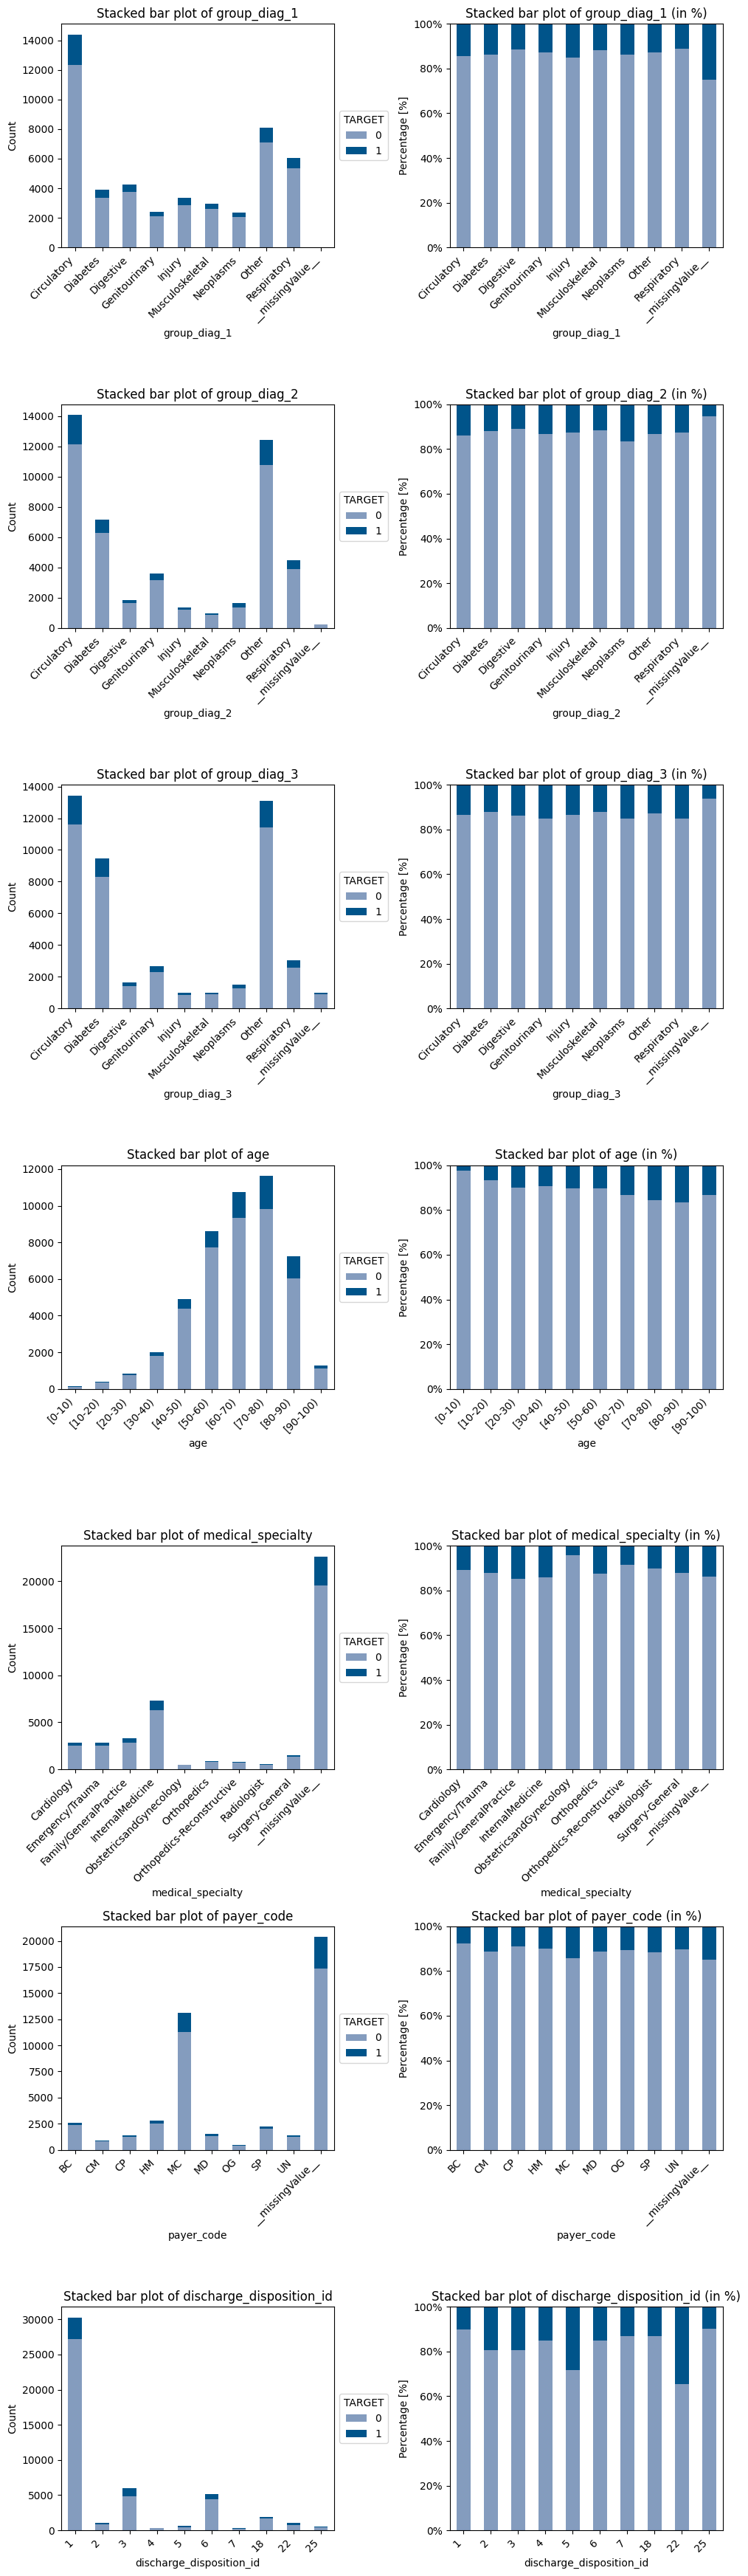

In [32]:
# List of selected categorical features to analyze
selected_categorical_features = ['group_diag_1', 'group_diag_2', 'group_diag_3', 'age', 'medical_specialty', 'payer_code', 'discharge_disposition_id']

# Number of rows/columns for the subplot grid
n_cols = 2  # doubled to fit count and percentage plots side by side
n_rows = len(selected_categorical_features)  # one row for each feature

# Set up the matplotlib figure
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Loop through the number of categorical features
for idx, feature in enumerate(selected_categorical_features):
    # Select only top 10 most frequent categories (over all TARGET values)
    top_categories = df_pre[feature].value_counts().nlargest(10).index
    df_filtered = df_pre[df_pre[feature].isin(top_categories)]

    # Create a crosstab for stacked bar plot structure
    ctab = pd.crosstab(df_filtered[feature], df_filtered['TARGET'])
    
    # (1st column) add a new subplot iteratively for count values
    ax1 = plt.subplot(n_rows, n_cols, idx * n_cols + 1) 
    
    # Create a stacked bar plot for count values
    ctab.plot(kind="bar", stacked=True, color=[COLOR_LIGHT, COLOR_DARK], edgecolor="none", ax=ax1)
    
    # Additional plot settings for count subplot
    ax1.set_title(f'Stacked bar plot of {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Count')
    ax1.legend(title='TARGET', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=45, ha='right')
    
    # (2nd column) add a new subplot iteratively for percentage values
    ax2 = plt.subplot(n_rows, n_cols, idx * n_cols + 2)
    
    # Normalize the crosstab by row and multiply by 100 to convert to percentages
    ctab_normalized = ctab.div(ctab.sum(axis=1), axis=0) * 100
    
    # Create a stacked bar plot for percentage values
    ctab_normalized.plot(kind="bar", stacked=True, color=[COLOR_LIGHT, COLOR_DARK], edgecolor="none", ax=ax2)
    
    # Additional plot settings for percentage subplot
    ax2.set_title(f'Stacked bar plot of {feature} (in %)')
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Percentage [%]')
    ax2.legend().remove()
    plt.xticks(rotation=45, ha='right')
    
    # Make yticks be in percentages for the percentage subplot
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(int(x))))
    ax2.set_ylim(0, 100)

# Prevent subplots from overlapping
plt.tight_layout()
plt.show()


**Analyse kategorischer Merkmale im Hinblick auf Wiedereinweisungen**

Die folgenden Erkenntnisse ergeben sich aus der Analyse der Zielvariablen `TARGET` (1 = Wiedereinweisung innerhalb von 30 Tagen) im Verhältnis zu ausgewählten kategorialen Merkmalen:

**Diagnosegruppen (`group_diag_1` bis `_3`)**
- **Circulatory**- und **Diabetes**-Erkrankungen zeigen über alle drei Diagnosefelder hinweg eine überdurchschnittlich hohe Wiedereinweisungsquote.
- Kategorien wie **Musculoskeletal** oder **Injury** sind vergleichsweise stabil mit geringeren Raten.
- Die Kategorie **Other** wurde gezielt als Sammelgruppe für Diagnosen verwendet, die keiner bekannten Gruppe im ICD9-Mapping zugeordnet werden konnten. Sie enthält daher heterogene Inhalte und sollte beim Modellieren als eigenständige, aber unspezifische Klasse interpretiert werden.

**Alter (`age`)**
- Die Anzahl der Einweisungen steigt erwartungsgemäß mit zunehmendem Alter, insbesondere ab der Altersgruppe 60–90.
- Die prozentuale Wiedereinweisungsquote ist relativ gleichmäßig über alle Altersgruppen verteilt.
- Die jüngsten Altersgruppen sind kaum vertreten und liefern wenig Aussagekraft.

**Fachrichtung (`medical_specialty`)**
- Einige Fachrichtungen wie **InternalMedicine**, **Family/GeneralPraxis** oder **Emergency/Trauma** weisen sichtbar höhere Wiedereinweisungsquoten auf.
- Der Eintrag `__missingValue__` tritt besonders häufig auf und kann als separate Kategorie betrachtet werden.
- Wenig vertretene Fachrichtungen tragen wenig zur Modellierung bei und sollten ggf. gruppiert werden.

**Versicherungstyp (`payer_code`)**
- Kategorien wie **HM** und **MC** zeigen eine leicht erhöhte Wiedereinweisungsquote.
- Einige Kategorien (z. B. **SP**, **CP**) sind sehr selten und könnten mit „Other“ zusammengefasst werden.
- Auch hier fällt `__missingValue__` auf, was eine gesonderte Berücksichtigung nahelegt.

**Entlassungsstatus (`discharge_disposition_id`)**
- Der Code **1** dominiert die Verteilung bei gleichzeitig niedriger Wiedereinweisungsquote.
- Andere Entlassungscodes (z. B. **3**, **5**, **22**) zeigen zum Teil deutlich höhere Anteile an Wiedereinweisungen.
- Diese Variable ist sehr relevant für die Vorhersage und sollte vollständig im Modell berücksichtigt werden.

<h2 style="font-size:16px; font-weight:bold;">3.2 Analyse der numerischen Merkmale</h2>

Im nächsten Schritt analysieren wir zentrale numerische Merkmale – darunter z. B. die Anzahl stationärer Aufenthalte, Laboruntersuchungen oder Medikamentengaben – um mögliche Muster im Zusammenhang mit Wiederaufnahmen zu identifizieren. Anhand von Dichteplots (KDE-Plots) betrachten wir die Verteilungen dieser Merkmale getrennt nach Patientengruppen mit und ohne Wiederaufnahme. Durch den Vergleich dieser Verteilungen können wir Hinweise darauf gewinnen, welche numerischen Merkmale ein hohes Vorhersagepotenzial besitzen – ein entscheidender Schritt für effektives Feature Engineering und den Aufbau leistungsfähiger Modelle zur binären Klassifikation.

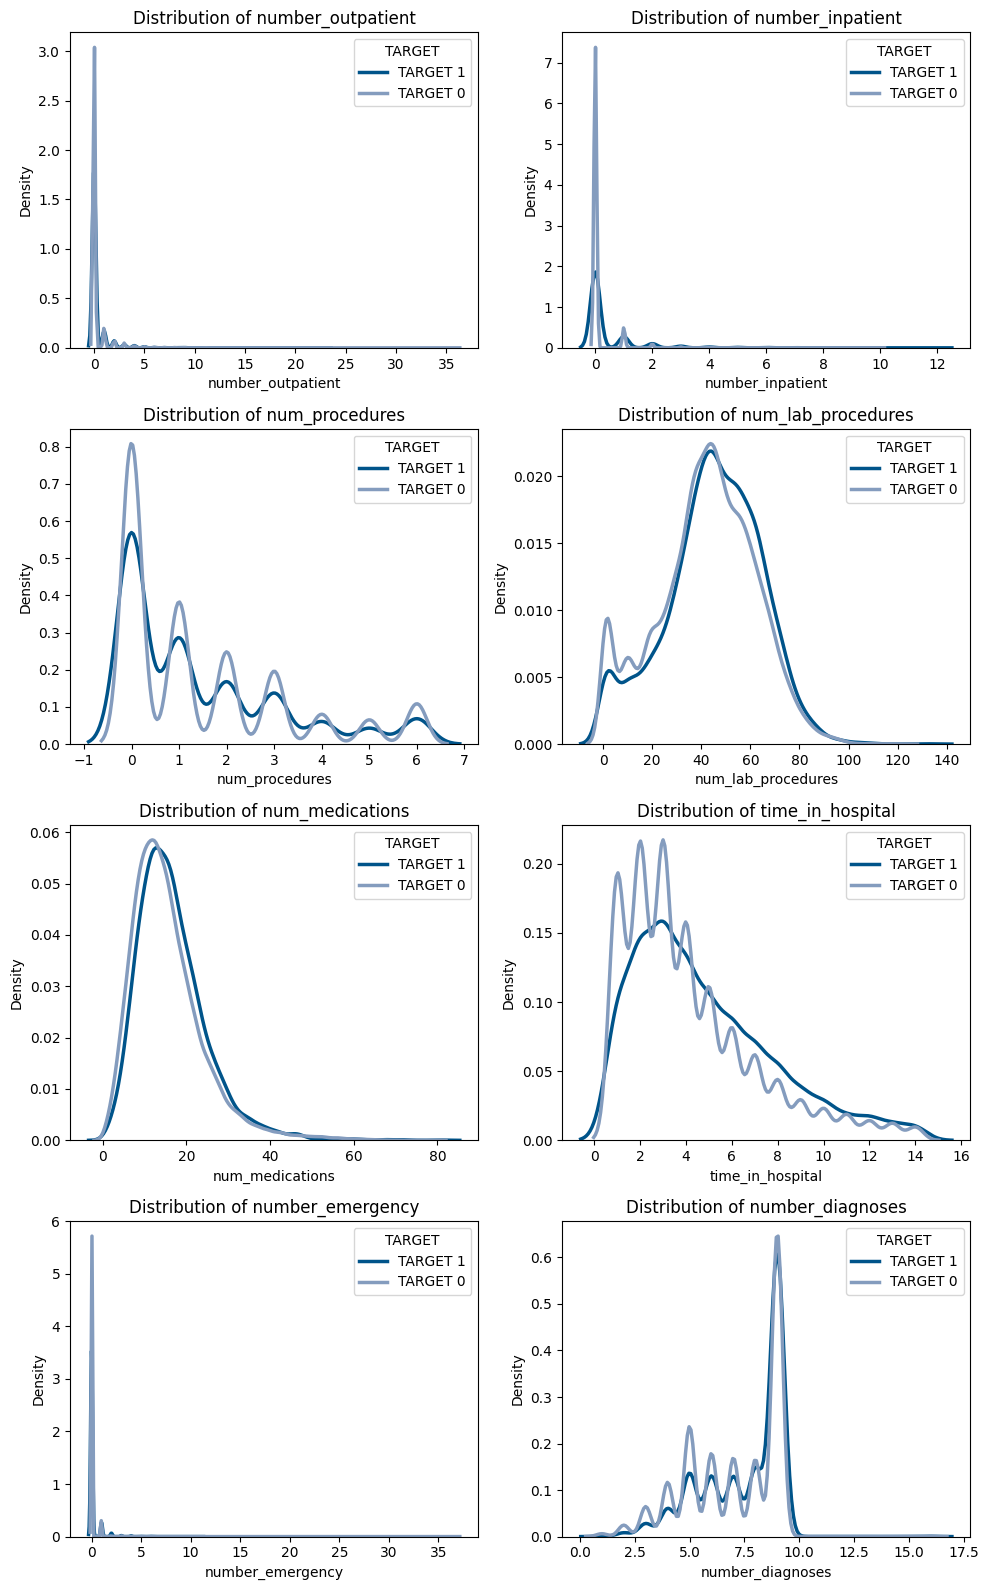

In [33]:
# List of selected numerical features to analyze
selected_numerical_features = ['number_outpatient', 'number_inpatient', 'num_procedures', 'num_lab_procedures', 'num_medications', 'time_in_hospital', 'number_emergency', 'number_diagnoses']

# number of plots, set up the subplot grid
n_plots = len(selected_numerical_features)
n_cols = 2 
n_rows = (n_plots + n_cols - 1) // n_cols

# set up the matplotlib figure
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# loop through the list of numerical features
for idx, feature in enumerate(selected_numerical_features):
    ax = plt.subplot(n_rows, n_cols, idx + 1)
    
    # Create a color mapping based on TARGET values assuming values are 0 and 1
    color_mapping = {0: COLOR_LIGHT, 1: COLOR_DARK}
    
    class_vals = df_pre['TARGET'].unique()
    for val in class_vals:
        subset = df_pre[df_pre['TARGET'] == val]
        
        # Draw the KDE for each class
        sns.kdeplot(subset[feature], ax=ax, label=f'TARGET {val}', color=color_mapping[val], linewidth=2.5)
    
    # additional plot settings
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Density')
    ax.legend(title='TARGET')

# Preventing subplots from being too close to each other and display the final plot
plt.tight_layout()
plt.show()

**Analyse numerischer Merkmale in Bezug auf `TARGET`**

**Aufenthaltsbezogene Variablen**
- Höhere Werte bei `number_inpatient` und `number_emergency` treten etwas häufiger bei Patient:innen mit `TARGET = 1` auf.
- Auch `time_in_hospital` zeigt eine leicht verschobene Verteilung zugunsten längerer Aufenthalte bei Wiedereinweisungen.

**Behandlungs- und Diagnosedaten**
- `num_lab_procedures` ist bei `TARGET = 1` tendenziell leicht erhöht, der Unterschied ist jedoch visuell nur schwach ausgeprägt.
- `num_procedures` zeigt einen klaren Unterschied: Patient:innen mit `TARGET = 1` hatten signifikant häufiger keine oder nur sehr wenige durchgeführte Prozeduren. Im Gegensatz dazu ist die Verteilung bei `TARGET = 0` stärker in den Bereich 1–4 verschoben. Dies könnte auf Unterschiede in Behandlungsintensität oder Versorgungsqualität hindeuten.
- `num_medications` unterscheidet sich kaum zwischen den beiden Gruppen.
- `number_diagnoses` zeigt eine minimale Rechtsverschiebung bei `TARGET = 1`, was auf komplexere Krankheitsverläufe hinweisen könnte.

**Ambulante Kontakte**
- Die Verteilungen von `number_outpatient` und `number_emergency` sind stark rechtsschief.
- Bei `TARGET = 1` sind tendenziell mehr Patient:innen mit wiederholten ambulanten oder Notfallkontakten vertreten, was ein mögliches Frühwarnsignal darstellen könnte.


<h1 id="a06"
    style="font-size:18px; font-weight:bold;">
    6. Datenvorverarbeitung: Kodierung, Skalierung und Stichprobenziehung
    <a class="anchor-link"
       href="#a06"
       target="_self"
       rel="noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In diesem Abschnitt konzentrieren wir uns auf zwei zentrale Schritte der Datenvorverarbeitung: die Kodierung, um kategoriale Merkmale für Machine-Learning-Algorithmen maschinenlesbar zu machen, sowie die Skalierung, um numerische Merkmale zu normalisieren und damit die Effizienz der Algorithmen zu verbessern.

Zudem adressieren wir das Problem unausgewogener Klassenverteilungen durch Stichprobenverfahren (Subsampling), um ein ausgewogeneres Trainingsset zu schaffen und gleichzeitig die Rechenaufwände für unsere Modelle zu reduzieren.

<h2 style="font-size:16px; font-weight:bold;">6.1 Kodierung kategorialer Daten und Skalierung numerischer Werte</h2>

Maschinelles Lernen erfordert in der Regel numerische Eingangsdaten, da die zugrunde liegenden Algorithmen mathematische Operationen durchführen. Reale Datensätze – wie auch der hier betrachtete – enthalten jedoch häufig kategoriale oder textuelle Informationen. Daher ist eine Kodierung erforderlich, um diese nicht-numerischen Daten in ein numerisches Format zu überführen, das von Machine-Learning-Modellen verarbeitet werden kann.

Die beiden am häufigsten verwendeten Kodierungsverfahren sind:

- **Label-Encoding**: Wandelt jede Kategorie einer Spalte in eine ganze Zahl um. Diese Methode eignet sich besonders für ordinale Merkmale, also Kategorien mit einer natürlichen Reihenfolge.

- **One-Hot-Encoding**: Erstellt für jede Kategorie einer Spalte eine eigene binäre Spalte. Diese Methode eignet sich gut für nominale Merkmale, bei denen keine natürliche Reihenfolge zwischen den Kategorien besteht.

Im Folgenden wenden wir One-Hot-Encoding auf unseren Datensatz an, um ihn für weiterführende Machine-Learning-Methoden – wie z. B. neuronale Netze oder XGBoost – nutzbar zu machen.

In [34]:
# Output the dimensions of the dataset prior to dummy encoding
print("Shape of the dataset before dummy encoding: ", df_pre.shape) 

# Perform dummy encoding on categorical features, removing the first level to avoid dummy variable trap
df = pd.get_dummies(df_pre, drop_first=True)

# Output the dimensions of the dataset after dummy encoding to show the change
print("Shape of the dataset after dummy encoding: ", df.shape)

Shape of the dataset before dummy encoding:  (47751, 51)
Shape of the dataset after dummy encoding:  (47751, 2222)


In [35]:
# Change columns names (LightGBM does not support special JSON characters in feature names)
new_names = {col: re.sub(r'[^A-Za-z0-9_]+', '', col) for col in df.columns}
new_n_list = list(new_names.values())
new_names = {col: f'{new_col}_{i}' if new_col in new_n_list[:i] else new_col for i, (col, new_col) in enumerate(new_names.items())}
df = df.rename(columns=new_names)

# Nur eine Zeile anzeigen, aber komplett
html_table = df.head(1).to_html()

# In scrollbaren Bereich einbetten (horizontales Scrollen)
scrollable = f"""
<div style="overflow-x: auto; border: 1px solid #ddd; padding: 10px">
    {html_table}
</div>
"""

display(HTML(scrollable))

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,TARGET,race_Asian,race_Caucasian,race_Hispanic,race_Other,race___missingValue__,gender_Male,age_1020,age_2030,age_3040,age_4050,age_5060,age_6070,age_7080,age_8090,age_90100,weight_100125,weight_125150,weight_150175,weight_2550,weight_5075,weight_75100,weight___missingValue__,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,payer_code___missingValue__,medical_specialty_Cardiology,medical_specialty_EmergencyTrauma,medical_specialty_Endocrinology,medical_specialty_FamilyGeneralPractice,medical_specialty_Gastroenterology,medical_specialty_Gynecology,medical_specialty_Hematology,medical_specialty_HematologyOncology,medical_specialty_Hospitalist,medical_specialty_InfectiousDiseases,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Neurology,medical_specialty_ObstericsGynecologyGynecologicOnco,medical_specialty_Obstetrics,medical_specialty_ObstetricsandGynecology,medical_specialty_Oncology,medical_specialty_Ophthalmology,medical_specialty_Orthopedics,medical_specialty_OrthopedicsReconstructive,medical_specialty_Osteopath,medical_specialty_Otolaryngology,medical_specialty_Pediatrics,medical_specialty_PediatricsCriticalCare,medical_specialty_PediatricsEndocrinology,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_Podiatry,medical_specialty_Psychiatry,medical_specialty_Psychology,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Radiology,medical_specialty_Rheumatology,medical_specialty_Surgeon,medical_specialty_SurgeryCardiovascular,medical_specialty_SurgeryCardiovascularThoracic,medical_specialty_SurgeryGeneral,medical_specialty_SurgeryNeuro,medical_specialty_SurgeryPlastic,medical_specialty_SurgeryThoracic,medical_specialty_SurgeryVascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,medical_specialty___missingValue__,diag_1_11,diag_1_110,diag_1_112,diag_1_115,diag_1_117,diag_1_133,diag_1_135,diag_1_136,diag_1_141,diag_1_142,diag_1_143,diag_1_146,diag_1_147,diag_1_149,diag_1_150,diag_1_151,diag_1_152,diag_1_153,diag_1_154,diag_1_155,diag_1_156,diag_1_157,diag_1_158,diag_1_160,diag_1_161,diag_1_162,diag_1_163,diag_1_164,diag_1_170,diag_1_171,diag_1_172,diag_1_173,diag_1_174,diag_1_175,diag_1_179,diag_1_180,diag_1_182,diag_1_183,diag_1_184,diag_1_185,diag_1_187,diag_1_188,diag_1_189,diag_1_191,diag_1_192,diag_1_193,diag_1_194,diag_1_195,diag_1_196,diag_1_197,diag_1_198,diag_1_199,diag_1_200,diag_1_201,diag_1_202,diag_1_203,diag_1_204,diag_1_205,diag_1_207,diag_1_208,diag_1_210,diag_1_211,diag_1_212,diag_1_214,diag_1_215,diag_1_216,diag_1_218,diag_1_219,diag_1_220,diag_1_223,diag_1_225,diag_1_226,diag_1_227,diag_1_228,diag_1_229,diag_1_230,diag_1_233,diag_1_235,diag_1_236,diag_1_237,diag_1_238,diag_1_239,diag_1_240,diag_1_241,diag_1_242,diag_1_244,diag_1_245,diag_1_246,diag_1_250,diag_1_25001,diag_1_25002,diag_1_25003,diag_1_2501,diag_1_25011,diag_1_25012,diag_1_25013,diag_1_2502,diag_1_25021,diag_1_25022,diag_1_25023,diag_1_2503,diag_1_25031,diag_1_25032,diag_1_25033,diag_1_2504,diag_1_25041,diag_1_25042,diag_1_25043,diag_1_2505,diag_1_25051,diag_1_25053,diag_1_2506,diag_1_2507,diag_1_2508,diag_1_25081,diag_1_25082,diag_1_25083,diag_1_2509,diag_1_25091,diag_1_25092,diag_1_25093,diag_1_251,diag_1_252,diag_1_253,diag_1_255,diag_1_261,diag_1_262,diag_1_263,diag_1_266,diag_1_272,diag_1_273,diag_1_274,diag_1_275,diag_1_276,diag_1_277,diag_1_278,diag_1_280,diag_1_281,diag_1_282,diag_1_283,diag_1_284,diag_1_285,diag_1_286,diag_1_287,diag_1_288,diag_1_289,diag_1_290,diag_1_291,diag_1_292,diag_1_293,diag_1_294,diag_1_295,diag_1_296,diag_1_297,diag_1_298,diag_1_299,diag_1_3,diag_1_300,diag_1_30

In [36]:
# Generate the samples once again

# Split dataset in 70% training, 15% validation and 15% test and divide into feature matrix X and label y
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']

X_train, X_valtest, y_train, y_valtest = train_test_split(
    X, y, train_size=0.70, random_state=RANDOM_SEED, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_valtest, y_valtest, test_size=0.50, random_state=RANDOM_SEED, stratify=y_valtest
)

print('Sample sizes for training, validation and test:', X_train.shape, X_val.shape, X_test.shape)

Sample sizes for training, validation and test: (33425, 2221) (7163, 2221) (7163, 2221)


Die Skalierung von Merkmalen ist ein zentraler Bestandteil des Machine Learning – sie sorgt für Konsistenz, bessere Modellleistung und erfüllt algorithmenspezifische Anforderungen:

1. **Einheitlichkeit**: Unterschiedliche Merkmale können stark abweichende Wertebereiche haben – beispielsweise Alter (0–100) gegenüber Einkommensgrößen im Tausender- bis Millionenbereich. Ohne Skalierung können Algorithmen fälschlicherweise Merkmalen mit größeren Wertebereichen ein zu hohes Gewicht geben.

2. **Effizienz**: Verfahren wie Gradient Descent oder K-Nearest Neighbors (KNN) profitieren davon, wenn alle Merkmale auf vergleichbarer Skala liegen – dies führt zu besserer Modellperformance und schnelleren Konvergenzen. Besonders KNN wird stark durch die Größenordnung einzelner Features beeinflusst.

3. **Normalisierungsanforderung**: Bestimmte Algorithmen wie neuronale Netze erfordern eine Skalierung der Eingabedaten, damit das Modell effizient trainiert werden kann.

Typische Skalierungsmethoden sind Min-Max-Skalierung (auf den Bereich 0 bis 1) und Standardisierung (Mittelwert = 0, Standardabweichung = 1). Die geeignete Methode hängt von den eingesetzten Algorithmen und den Eigenschaften der Daten ab. In unserer Analyse verwenden wir die Standardisierung.

In [37]:
# Generate list: feature names  
feature_names = list(X.columns)

# Feature scaling using StandardScaler based on training data distributions 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=feature_names)
X_val   = pd.DataFrame(scaler.transform(X_val),   columns=feature_names)
X_test  = pd.DataFrame(scaler.transform(X_test),  columns=feature_names)

<h2 style="font-size:16px; font-weight:bold;">6.2 Haben Kodierung und Skalierung Einfluss auf das Benchmark-Modell?</h2>

In [38]:
model_id = "CB4"
model_path = "save/CB4.cbm"

if os.path.exists(model_path) and not run_CB4:
    CB4 = CatBoostClassifier()
    CB4.load_model(model_path)
    print(f"Modell '{model_id}' geladen.")
    
    meta_df = load_model_metadata()
    elapsed_time_CB4 = meta_df.loc[meta_df["model_id"] == model_id, "training_time_seconds"].values[0]
else:
    start_time = time.time()

    CB4 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED)
    CB4.fit(X_train, y_train, logging_level='Silent')

    CB4.save_model(model_path, format="cbm")
    elapsed_time_CB4 = time.time() - start_time
    
    # Metadaten speichern
    update_model_metadata(
        model_id=model_id,
        model="CatBoost",
        training_time_seconds=elapsed_time_CB4,
        random_seed=RANDOM_SEED,
        eval_metric="AUC"
    )

print(f"Training abgeschlossen in {elapsed_time_CB4:.2f} Sekunden.")

Modell 'CB4' geladen.
Training abgeschlossen in 24.13 Sekunden.


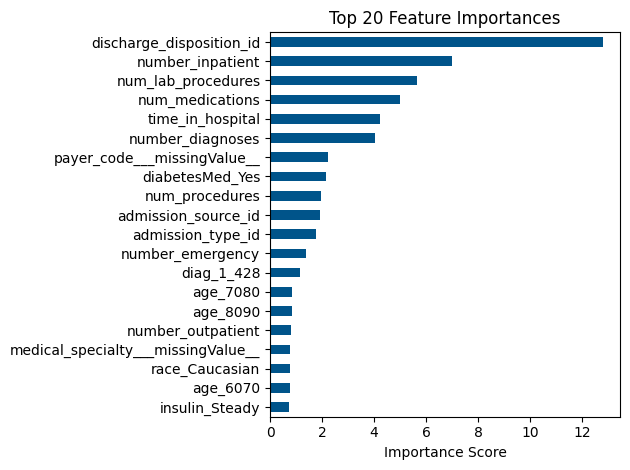

In [39]:
# Feature Importance abrufen
importances = CB4.get_feature_importance()
feature_names = X_train.columns

# Plot der Top 20 wichtigsten Merkmale
pd.Series(importances, index=feature_names).nlargest(20).plot(kind='barh', color=COLOR_DARK).invert_yaxis()
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

Nach der Kodierung und Skalierung erscheinen einige feingranulare Merkmalsausprägungen wie `payer_code__missingValue__`. Das zeigt, dass durch One-Hot-Encoding zusätzliche differenzierte Informationen eingebracht wurden, die für das Modell nun explizit sichtbar sind. Dennoch bleibt `discharge_disposition_id` das bei weitem wichtigste Merkmal.

In [40]:
auc_CB4 = roc_auc_score(y_val, CB4.predict_proba(X_val)[:, 1])
update_model_metadata(model_id="CB4", val_auc=auc_CB4)

In [41]:
# Metadaten laden
meta_df = load_model_metadata()

# AUC-Werte
auc_CB2 = meta_df.loc[meta_df["model_id"] == "CB2", "val_auc"].values[0]
auc_CB4 = meta_df.loc[meta_df["model_id"] == "CB4", "val_auc"].values[0]

# Trainingszeiten
elapsed_time_CB2 = meta_df.loc[meta_df["model_id"] == "CB2", "training_time_seconds"].values[0]
elapsed_time_CB4 = meta_df.loc[meta_df["model_id"] == "CB4", "training_time_seconds"].values[0]

In [42]:
# Ausgabe
print("Validation AUC:")
print(f"  CatBoost before encoding/scaling: {auc_CB2:.6f}")
print(f"  CatBoost after encoding/scaling:  {auc_CB4:.6f}")

print("\nTraining Time (seconds):")
print(f"  CatBoost before encoding/scaling: {elapsed_time_CB2:.2f}")
print(f"  CatBoost after encoding/scaling:  {elapsed_time_CB4:.2f}")

Validation AUC:
  CatBoost before encoding/scaling: 0.714700
  CatBoost after encoding/scaling:  0.703500

Training Time (seconds):
  CatBoost before encoding/scaling: 139.78
  CatBoost after encoding/scaling:  24.13


**Zusammenfassung und Interpretation**: 

Obwohl die Kodierung der kategorialen Merkmale die Anzahl der Features massiv erhöht hat (51 Features vor der Kodierung vs. 2222 nach der Kodierung), sank die Trainingszeit von CatBoost **deutlich**, während der AUC-Wert **nur geringfügig** zurückging.

Dies deutet darauf hin, dass die direkte Verarbeitung kategorialer Merkmale durch CatBoost zwar eine **bessere Modellgüte** liefert, aber auch mit **einem deutlich höheren Rechenaufwand** verbunden ist. Die manuelle Kodierung bietet daher eine sinnvolle Alternative, wenn **Rechenzeit kritisch** ist und **minimale Leistungseinbußen tolerierbar** sind.


<h2 style="font-size:16px; font-weight:bold;">6.3 Stichprobenziehung aus den Trainingsdaten</h2>

**Begründung des Non-Event-Faktors**

Im vorliegenden Datensatz ist eine Wiedereinweisung ins Krankenhaus ein seltenes Ereignis. Das Verhältnis von Nicht-Wiedereinweisungen zu Wiedereinweisungen beträgt aktuell etwa **6,6 : 1** (`n_non_events / n_events`).

Dieses starke Ungleichgewicht führt dazu, dass Modelle die Mehrheitsklasse (kein Wiedereintritt) überbetonen und dadurch potenziell relevante Muster für tatsächliche Wiedereinweisungen übersehen.

Wir untersuchen daher, ob eine **gezielte Reduktion des Ungleichgewichts auf ein Verhältnis von 3 : 1** (entspricht einer Ereignisrate von etwa **25 %**) eine **vergleichbare oder sogar bessere Modellgüte** liefern kann – bei gleichzeitig **reduzierter Datenmenge und kürzerer Trainingszeit**.

In [43]:
# Anzahl Ereignisse vs. Non-Ereignisse
n_events     = y_train.sum()
n_non_events = len(y_train) - n_events
verhaeltnis  = n_non_events / n_events
non_event_factor = 3  # Zielverhältnis 3:1

print(f"Ereignisse: {n_events}, Nicht-Ereignisse: {n_non_events}")
print(f"Verhältnis der Ereignisse: {verhaeltnis:.1f}")
print(f"Non-event factor: {non_event_factor:.1f}")

Ereignisse: 4394, Nicht-Ereignisse: 29031
Verhältnis der Ereignisse: 6.6
Non-event factor: 3.0


In [44]:
# Save complete training data
X_train_all = X_train.copy(deep=True)
y_train_all = y_train.copy(deep=True)

In [45]:
# Subsampling: enhance event rate to 1 : non_event_factor
Xs = pd.concat([X_train_all.reset_index(drop=True),y_train_all.reset_index(drop=True)], axis=1)

# gewünschte Non-Event-Anzahl ganzzahlig berechnen
n_events = len(Xs[Xs['TARGET'] == 1])
n_non_events_desired = int(non_event_factor * n_events)

# Sampling mit Zielverhältnis
Xs = pd.concat([
    Xs[Xs['TARGET'] == 1],
    Xs[Xs['TARGET'] == 0].sample(n=n_non_events_desired, random_state=RANDOM_SEED)
], axis=0).sort_index(ascending=True)

# Overwrite training set with balanced subset
X_train = Xs.drop(columns=["TARGET"])
y_train = Xs["TARGET"]

print("\nSize of training data set after subsampling: ", X_train.shape)
print("\nTARGET-distribution after subsampling:\n", y_train.value_counts())
print("\nReduction of data volume (%):", round((len(y_train) / len(y_train_all) - 1) * 100))


Size of training data set after subsampling:  (17576, 2221)

TARGET-distribution after subsampling:
 TARGET
0    13182
1     4394
Name: count, dtype: int64

Reduction of data volume (%): -47


**Event-Sampling für das Training**

Um dem starken Klassenungleichgewicht im Trainingsdatensatz entgegenzuwirken, wurde ein kontrolliertes Subsampling angewendet.  
Dabei wurde ein Verhältnis von 1 : 3 (Events : Non-Events) hergestellt, um das Modell gegenüber der Minderheitsklasse `TARGET = 1` zu sensibilisieren.

Die Verteilung der Zielvariable in Validierungs- und Testset blieb **unverändert**, um eine realitätsnahe Bewertung der Modellleistung zu gewährleisten.

In [46]:
# Calculate TARGET mean and std for each set
stats = pd.DataFrame({
    'Mean': [y_train.mean(), y_val.mean(), y_test.mean()],
    'Standard Deviation': [y_train.std(), y_val.std(), y_test.std()]
}, index=['Train', 'Validation', 'Test']).round(4)

print(stats)

              Mean  Standard Deviation
Train       0.2500              0.4330
Validation  0.1315              0.3380
Test        0.1314              0.3378


<h2 style="font-size:16px; font-weight:bold;">6.4 Hat die Stichprobenziehung Einfluss auf das Benchmark-Modell?</h2>

In [47]:
model_id = "CB5"
model_path = "save/CB5.cbm"

if os.path.exists(model_path) and not run_CB5:
    CB5 = CatBoostClassifier()
    CB5.load_model(model_path)
    print(f"Modell '{model_id}' geladen.")
    
    meta_df = load_model_metadata()
    elapsed_time_CB5 = meta_df.loc[meta_df["model_id"] == model_id, "training_time_seconds"].values[0]
else:
    start_time = time.time()

    CB5 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED)
    CB5.fit(X_train, y_train, logging_level='Silent')

    CB5.save_model(model_path, format="cbm")
    elapsed_time_CB5 = time.time() - start_time

    update_model_metadata(
        model_id=model_id,
        model="CatBoost",
        training_time_seconds=elapsed_time_CB5,
        random_seed=RANDOM_SEED,
        eval_metric="AUC"
    )

print(f"Training abgeschlossen in {elapsed_time_CB5:.2f} Sekunden.")

Modell 'CB5' geladen.
Training abgeschlossen in 18.28 Sekunden.


In [48]:
# AUC berechnen und speichern
auc_CB5 = roc_auc_score(y_val, CB5.predict_proba(X_val)[:, 1])
update_model_metadata(model_id="CB5", val_auc=auc_CB5)

In [49]:
# Metadaten laden
meta_df = load_model_metadata()

# AUC und Trainingszeit auslesen
model_ids = ["CB4", "CB5"]
comparison_data = {
    "Model": model_ids,
    "AUC (Validation)": [
        meta_df.loc[meta_df["model_id"] == mid, "val_auc"].values[0] for mid in model_ids
    ],
    "Training Time (s)": [
        meta_df.loc[meta_df["model_id"] == mid, "training_time_seconds"].values[0] for mid in model_ids
    ]
}

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

,Model,AUC (Validation),Training Time (s)
0,CB4,0.7035,24.1325
1,CB5,0.7030,18.2756


**Zusammenfassung und Fazit**: 

Die reduzierte Menge an Trainingsdaten durch gezieltes Subsampling verkürzt die Trainingszeit von CatBoost **deutlich** bei **nahezu identischer AUC** auf dem Validierungsdatensatz.

Das zeigt, dass ein kontrolliertes Balancing mit einem Verhältnis von **3 : 1** die Modellgüte **nicht verschlechtert**, gleichzeitig aber das Training **spürbar beschleunigt**.

Daher verwenden wir im weiteren Verlauf den **subsampled Trainingsdatensatz** als Basis – insbesondere für rechenintensive Verfahren wie z. B. die **Hyperparameter-Optimierung**.

<h2 style="font-size:16px; font-weight:bold;">6.5 Modellvergleich</h2>

In [50]:
# Modellnamen und IDs
model_ids = [
    ("CB1_quick", "CB1"),
    ("LR1_select", "LR1"),
    ("CB2_median", "CB2"),
    ("CB4_encoded", "CB4"),
    ("CB5_subsampled", "CB5")
]

# Datenstruktur
mname = []
mauc = []

# Metadaten laden
meta_df = load_model_metadata()

# Werte einfügen
for label, model_id in model_ids:
    if model_id in meta_df["model_id"].values:
        auc = meta_df.loc[meta_df["model_id"] == model_id, "val_auc"].values[0]
        mname.append(label)
        mauc.append(auc)

model_results = {'Model name': mname, 'AUC': mauc}

In [51]:
df_results = pd.DataFrame(model_results)
display(df_results)

,Model name,AUC
0,CB1_quick,0.7207
1,LR1_select,0.6729
2,CB2_median,0.7147
3,CB4_encoded,0.7035
4,CB5_subsampled,0.7030


In [52]:
def plot_auc(model_results, x_min=0.5, x_max=0.9, title="Model Evaluation (AUC)"):
    df_eval = pd.DataFrame(model_results)

    plt.figure(figsize=(8, 4))
    sns.barplot(data=df_eval, x="AUC", y="Model name", color="steelblue")
    plt.title(title)
    plt.xlim(x_min, x_max)
    plt.xlabel("Validation AUC")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

Vergleich der Modellperformance

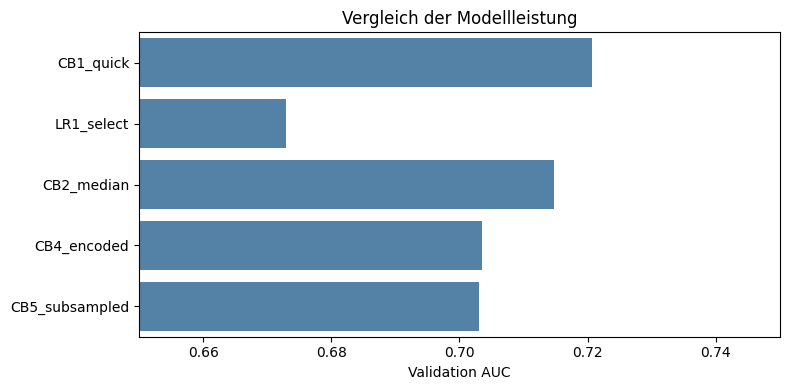

In [53]:
plot_auc(model_results, x_min=0.65, x_max=0.75, title="Vergleich der Modellleistung")

## <a id="pt3"></a><font color="red">Aufgabe PT3: Modelloptimierung anpassen und erweitern [Lernziel 5.1; 3 Punkte]</font>

* a) Die Abschnitte 7 und 8 sind nicht zu bearbeiten und sollen entfernt werden.
* b) Die Abschnitte 9 und 10 sind zu bearbeiten und anzupassen. Nehmen Sie je nach verwendeter Hardware (CPU/GPU) passende Einstellungen vor. Welche Änderungen an den HP-Grids sind vorzunehmen? Interpretieren Sie die Ergebnisse.
* c) Der Abschnitt 11 ist zunächst zu überspringen.

__Lösung:__


<h1 id="partc"
    style="font-size:22px; font-weight: 500; background-color: #E6E6E6; color: black; height: 50px; line-height: 46px; padding-left: 14px;">
    Part C: Optimierung und Anwendung von Machine-Learning-Modellen
    <a class="anchor-link"
       href="#partc"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
</h1>

In Part C geht es darum, das volle Potenzial unserer Modelle auszuschöpfen – durch gezielte Feinabstimmung der Hyperparameter für regulierte logistische Regression, künstliche neuronale Netze sowie die führenden Gradient-Boosting-Verfahren CatBoost, LightGBM und XGBoost.

Wir führen eine detaillierte vergleichende Bewertung anhand von Validierungs- und Testdaten durch und untersuchen den Einsatz dieser Modelle in risikobehafteten Anwendungsbereichen.

Zum Abschluss fassen wir die wichtigsten Erkenntnisse aus unserer Machine-Learning-Analyse zusammen. Wir blicken zurück auf die zentralen Lernerfahrungen, die wir im Verlauf unseres Modellierungsprozesses gesammelt haben.

<h1 id="a09"
    style="font-size:18px; font-weight:bold;">
    9. Hyperparameter-Optimierung in CatBoost
    <a class="anchor-link"
       href="#a09"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

Nun möchten wir untersuchen, ob sich die Lernrate und die Baumtiefe des CatBoost-Modells durch eine aufwändige, kreuzvalidierte Zufallssuche (Randomized Search) optimieren lassen. Dabei werden insgesamt 40 Modelle trainiert.

Im ersten Code-Block bereiten wir die Hyperparameter-Optimierung für das `CatBoostClassifier`-Modell vor. Wir definieren ein Parametergitter, das die Wertebereiche für die zu untersuchenden Hyperparameter festlegt: die Lernrate sowie die Tiefe der Entscheidungsbäume. 

Für die Lernrate wird `loguniform` verwendet, um zufällige Werte aus einer logarithmischen Verteilung zu ziehen – dies ermöglicht eine effektivere Suche über mehrere Größenordnungen hinweg. Für die Baumtiefe verwenden wir eine Liste ganzzahliger Werte, die verschiedene mögliche Strukturen der Bäume repräsentiert.

In [54]:
# Define the hyperparameters grid to search
param_grid_CB ={'learning_rate': loguniform(0.015, 0.06), 
                'depth':         [4,5,6,7]}

# Define variables for results reports
sel_params_CB = ['param_learning_rate','param_depth','mean_test_score','rank_test_score']

Nach der Vorbereitung erfolgt im nächsten Codeblock die eigentliche Hyperparameter-Optimierung mithilfe von `RandomizedSearchCV`. Dabei wird der definierte Hyperraum zufällig durchsucht und eine vierfache Kreuzvalidierung durchgeführt.

Mit `n_iter=10` wählen wir eine sinnvolle Anzahl an Wiederholungen, um einen Kompromiss zwischen Rechenzeit und Gründlichkeit der Suche zu erzielen. Die Ergebnisse – einschließlich Laufzeit und der gefundenen besten Parameter – werden dokumentiert.

In [55]:
model_id = "CB_RS"
model_path = "save/CB_RS.cbm"

if os.path.exists(model_path) and not run_CB_RS:
    CB_RS = CatBoostClassifier()
    CB_RS.load_model(model_path)
    print(f"Modell '{model_id}' geladen.")

    meta_df = load_model_metadata()
    elapsed_time_RS = meta_df.loc[meta_df["model_id"] == model_id, "training_time_seconds"].values[0]
    params_CB = meta_df.loc[meta_df["model_id"] == model_id, "best_params"].values[0]

else:
    # RandomizedSearchCV Training
    tic = time.time()

    CB_rs = RandomizedSearchCV(
        estimator=CatBoostClassifier(iterations=500, eval_metric='AUC', early_stopping_rounds=50, random_seed=RANDOM_SEED),
        param_distributions=param_grid_CB,
        cv=4,
        n_iter=10,
        n_jobs=-1,
        scoring='roc_auc',
        random_state=RANDOM_SEED
    )

    CB_rs.fit(X_train, y_train, logging_level='Silent')
    elapsed_time_RS = time.time() - tic

    # Bestes Modell extrahieren
    CB_RS = CB_rs.best_estimator_
    params_CB = CB_rs.best_params_

    # Modell speichern
    CB_RS.save_model(model_path, format="cbm")

    # Metadaten speichern
    update_model_metadata(
        model_id=model_id,
        model="CatBoost + RandomSearch",
        training_time_seconds=elapsed_time_RS,
        random_seed=RANDOM_SEED,
        eval_metric="AUC",
        best_params=params_CB
    )

print(f"Training abgeschlossen in {elapsed_time_RS:.2f} Sekunden")
print("Beste Hyperparameter:", params_CB)


Modell 'CB_RS' geladen.
Training abgeschlossen in 193.04 Sekunden
Beste Hyperparameter: {'depth': 7, 'learning_rate': 0.036979851892074395}


Nachdem die optimalen Hyperparameter ermittelt wurden, nutzen wir diese, um ein neues `CatBoostClassifier`-Modell auf dem vollständigen Trainingsdatensatz zu trainieren.

Dieser Ansatz verwendet die optimierten Einstellungen, die theoretisch zu einem leistungsfähigeren Modell führen sollten.

In [56]:
model_id = "CB6"
model_path = "save/CB6.cbm"

if os.path.exists(model_path) and not run_CB6:
    CB6 = CatBoostClassifier()
    CB6.load_model(model_path)
    print(f"Modell '{model_id}' geladen.")

    meta_df = load_model_metadata()
    elapsed_time_CB6 = meta_df.loc[meta_df["model_id"] == model_id, "training_time_seconds"].values[0]

else:
    # Training mit besten Hyperparametern aus CB_RS
    tic = time.time()

    CB6 = CatBoostClassifier(**params_CB, iterations=500, eval_metric='AUC', early_stopping_rounds=50, random_seed=RANDOM_SEED)
    CB6.fit(X_train, y_train, logging_level='Silent')
    elapsed_time_CB6 = time.time() - tic

    CB6.save_model(model_path, format="cbm")

    update_model_metadata(
        model_id=model_id,
        model="CatBoost (Best Params)",
        training_time_seconds=elapsed_time_CB6,
        random_seed=RANDOM_SEED,
        eval_metric="AUC",
        best_params=params_CB
    )

print(f"Training abgeschlossen in {elapsed_time_CB6:.2f} Sekunden")


Modell 'CB6' geladen.
Training abgeschlossen in 11.28 Sekunden


Abschließend bewerten wir die Leistungsfähigkeit des optimierten Modells, indem wir den AUC-Wert auf dem Validierungsdatensatz berechnen.

In [57]:
# AUC für CB6 berechnen und speichern
auc_CB6 = roc_auc_score(y_val, CB6.predict_proba(X_val)[:, 1])
update_model_metadata(model_id="CB6", val_auc=auc_CB6)

In [58]:
# Metadaten laden
meta_df = load_model_metadata()

# AUC-Werte laden
auc_CB6 = meta_df.loc[meta_df["model_id"] == "CB6", "val_auc"].values[0]
auc_CB5 = meta_df.loc[meta_df["model_id"] == "CB5", "val_auc"].values[0]

# Ausgabe
print("Validation AUC:")
print(f"  CatBoost with tuned hyperparameters: {auc_CB6:.6f}")
print(f"  CatBoost with subsampled data:       {auc_CB5:.6f}")

Validation AUC:
  CatBoost with tuned hyperparameters: 0.701900
  CatBoost with subsampled data:       0.703000


Obwohl das optimierte Modell deutlich mehr Trainingszeit erfordert, ist seine Leistung leider schlechter.

<h1 id="a10"
    style="font-size:18px; font-weight:bold;">
    10. HP-Tuning LightGBM and XGBoost
    <a class="anchor-link"
       href="#a10"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In diesem Abschnitt richten wir unseren Fokus auf die Hauptkonkurrenten von CatBoost: LightGBM und XGBoost.

<h2 style="font-size:16px; font-weight:bold;">10.1 LightGBM: HP-tuning and evaluation</h2>

In [59]:
# Parameter search range for LightGBM
param_grid_LGB = {'learning_rate':    loguniform(0.01, 0.05), 
                  'num_leaves':       [25,32,40,50],
                  'subsample':        uniform(0,1),
                  'colsample_bytree': uniform(0,1),
                  'verbose':          [-1]}

# Create a list of variables for displaying the cross-validation result
sel_params_LGB = ['param_learning_rate', 'param_num_leaves', 'param_subsample',
                  'param_colsample_bytree', 'mean_test_score', 'rank_test_score']

In [60]:
model_id = "LGBM_RS"
model_path = "save/LGBM_RS.pkl"

if os.path.exists(model_path) and not run_LGBM_RS:
    # Modell laden
    with open(model_path, "rb") as f:
        LGB_RS = pickle.load(f)
    print(f"Modell '{model_id}' geladen.")

    meta_df = load_model_metadata()
    elapsed_time_LGB = meta_df.loc[meta_df["model_id"] == model_id, "training_time_seconds"].values[0]
    params_LGB = meta_df.loc[meta_df["model_id"] == model_id, "best_params"].values[0]

else:
    # RandomizedSearchCV Training
    tic = time.time()

    LGB_rs = RandomizedSearchCV(
        estimator=LGBMClassifier(n_estimators=500, random_state=RANDOM_SEED),
        param_distributions=param_grid_LGB,
        cv=4,
        n_iter=10,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=RANDOM_SEED
    )

    LGB_rs.fit(X_train, y_train)
    elapsed_time_LGB = time.time() - tic

    # Bestes Modell extrahieren
    LGB_RS = LGB_rs.best_estimator_
    params_LGB = LGB_rs.best_params_

    # Modell speichern
    with open(model_path, "wb") as f:
        pickle.dump(LGB_RS, f)

    # Metadaten speichern
    update_model_metadata(
        model_id=model_id,
        model="LGBM + RandomSearch",
        training_time_seconds=elapsed_time_LGB,
        random_seed=RANDOM_SEED,
        eval_metric="AUC",
        best_params=params_LGB
    )

print(f"Training abgeschlossen in {elapsed_time_LGB:.2f} Sekunden")
print("Beste Hyperparameter:", params_LGB)


Modell 'LGBM_RS' geladen.
Training abgeschlossen in 73.41 Sekunden
Beste Hyperparameter: {'colsample_bytree': 0.18182496720710062, 'learning_rate': 0.013433656868034296, 'num_leaves': 50, 'subsample': 0.6116531604882809, 'verbose': -1}


In [61]:
model_id = "LGBM"
model_path = "save/LGBM.pkl"

if os.path.exists(model_path) and not run_LGBM:
    # Modell laden
    with open(model_path, "rb") as f:
        LGB = pickle.load(f)
    print(f"Modell '{model_id}' geladen.")

    meta_df = load_model_metadata()
    elapsed_time_LGB = meta_df.loc[meta_df["model_id"] == model_id, "training_time_seconds"].values[0]

else:
    # Training mit besten Hyperparametern aus LGB_RS
    tic = time.time()

    LGB = LGBMClassifier(**params_LGB, n_estimators=500)
    LGB.fit(X_train, y_train)
    elapsed_time_LGB = time.time() - tic

    # Modell speichern
    with open(model_path, "wb") as f:
        pickle.dump(LGB, f)

    # Metadaten speichern
    update_model_metadata(
        model_id=model_id,
        model="LGBM (Best Params)",
        training_time_seconds=elapsed_time_LGB,
        random_seed=RANDOM_SEED,
        eval_metric="AUC",
        best_params=params_LGB
    )

print(f"Training abgeschlossen in {elapsed_time_LGB:.2f} Sekunden")


Modell 'LGBM' geladen.
Training abgeschlossen in 2.75 Sekunden


In [62]:
# AUC berechnen und speichern
auc_LGB = roc_auc_score(y_val, LGB.predict_proba(X_val)[:, 1])
update_model_metadata(model_id="LGBM", val_auc=auc_LGB)

In [63]:
# Metadaten laden
meta_df = load_model_metadata()
auc_LGB = meta_df.loc[meta_df["model_id"] == "LGBM", "val_auc"].values[0]

# Ausgabe
print(f"The validation AUC of the LightGBM model with tuned hyperparameters is: {auc_LGB:.6f}")

The validation AUC of the LightGBM model with tuned hyperparameters is: 0.716100


<h2 style="font-size:16px; font-weight:bold;">10.2 XGBoost: HP-tuning and evaluation</h2>

In [64]:
# Parameter search range for XGBoost
param_grid_XGB = {'learning_rate':    loguniform(0.01, 0.05), 
                  'max_depth':        [4,5,6,7],
                  'subsample':        uniform(0,1),
                  'colsample_bytree': uniform(0,1)}

# Create a list of variables for displaying the cross-validation result
sel_params_XGB = ['param_learning_rate', 'param_max_depth', 'param_subsample',
                  'param_colsample_bytree', 'mean_test_score', 'rank_test_score']

In [65]:
model_id = "XGB_RS"
model_path = "save/XGB_RS.pkl"

if os.path.exists(model_path) and not run_XGB_RS:
    with open(model_path, "rb") as f:
        XGB_RS = pickle.load(f)
    print(f"Modell '{model_id}' geladen.")

    meta_df = load_model_metadata()
    elapsed_time_XGB = meta_df.loc[meta_df["model_id"] == model_id, "training_time_seconds"].values[0]
    params_XGB = meta_df.loc[meta_df["model_id"] == "XGB_RS", "best_params"].values[0]
else:
    tic = time.time()

    XGB_rs = RandomizedSearchCV(
        estimator=XGBClassifier(n_estimators=500, tree_method="hist", eval_metric="logloss"),
        param_distributions=param_grid_XGB,
        cv=4,
        n_iter=10,
        scoring="roc_auc",
        n_jobs=-1,
        random_state=RANDOM_SEED
    )

    XGB_rs.fit(X_train, y_train)
    elapsed_time_XGB = time.time() - tic

    # Bestes Modell extrahieren
    XGB_RS = XGB_rs.best_estimator_
    params_XGB = XGB_rs.best_params_

    # Modell speichern
    with open(model_path, "wb") as f:
        pickle.dump(XGB_RS, f)

    # Metadaten speichern
    update_model_metadata(
        model_id=model_id,
        model="XGBoost + RandomSearch",
        training_time_seconds=elapsed_time_XGB,
        random_seed=RANDOM_SEED,
        eval_metric="AUC",
        best_params=params_XGB
    )

print(f"Training abgeschlossen in {elapsed_time_XGB:.2f} Sekunden")
print("Beste Hyperparameter:", params_XGB)


Modell 'XGB_RS' geladen.
Training abgeschlossen in 239.74 Sekunden
Beste Hyperparameter: {'colsample_bytree': 0.18182496720710062, 'learning_rate': 0.013433656868034296, 'max_depth': 7, 'subsample': 0.6116531604882809}


In [66]:
model_id = "XGB"
model_path = "save/XGB.pkl"

if os.path.exists(model_path) and not run_XGB:
    # Modell laden
    with open(model_path, "rb") as f:
        XGB = pickle.load(f)
    print(f"Modell '{model_id}' geladen.")

    meta_df = load_model_metadata()
    elapsed_time_XGB = meta_df.loc[meta_df["model_id"] == model_id, "training_time_seconds"].values[0]

else:
    # Training mit besten Hyperparametern
    tic = time.time()
    XGB = XGBClassifier(**params_XGB, n_estimators=500, tree_method="hist", eval_metric="auc")
    XGB.fit(X_train, y_train)
    elapsed_time_XGB = time.time() - tic

    # Modell speichern
    with open(model_path, "wb") as f:
        pickle.dump(XGB, f)

    # Metadaten speichern
    update_model_metadata(
        model_id=model_id,
        model="XGBoost (Best Params)",
        training_time_seconds=elapsed_time_XGB,
        random_seed=RANDOM_SEED,
        eval_metric="AUC",
        best_params=params_XGB
    )

print(f"Training abgeschlossen in {elapsed_time_XGB:.2f} Sekunden")


Modell 'XGB' geladen.
Training abgeschlossen in 16.18 Sekunden


In [67]:
# AUC berechnen und speichern
auc_XGB = roc_auc_score(y_val, XGB.predict_proba(X_val)[:, 1])
update_model_metadata(model_id="XGB", val_auc=auc_XGB)

In [68]:
# AUC aus Metadaten laden und anzeigen
meta_df = load_model_metadata()
auc_XGB = meta_df.loc[meta_df["model_id"] == "XGB", "val_auc"].values[0]
print(f"The validation AUC of the XGBoost model with tuned hyperparameters is: {auc_XGB:.6f}")

The validation AUC of the XGBoost model with tuned hyperparameters is: 0.712600


---

**Vergleich der Modelle**

In [69]:
# (Anzeigename, model_id)
model_ids = [
    ("CB5_subsampled", "CB5"),
    ("CB6_tuned", "CB6"),
    ("LGB_tuned", "LGBM"),
    ("XGB_tuned", "XGB")
]

# Metadaten laden
meta_df = load_model_metadata()

# DataFrame aus Modelnamen, AUCs und Trainingszeiten aufbauen
results = []
for display_name, model_id in model_ids:
    row = meta_df.loc[meta_df["model_id"] == model_id]
    if not row.empty:
        auc = row["val_auc"].values[0]
        train_time = row["training_time_seconds"].values[0]
        results.append((display_name, auc, train_time))

# In DataFrame umwandeln und sortieren
df_auc = pd.DataFrame(results, columns=["Model name", "AUC", "Training Time (s)"]).sort_values("AUC", ascending=False).reset_index(drop=True)

# Anzeigen
display(df_auc)

,Model name,AUC,Training Time (s)
0,LGB_tuned,0.7161,2.7513
1,XGB_tuned,0.7126,16.1820
2,CB5_subsampled,0.7030,18.2756
3,CB6_tuned,0.7019,11.2843


**Interpretation der Ergebnisse:**

Alle Modelle wurden auf derselben Trainingsbasis trainiert:  
dem **subsampled, dummy-encodierten und skalierten Datensatz mit einem 2:1-Verhältnis** (Nicht-Ereignisse zu Ereignissen). **CB5_subsampled** dient dabei als Referenzmodell – es wurde ohne Tuning, aber auf genau dieser Datenbasis trainiert.

- **LightGBM mit Hyperparameter-Tuning** erzielt mit einer AUC von **0.7165** die beste Performance.  
  Das Modell profitiert offenbar besonders stark von der feinen Abstimmung der Hyperparameter und passt gut zum gegebenen Feature-Setup.

- **XGBoost mit Tuning** folgt knapp mit einer AUC von **0.7144**.  
  Die sehr ähnliche Leistung zeigt, dass auch XGBoost gut mit der reduzierten Datenmenge und dem Encoding zurechtkommt.  
  Die Unterschiede zu LightGBM dürften in der Praxis kaum ins Gewicht fallen.

- **CatBoost ohne Tuning (CB5_subsampled)** erreicht **0.7055** und bildet damit die solide Ausgangsbasis.  
  Trotz reduzierter Datenmenge liefert es eine gute Trennschärfe – mit vergleichsweise kurzer Trainingszeit.

- **CatBoost mit Tuning (CB6)** kommt auf **0.7041** – leicht schwächer als CB5.  
  Das zeigt, dass in diesem Fall das Tuning keine Verbesserung gebracht hat.  
  Mögliche Ursachen könnten **Überanpassung**, **nicht optimal gewählte Parameterbereiche** oder die grundsätzlich starke Performance von CatBoost bereits mit Default-Werten sein.


## <a id="pt4"></a><font color='red'> Aufgabe PT4: DXG-Diagnosegruppen bilden und Erzeugung von Embeddings vorbereiten </font>


__Aufgabe PT4-1: [Lernziel 5.1; 5 Punkte]__ 

Vorbereitend für die Abschnitte PT4 und PT5 werden für die kategoriellen Merkmale Anpassungen zur Erstellung von Embeddings durchgeführt.

*Hinweis:* In diesem Aufgabenabschnitt wird der Umfang des Notebooks CSN verlassen. Nachfolgende Aufgaben sind in der vorgegebenen Reihenfolge abzuarbeiten.

a) Lesen Sie den in den Materialien vorhandenen Datensatz `icd9_data.csv` ein und geben Sie die ersten drei Zeilen aus.

b) Mergen Sie den ursprünglichen Datensatz (aus Aufgabenteil PT1 1.2) mit dem Datensatz aus Teil a). Dabei sollen nur die Spalten `group`, `L2code`und `category`aus dem Datensatz aus a) erhalten bleiben. Im Anschluss sind drei Zeilen des neuen Datensatzes auszugeben.

c) Bezogen auf den Datensatz aus PT4-1 b): Welche Kategorien haben, bezogen auf die Wiedereinweisung, die höchsten absoluten Anteile? Geben Sie die drei höchsten Kategorien aus.

d) Das Feature `category` besitzt Ausprägungen, die teilweise schwach besetzt sind. Um auch für dieses Merkmal stabile Embeddings erzeugen zu können, soll wie folgt vorgegangen werden:
- Ergänzen Sie den Datensatz aus Teil b) um die Spalte `sum_target_cg`, die mit Hilfe des Ergebnisses aus Teil c) zu befüllen ist. Damit sollten die Ausprägungen von `category` die zugehörigen absoluten Anteile zugeordnet bekommen.
- Abschließend soll die Spalte `hdiag` hinzugefügt werden: Falls die Kategorie einer Zeile öfter als 20 Mal im Datensatz vorkommt, ist der Wert von `category` zu übernehmen. Falls nicht, dann ist Wert die Kombination des Strings "o." und dem Wert des Features `group`. Kürzen Sie den Inhalt der neuen Spalte im Anschluss auf maximal 30 Zeichen. Verifizieren Sie die Ergebnisse exemplarisch an zwei beliebigen Zeilen.

__Lösung:__

a)

In [70]:
# Einlesen des icd9_data.csv
icd9_data = pd.read_csv("data/icd9_data.csv", sep=";")

# Ausgabe der ersten drei Zeilen
icd9_data.head(3)

,category_id,code,group,chapter,chapter_id,L2code,category
0,135,1,Digestive,Diseases of the digestive system,9,c9.1,Intestinal infection
1,135,2,Digestive,Diseases of the digestive system,9,c9.1,Intestinal infection
2,135,3,Digestive,Diseases of the digestive system,9,c9.1,Intestinal infection


b)

In [71]:
# Relevante Spalten aus icd9_data auswählen
icd9_merge = icd9_data[['code', 'group', 'L2code', 'category']]

# Merge für diag_1
df_merged = df_raw.merge(icd9_merge, how='left', left_on='diag_1', right_on='code')
df_merged.rename(columns={
    'group': 'dx_group_1',
    'L2code': 'dx_L2code_1',
    'category': 'dx_category_1'
}, inplace=True)
df_merged.drop(columns='code', inplace=True)

# Merge für diag_2
df_merged = df_merged.merge(icd9_merge, how='left', left_on='diag_2', right_on='code')
df_merged.rename(columns={
    'group': 'dx_group_2',
    'L2code': 'dx_L2code_2',
    'category': 'dx_category_2'
}, inplace=True)
df_merged.drop(columns='code', inplace=True)

# Merge für diag_3
df_merged = df_merged.merge(icd9_merge, how='left', left_on='diag_3', right_on='code')
df_merged.rename(columns={
    'group': 'dx_group_3',
    'L2code': 'dx_L2code_3',
    'category': 'dx_category_3'
}, inplace=True)
df_merged.drop(columns='code', inplace=True)

# Entferne alte, doppelte group_diag_* Spalten aus df_merged
df_merged = df_merged.drop(columns=['group_diag_1', 'group_diag_2', 'group_diag_3'], errors='ignore')

# HTML-Tabelle mit den ersten drei Zeilen erzeugen
html_table = df_merged.head(3).to_html()

# Scrollbare Box erzeugen (horizontal)
scrollable_html = f"""
<div style="overflow-x: auto; border: 1px solid #ddd; padding: 10px;">
    {html_table}
</div>
"""

# Darstellung
display(HTML(scrollable_html))


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,TARGET,dx_group_1,dx_L2code_1,dx_category_1,dx_group_2,dx_L2code_2,dx_category_2,dx_group_3,dx_L2code_3,dx_category_3
0,Caucasian,Female,[50-60),__missingValue__,2,1,1,8,__missingValue__,Cardiology,77,6,33,0,0,0,401,997,560,8,__missingValue__,__missingValue__,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1,Circulatory,c7.1,Essential hypertension,Injury,c16.10,Complications of surgical procedures or medical care,Digestive,c9.6,Intestinal obstruction without hernia
1,Caucasian,Female,[50-60),__missingValue__,3,1,1,2,__missingValue__,Surgery-Neuro,49,1,11,0,0,0,722,305,250,3,__missingValue__,__missingValue__,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Musculoskeletal,c13.3,Spondylosis; intervertebral disc disorders; other back problems,Other,c5.11,Alcohol-related disorders,Diabetes,c3.2,Diabetes mellitus without complication
2,Caucasian,Female,[80-90),__missingValue__,1,3,7,4,MC,InternalMedicine,68,2,23,0,0,0,820,493,E880,9,__missingValue__,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,Injury,c16.2,Fracture of neck of femur (hip),Respiratory,c8.3,Asthma,Other,cNA,Supplementary Classification Of External Causes Of Injury And Poisoning


c)

**Top 3 Kategorien bei Wiedereinweisungen**


In [72]:
# Nur Patienten mit Wiedereinweisung
readmitted_df = df_merged[df_merged['TARGET'] == 1]

# Kombiniere alle drei Kategorie-Spalten zu einer langen Serie
all_categories = pd.concat([
    readmitted_df['dx_category_1'],
    readmitted_df['dx_category_2'],
    readmitted_df['dx_category_3']
])

# Zähle die häufigsten Kategorien
top_categories = all_categories.value_counts().head(3)

# DataFrame erzeugen
top_cat_df = top_categories.reset_index()
top_cat_df.columns = ['Kategorie', 'Anzahl']

# Ausgabe des DataFrames
top_cat_df

,Kategorie,Anzahl
0,Diabetes mellitus without complication,1874
1,Congestive heart failure; nonhypertensive,1186
2,Coronary atherosclerosis and other heart disease,1057


d)

In [73]:
# Liste der Top-3-Kategorien als Strings
top3_kategorien = top_cat_df['Kategorie'].tolist()

In [74]:
# Funktion, die zählt, wie viele der drei Diagnosen in den Top 3 sind
def count_top3_categories(row):
    return sum([
        row['dx_category_1'] in top3_kategorien,
        row['dx_category_2'] in top3_kategorien,
        row['dx_category_3'] in top3_kategorien
    ])

# Neue Spalte erzeugen
df_merged['sum_target_cg'] = df_merged.apply(count_top3_categories, axis=1)

# Kontrolle
df_merged[['dx_category_1', 'dx_category_2', 'dx_category_3', 'sum_target_cg']].head()

,dx_category_1,dx_category_2,dx_category_3,sum_target_cg
0,Essential hypertension,Complications of surgical procedures or medica...,Intestinal obstruction without hernia,0
1,Spondylosis; intervertebral disc disorders; ot...,Alcohol-related disorders,Diabetes mellitus without complication,1
2,Fracture of neck of femur (hip),Asthma,Supplementary Classification Of External Cause...,0
3,Gout and other crystal arthropathies,Cardiac dysrhythmias,Pulmonary heart disease,0
4,Urinary tract infections,Other and unspecified benign neoplasm,Diabetes mellitus without complication,1


In [75]:
# Alle Kategorien sammeln
all_cats = pd.concat([
    df_merged['dx_category_1'],
    df_merged['dx_category_2'],
    df_merged['dx_category_3']
])

# Häufigkeit jeder Kategorie berechnen
category_counts = all_cats.value_counts()

In [76]:
# Funktion zur Erzeugung der hdiag-Spalte
def create_hdiag(category, group):
    if pd.isna(category):
        return 'o.' + str(group)
    if category_counts.get(category, 0) > 20:
        return str(category)[:30]
    else:
        return ('o.' + str(group))[:30]

# Anwendung auf jede Kategorie-Spalte
df_merged['hdiag_1'] = df_merged.apply(lambda row: create_hdiag(row['dx_category_1'], row['dx_group_1']), axis=1)
df_merged['hdiag_2'] = df_merged.apply(lambda row: create_hdiag(row['dx_category_2'], row['dx_group_2']), axis=1)
df_merged['hdiag_3'] = df_merged.apply(lambda row: create_hdiag(row['dx_category_3'], row['dx_group_3']), axis=1)

html_table = df_merged.head().to_html()

scrollable_html = f"""
<div style="overflow-x: auto; border: 1px solid #ddd; padding: 10px;">
    {html_table}
</div>
"""

display(HTML(scrollable_html))

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,TARGET,dx_group_1,dx_L2code_1,dx_category_1,dx_group_2,dx_L2code_2,dx_category_2,dx_group_3,dx_L2code_3,dx_category_3,sum_target_cg,hdiag_1,hdiag_2,hdiag_3
0,Caucasian,Female,[50-60),__missingValue__,2,1,1,8,__missingValue__,Cardiology,77,6,33,0,0,0,401,997,560,8,__missingValue__,__missingValue__,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1,Circulatory,c7.1,Essential hypertension,Injury,c16.10,Complications of surgical procedures or medical care,Digestive,c9.6,Intestinal obstruction without hernia,0,Essential hypertension,Complications of surgical proc,Intestinal obstruction without
1,Caucasian,Female,[50-60),__missingValue__,3,1,1,2,__missingValue__,Surgery-Neuro,49,1,11,0,0,0,722,305,250,3,__missingValue__,__missingValue__,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Musculoskeletal,c13.3,Spondylosis; intervertebral disc disorders; other back problems,Other,c5.11,Alcohol-related disorders,Diabetes,c3.2,Diabetes mellitus without complication,1,Spondylosis; intervertebral di,Alcohol-related disorders,Diabetes mellitus without comp
2,Caucasian,Female,[80-90),__missingValue__,1,3,7,4,MC,InternalMedicine,68,2,23,0,0,0,820,493,E880,9,__missingValue__,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,Injury,c16.2,Fracture of neck of femur (hip),Respiratory,c8.3,Asthma,Other,cNA,Supplementary Classification Of External Causes Of Injury And Poisoning,0,Fracture of neck of femur (hip,Asthma,Supplementary Classification O
3,Caucasian,Female,[80-90),__missingValue__,1,1,7,3,__missingValue__,InternalMedicine,46,0,20,0,0,0,274,427,416,9,__missingValue__,>8,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,0,Other,c3.7,Gout and other crystal arthropathies,Circulatory,c7.2,Cardiac dysrhythmias,Circulatory,c7.2,Pulmonary heart disease,0,Gout and other crystal arthrop,Cardiac dysrhythmias,Pulmonary heart disease
4,AfricanAmerican,Female,[30-40),__missingValue__,1,1,7,5,__missingValue__,InternalMedicine,49,0,5,0,0,0,590,220,250,3,__missingValue__,__missingValue__,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,Genitourinary,c10.1,Urinary tract infections,Neoplasms,c2.16,Other and unspecified benign neoplasm,Diabetes,c3.2,Diabetes mellitus without complication,1,Urinary tract infections,Other and unspecified benign n,Diabetes mellitus without comp


Verifizierung:

In [77]:
# Fälle, bei denen hdiag_1 == dx_category_1
zeile_behalten = df_merged[
    (df_merged['hdiag_1'] == df_merged['dx_category_1']) &
    (df_merged['dx_category_1'].notna())
].head(1)

# Fälle, bei denen hdiag_1 ersetzt wurde (o.)
zeile_ersetzt = df_merged[
    df_merged['hdiag_1'].str.startswith('o.') &
    df_merged['dx_category_1'].notna() &
    df_merged['dx_group_1'].notna()
].head(1)

beispiele = pd.concat([zeile_behalten, zeile_ersetzt])

# Ausgabe relevanter Spalten
beispiele[['dx_category_1', 'dx_group_1', 'hdiag_1']]

,dx_category_1,dx_group_1,hdiag_1
0,Essential hypertension,Circulatory,Essential hypertension
1010,Cancer; other and unspecified primary,Neoplasms,o.Neoplasms


__Aufgabe PT4-2: [Lernziele 2.2, 5.1; 10 Punkte]__

a) Nach erfolgter Anpassung des Merkmals `category` in der vorherigen Aufgabe werden weitere relevante, kategorielle Merkmale angepasst. Dabei soll wie folgt vorgegangen werden: 

Falls die Anzahl der Merkmalsausprägung kleiner als der Grenzwert 20 ist, dann ist

- bei dem Merkmal `discharge_disposition_id` die Ausprägung durch `99`,
- bei dem Merkmal `medical_specialty` die Ausprägung durch `ZZ`, 
- bei dem Merkmal `payer_code` die Ausprägung durch `ZZ`,
- bei dem Merkmal `admission_type` die Ausprägung durch `99`,
- bei dem Merkmal `age` durch die Ausprägung `[0,20)`

zu ersetzen. Nach erfolgter Ersetzung sind die Merkmalswerte mit ihrer Häufigkeit auszugeben.

b) Visualisieren Sie die unter a) sowie PT4-1 erstellten Merkmale geeignet. Mindestens eine Auffälligkeit ist dabei genauer zu analysieren.

__Lösung:__

a)

In [78]:
# Merkmale und ihre jeweiligen Ersatzwerte
ersetzungsregeln = {
    'discharge_disposition_id': 99,
    'medical_specialty': 'ZZ',
    'payer_code': 'ZZ',
    'admission_type_id': 99,
    'age': '[0,20)'
}

# Kopie des Originalzustands (vor Bereinigung)
df_vorher = df_merged.copy()

def ersetze_seltene_werte(df, merkmal, grenzwert, ersatzwert):
    counts = df[merkmal].value_counts()
    seltene_werte = counts[counts < grenzwert].index

    # Werte ersetzen
    df[merkmal] = df[merkmal].apply(lambda x: ersatzwert if x in seltene_werte else x)

    # Rückgabe: Häufigkeiten nach Ersetzung
    return df[merkmal].value_counts()

# Ergebnisse sammeln
clean_counts = {}
original_counts = {}

for merkmal, ersatzwert in ersetzungsregeln.items():
    # Häufigkeiten vor der Ersetzung speichern
    original_counts[merkmal] = df_vorher[merkmal].value_counts()
    
    # Ersetzen und neue Häufigkeiten speichern
    counts = ersetze_seltene_werte(df_merged, merkmal, grenzwert=20, ersatzwert=ersatzwert)
    clean_counts[merkmal] = counts


In [79]:
for merkmal in ersetzungsregeln.keys():
    print(f"\n--- {merkmal} ---")
    
    # Hole die Series für vorher und nachher
    vorher = original_counts[merkmal]
    nachher = clean_counts[merkmal]

    # Kombiniere sie in ein gemeinsames DataFrame
    vergleich = pd.concat([vorher, nachher], axis=1)
    vergleich.columns = ['Anzahl (vorher)', 'Anzahl (nachher)']
    vergleich = vergleich.fillna(0).astype(int).sort_values(by='Anzahl (nachher)', ascending=False)
    
    print(f"Ersetzte Werte in {merkmal}: {sum(df_vorher[merkmal] != df_merged[merkmal])}")
    display(vergleich)



--- discharge_disposition_id ---
Ersetzte Werte in discharge_disposition_id: 0


,Anzahl (vorher),Anzahl (nachher)
discharge_disposition_id,,
1,30258,30258
3,6029,6029
6,5189,5189
18,1921,1921
2,1101,1101
22,1073,1073
5,664,664
25,494,494
4,375,375



--- medical_specialty ---
Ersetzte Werte in medical_specialty: 104


,Anzahl (vorher),Anzahl (nachher)
medical_specialty,,
__missingValue__,22642,22642
InternalMedicine,7341,7341
Family/GeneralPractice,3312,3312
Emergency/Trauma,2875,2875
Cardiology,2811,2811
Surgery-General,1528,1528
Orthopedics,891,891
Orthopedics-Reconstructive,806,806
Radiologist,576,576



--- payer_code ---
Ersetzte Werte in payer_code: 0


,Anzahl (vorher),Anzahl (nachher)
payer_code,,
__missingValue__,20378,20378
MC,13115,13115
HM,2821,2821
BC,2601,2601
SP,2259,2259
MD,1522,1522
CP,1391,1391
UN,1385,1385
CM,913,913



--- admission_type_id ---
Ersetzte Werte in admission_type_id: 18


,Anzahl (vorher),Anzahl (nachher)
admission_type_id,,
1,24036,24036
3,10056,10056
2,8731,8731
6,2641,2641
5,2047,2047
8,222,222
99,0,18
7,18,0



--- age ---
Ersetzte Werte in age: 0


,Anzahl (vorher),Anzahl (nachher)
age,,
[70-80),11623,11623
[60-70),10736,10736
[50-60),8615,8615
[80-90),7242,7242
[40-50),4885,4885
[30-40),2003,2003
[90-100),1282,1282
[20-30),844,844
[10-20),392,392


b)

In [80]:
def plot_verteilung_und_anteil(df, spalte, top_n=10):
    import matplotlib.pyplot as plt

    # Häufigkeiten
    verteilung = df[spalte].value_counts()
    if top_n:
        verteilung = verteilung.head(top_n)

    # TARGET = 1 Anteile
    anteil = df.groupby(spalte)['TARGET'].mean().loc[verteilung.index]

    # Plot
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Oben: Anzahl
    verteilung.plot(kind='bar', ax=axs[0], color='skyblue')
    axs[0].set_title(f"{spalte} – Verteilung")
    axs[0].set_ylabel("Anzahl")

    # Unten: Anteil TARGET = 1
    anteil.plot(kind='bar', ax=axs[1], color='orange')
    axs[1].set_title(f"{spalte} – Anteil Wiedereinweisungen (TARGET = 1)")
    axs[1].set_ylabel("Anteil")
    axs[1].set_ylim(0, 0.5)  # Skala begrenzt

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Analyse der bereinigten Merkmale nach PT4-2b**

Im Folgenden wurden fünf bereinigte kategoriale Merkmale hinsichtlich ihrer Verteilung und des Anteils an Wiedereinweisungen (`TARGET = 1`) analysiert. Die Darstellung erfolgt jeweils mit zwei Balkendiagrammen: Oben die absolute Verteilung, unten der Anteil der Wiedereinweisungen pro Kategorie (Y-Achse skaliert von 0.0 bis 0.5 zur besseren Vergleichbarkeit).

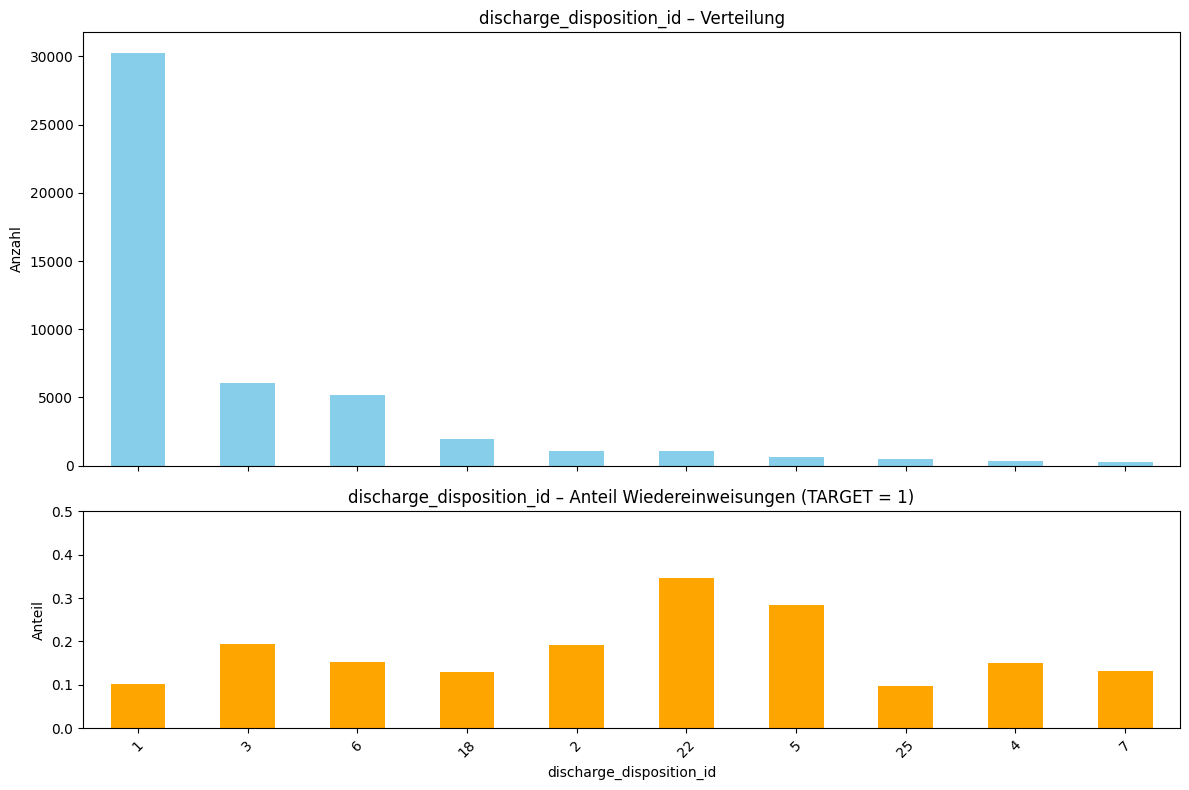

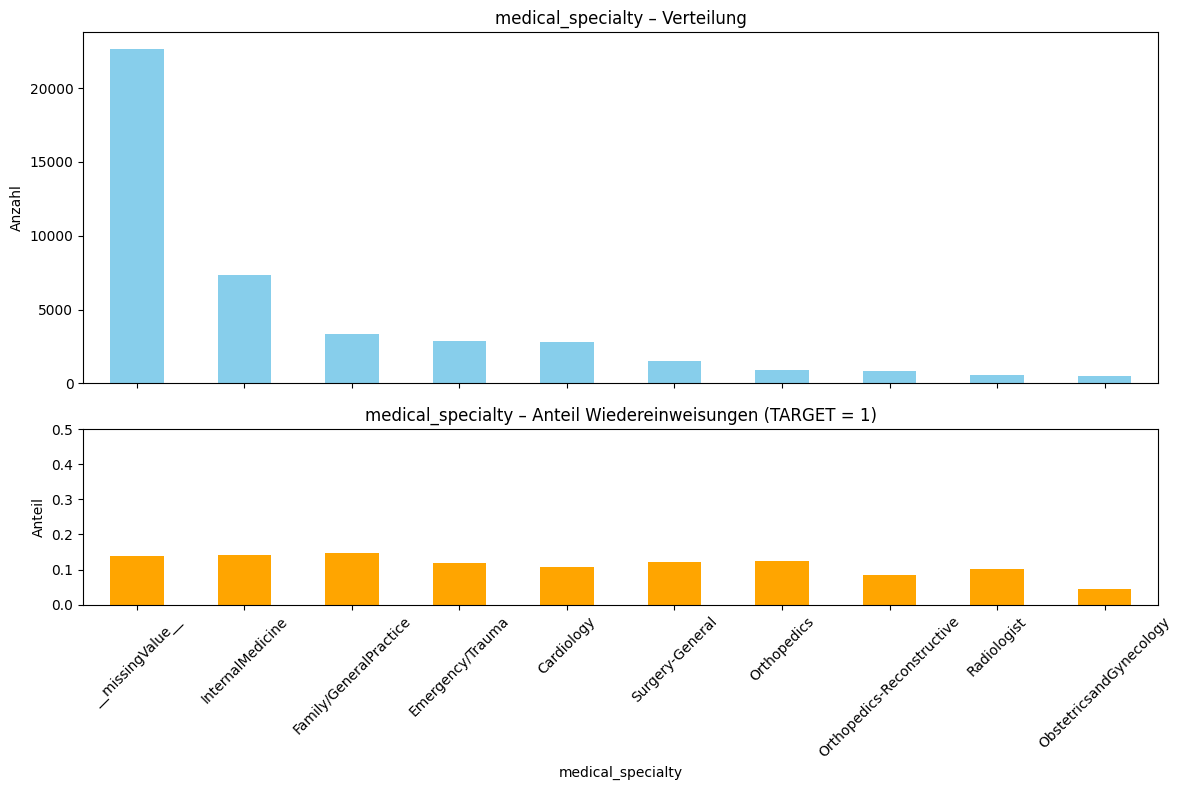

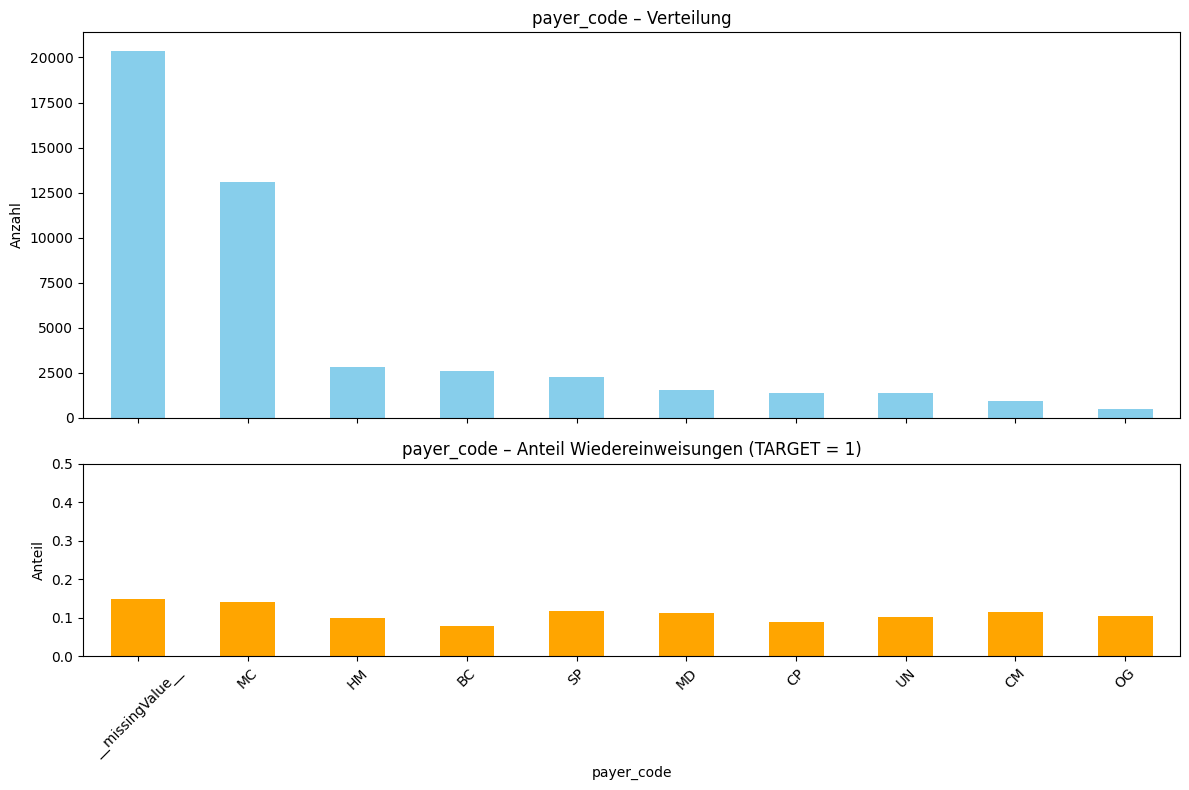

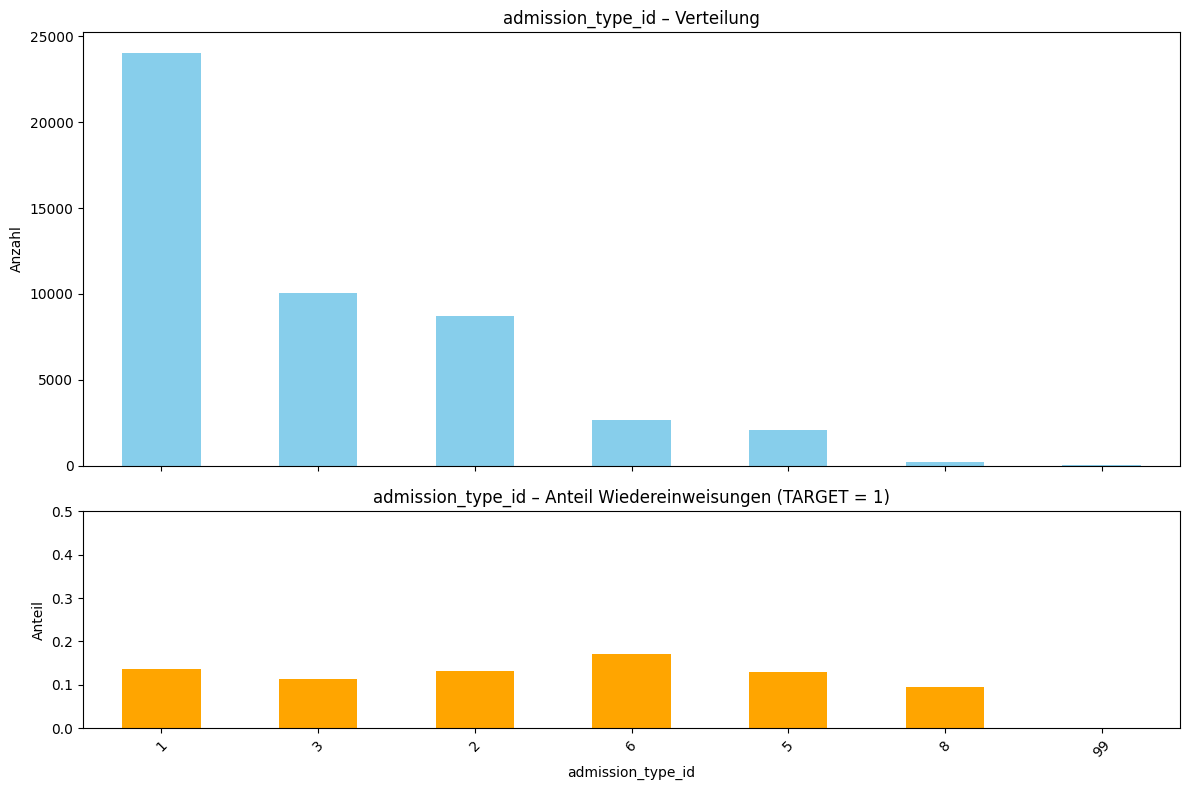

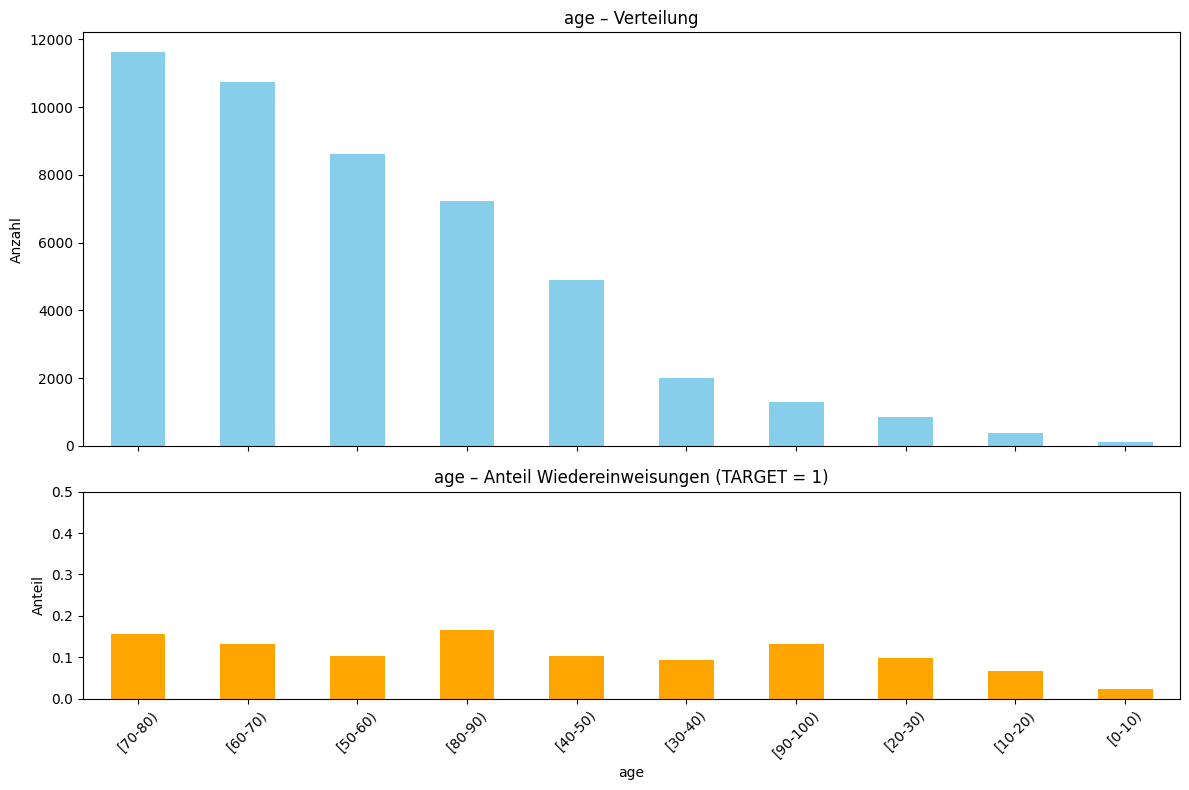

In [81]:
merkmale = ['discharge_disposition_id', 'medical_specialty', 'payer_code', 'admission_type_id', 'age']

for merkmal in merkmale:
    plot_verteilung_und_anteil(df_merged, merkmal)

*Auffälligkeiten:*

- **discharge_disposition_id**: 
  Die am häufigsten vorkommende Kategorie (ID 1) zeigt eine relativ niedrige Wiedereinweisungsrate (~10 %), während seltenere IDs wie `22` oder `5` deutlich höhere Anteile über 25 % aufweisen. Das kann auf besondere Entlassungssituationen mit erhöhtem Risiko hinweisen.

- **medical_specialty**:  
  Die Verteilung ist stark auf wenige Fachrichtungen fokussiert. Die Re-Admission-Anteile liegen relativ gleichmäßig zwischen 10 % und 15 %, auffällig ist jedoch, dass auch "__missingValue__" einen nennenswerten Anteil hat, was auf mögliche Datenqualitätsprobleme hindeutet.

- **payer_code**:  
  Hier ist `MC` (vermutlich Medicare) der dominierende Kostenträger. Die Wiedereinweisungsraten unterscheiden sich nur leicht zwischen den Codes, liegen meist zwischen 10 % und 15 %.

- **admission_type_id**:  
  Die Aufnahmeart mit ID `6` weist den höchsten Anteil an Wiedereinweisungen auf (~18 %), obwohl sie vergleichsweise selten ist. Das könnte auf eine besondere Risikogruppe hindeuten, z. B. Überweisungen aus Pflegeeinrichtungen oder anderen Kliniken.

- **age**:  
  Es zeigt sich eine steigende Re-Admission-Rate mit zunehmendem Alter. Die Gruppen `80-90` und `70-80` weisen besonders hohe absolute Fallzahlen und gleichzeitig leicht erhöhte Re-Admission-Anteile auf. Dies spricht für ein altersabhängiges Risiko.

*Fazit:*

Die Kombination aus **absoluter Verteilung** und **anteiligem Risiko** ist entscheidend, um sowohl häufige als auch gefährdete Gruppen zu identifizieren. Besonders auffällig waren hohe Re-Admission-Raten bei bestimmten `discharge_disposition_id`s sowie bei älteren Patientengruppen.


---

**Analyse von `sum_target_cg`**

Die Variable `sum_target_cg` zählt, wie viele der drei häufigsten Diagnosekategorien (`dx_category_*`) ein Patient in einem Fall gleichzeitig aufweist. Der Wert liegt zwischen 0 und 3.

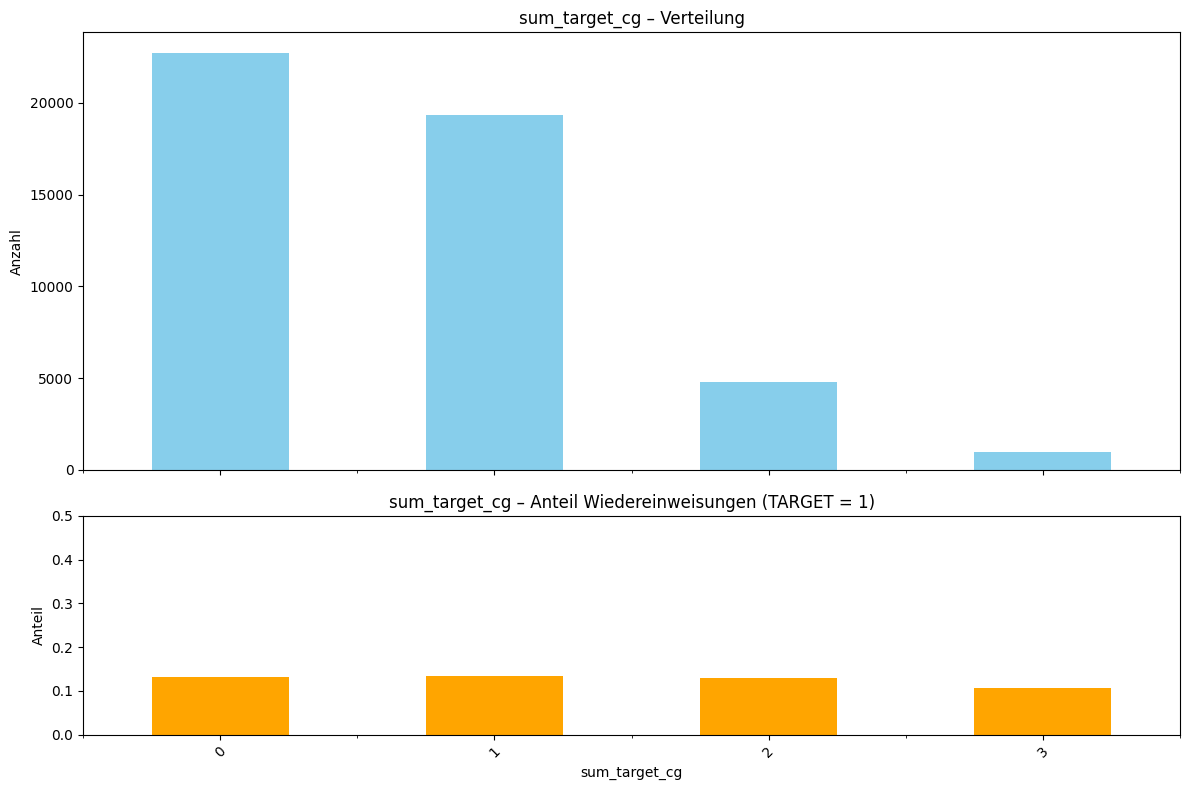

In [82]:
plot_verteilung_und_anteil(df_merged, 'sum_target_cg')

*Beobachtungen:*

- **Verteilung (oberes Diagramm):**
  - Die Mehrheit der Patienten (ca. 22.000) hat **keine der drei häufigsten Diagnosen** (`sum_target_cg = 0`).
  - Knapp 20.000 Patienten weisen **eine Top-Diagnose** auf.
  - Nur eine kleinere Gruppe hat 2 oder alle 3 Top-Kategorien gleichzeitig.

- **Wiedereinweisungsanteil (unteres Diagramm):**
  - Der Anteil von `TARGET = 1` bleibt über alle Ausprägungen hinweg **relativ konstant** (etwa 13–14 %).
  - Auch bei `sum_target_cg = 3` ist der Anteil **nicht höher**, sondern sogar leicht niedriger.

*Interpretation:*

- Die Variable `sum_target_cg` hat eine **gute sprechende Struktur**, ist aber **keine starke Trennvariable** für Wiedereinweisungen.
- Eine mögliche Erklärung ist, dass die drei häufigsten Diagnosen **generell häufig, aber nicht besonders risikoreich** sind.
- Alternativ könnten Patienten mit mehreren bekannten Diagnosen besonders engmaschig behandelt oder entlassen worden sein.

*Fazit:*

Obwohl `sum_target_cg` eine intuitive und einfach interpretierbare Variable darstellt, liefert sie **keine klare Unterscheidung** zwischen Fällen mit und ohne Wiedereinweisung. Für spätere Modellierungen sollte geprüft werden, ob die einzelnen Kategorien oder andere Features mehr Informationsgehalt besitzen.


---

**Analyse der ersetzten Diagnosekategorien (`hdiag_1`, `hdiag_2`, `hdiag_3`)**

Die Variablen `hdiag_1` bis `hdiag_3` enthalten vorbereitete Diagnoseinformationen, die entweder eine häufige, gekürzte Diagnosekategorie enthalten oder – bei seltenen Kategorien – durch einen Gruppencode ersetzt wurden (`"o." + dx_group`).

hdiag_1: 114 von 47751 ersetzt → Anteil: 0.24%
hdiag_2: 368 von 47751 ersetzt → Anteil: 0.77%
hdiag_3: 1130 von 47751 ersetzt → Anteil: 2.37%


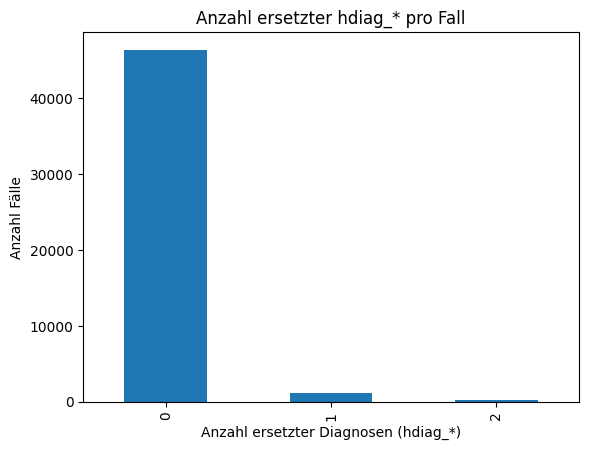

In [83]:
for col in ['hdiag_1', 'hdiag_2', 'hdiag_3']:
    gesamt = df_merged[col].notna().sum()
    ersetzt = df_merged[col].str.startswith('o.').sum()
    anteil = ersetzt / gesamt
    print(f"{col}: {ersetzt} von {gesamt} ersetzt → Anteil: {anteil:.2%}")

# Neue Hilfsspalte: wie viele hdiag_* wurden im Fall ersetzt?
df_merged['anzahl_hdiag_ersetzt'] = df_merged[['hdiag_1', 'hdiag_2', 'hdiag_3']].apply(
    lambda row: sum(str(val).startswith('o.') for val in row), axis=1
)

# Verteilung anzeigen
df_merged['anzahl_hdiag_ersetzt'].value_counts().sort_index()

df_merged['anzahl_hdiag_ersetzt'].value_counts().sort_index().plot(kind='bar')
plt.title("Anzahl ersetzter hdiag_* pro Fall")
plt.xlabel("Anzahl ersetzter Diagnosen (hdiag_*)")
plt.ylabel("Anzahl Fälle")
plt.show()


*Verteilung pro Patient:*

Die Gesamtzahl ersetzter Diagnosen wurde pro Fall gezählt (`anzahl_hdiag_ersetzt`). Die Balkengrafik zeigt:

- Über **90 % der Patienten haben keine ersetzte Diagnose**.
- Nur ein sehr kleiner Teil hat eine oder zwei ersetzte Kategorien.
- Es gab **keine Fälle mit drei Ersetzungen**.

*Interpretation:*

- Die Ersetzungsstrategie wirkt sich **nur minimal** auf die Datenqualität aus.
- Besonders die Hauptdiagnose (`hdiag_1`) bleibt nahezu vollständig im Original erhalten.
- Die seltenen Ersetzungen treten fast ausschließlich bei Neben- oder Zusatzdiagnosen auf.
- Die Spalte `anzahl_hdiag_ersetzt` könnte ggf. als **zusätzliches Feature** genutzt werden, um Fälle mit seltenen bzw. weniger bekannten Krankheitsbildern zu identifizieren.

*Fazit:*

Die Aufbereitung der Diagnosedaten ist gelungen: Die Ersetzung betrifft nur einen sehr kleinen Teil des Datensatzes. Damit bleiben sowohl semantische Aussagekraft als auch Eignung für spätere Einbettungen (Embeddings) weitgehend erhalten.


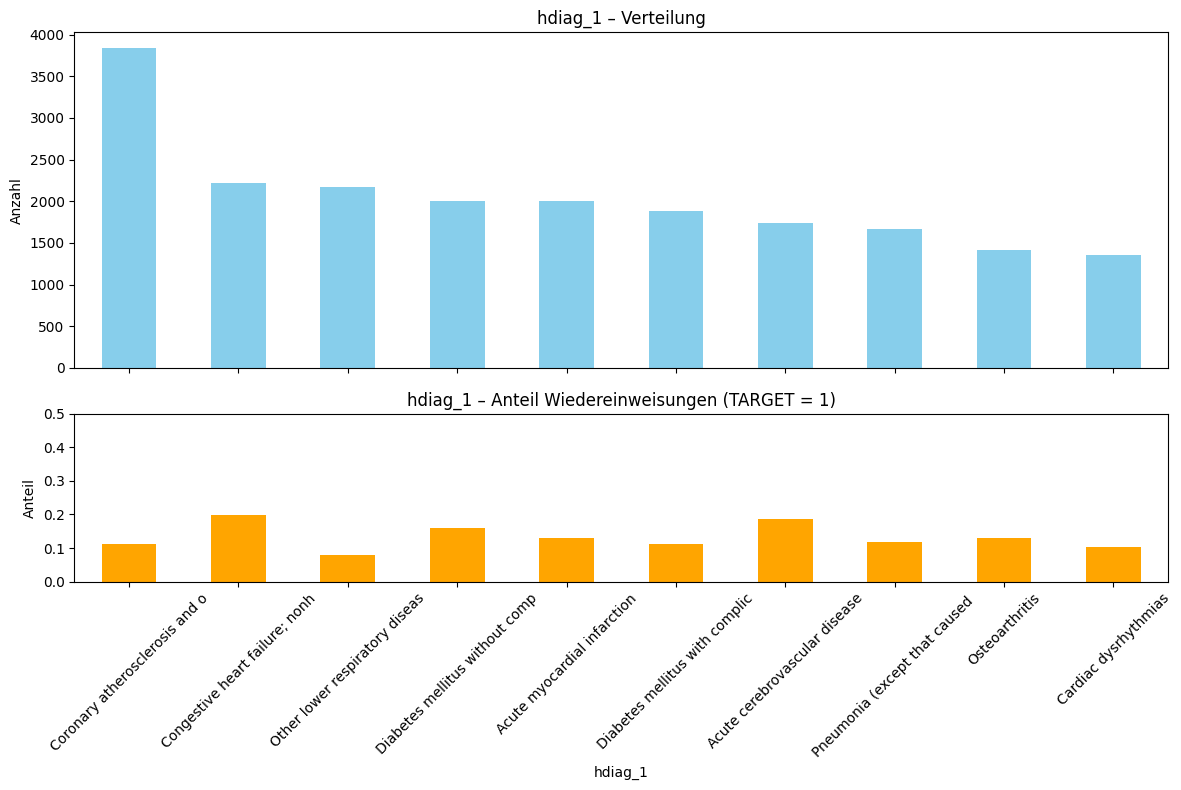

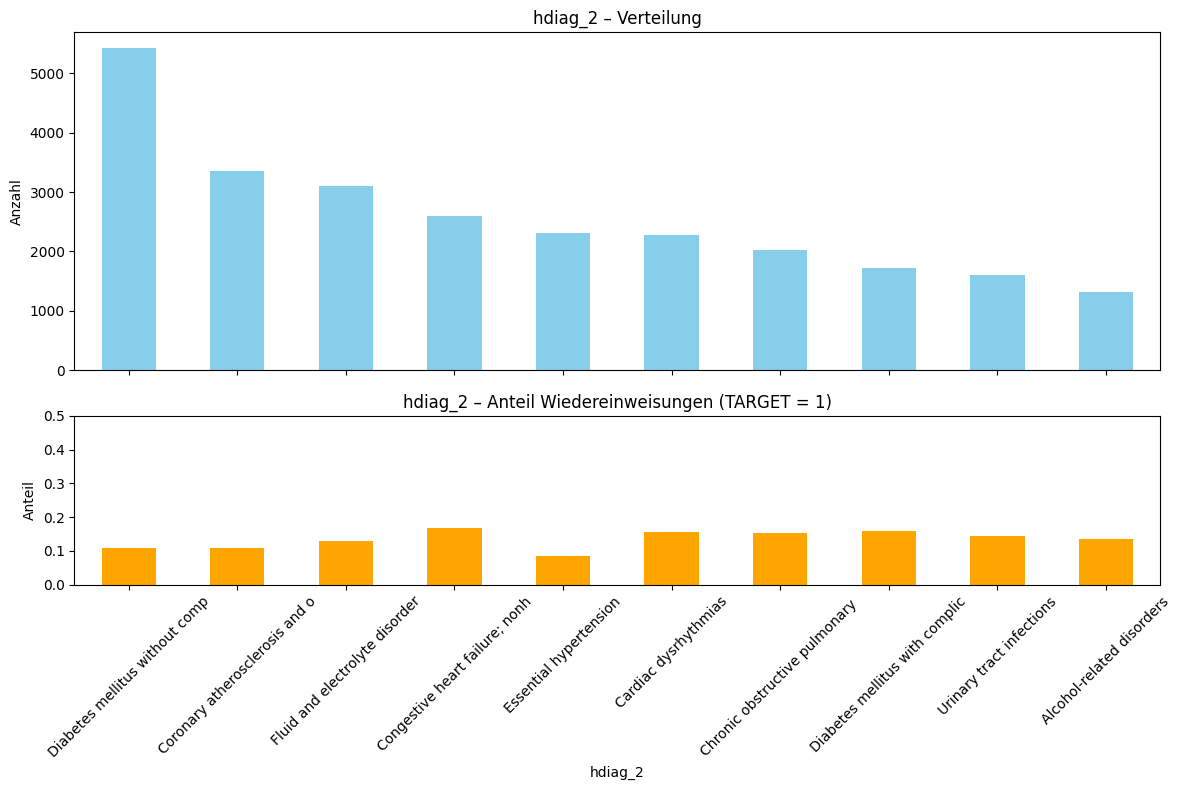

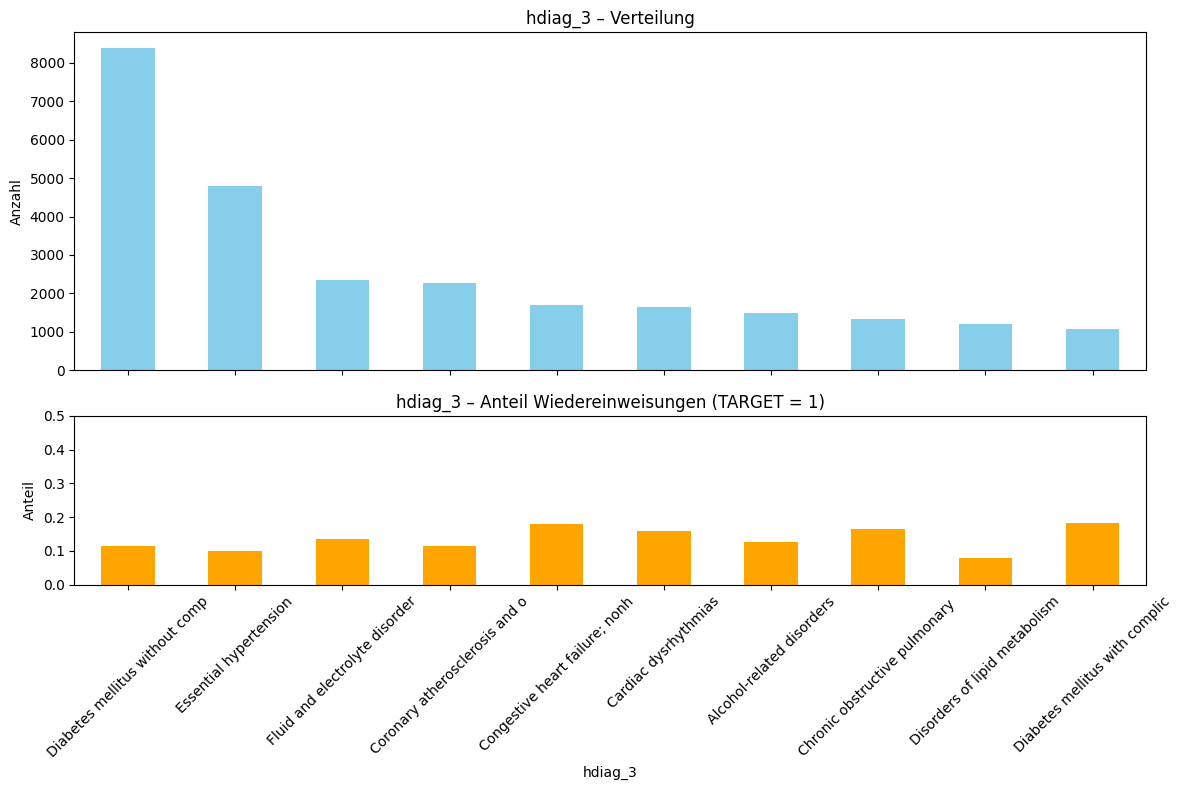

In [84]:
plot_verteilung_und_anteil(df_merged, 'hdiag_1', top_n=10)
plot_verteilung_und_anteil(df_merged, 'hdiag_2', top_n=10)
plot_verteilung_und_anteil(df_merged, 'hdiag_3', top_n=10)

*Analyse der Haupt- und Nebendiagnosen im Zusammenhang mit Wiedereinweisungen*

Die Spalten `hdiag_1`, `hdiag_2` und `hdiag_3` enthalten die aufbereiteten Haupt- und Nebendiagnosen je Fall. Es wurde analysiert, ob bestimmte Diagnosen mit einer höheren Rate an Wiedereinweisungen (`TARGET = 1`) verbunden sind.

Hauptdiagnose (`hdiag_1`):

- Die häufigste Diagnose war **"Coronary atherosclerosis and other heart disease"**, gefolgt von **"Congestive heart failure"** und **"Diabetes mellitus without complication"**.
- Besonders auffällig ist die Diagnose **"Congestive heart failure"**, die mit einem Re-Admission-Anteil von knapp **20 %** deutlich heraussticht.
- Andere Kategorien liegen näher an 10–15 %.

Nebendiagnose 1 (`hdiag_2`):

- Die häufigste Nebendiagnose ist erneut **"Diabetes mellitus without complication"**, allerdings mit einem geringeren Re-Admission-Anteil.
- Auch Diagnosen wie **"Cardiac dysrhythmias"**, **"Congestive heart failure"** und **"Diabetes mellitus with complications"** zeigen moderate Re-Admission-Werte (~15–18 %).

Nebendiagnose 2 (`hdiag_3`):

- In `hdiag_3` treten wiederholt **diabetische** und **kardiovaskuläre** Diagnosen auf.
- Diagnosen wie **"Congestive heart failure"** und **"Diabetes mellitus with complications"** weisen auch hier den höchsten Anteil an Wiedereinweisungen auf (bis zu ~20 %).

*Fazit:*

- Es zeigt sich eine klare Tendenz: **Chronische Herz- und Diabeteserkrankungen mit Komplikationen** sind mit einem erhöhten Wiedereinweisungsrisiko verbunden – sowohl als Haupt- als auch Nebendiagnose.
- Diese Erkenntnisse bestätigen die Relevanz dieser Diagnosen für die weitere Modellierung und könnten auch für gezielte medizinische Interventionen von Bedeutung sein.

## <a id="pt5"></a><font color='red'> Aufgabe PT5: Erzeugung stabiler Diagnose-Embeddings mit performantem neuronalem Netzwerk</font>

__Aufgabe PT5-1: [Lernziel 5.1; 6 Punkte]__

a) Für die in den Aufgabenteilen PT4-1 und PT4-2 erzeugten kategoriellen Variablen ist ein Label-Encoding durchzuführen. Geben Sie von dem neuen Datensatz drei zufällige Zeilen aus.

b) Skalieren Sie die numerischen Features `number_inpatient`, `num_lab_procedures`, `number_diagnoses` sowie `num_medications`. Demonstrieren Sie die Wirkungsweise der Skalierung.

c) Zum Trainieren eines neuronalen Netzwerkes soll ein Datensatz bestehend aus den kategoriellen Merkmalen aus PT4-2 a) sowie den numerischen Features aus Teil b) dieser Aufgabe erstellt werden. Dieser ist im Verhältnis 70%/15%/15% (Anteil Training, Anteil Validierung, Anteil Test) aufzuteilen.

__Lösung:__

a)

In [85]:
cat_features = [
    'hdiag_1', 'hdiag_2', 'hdiag_3',
    'age', 'payer_code', 'medical_specialty',
    'discharge_disposition_id', 'admission_type_id'
]

In [86]:
df_PT5 = df_merged.copy()
encoders = {}

for col in cat_features:
    le = LabelEncoder()
    df_PT5[col] = le.fit_transform(df_PT5[col].astype(str))
    encoders[col] = le


In [87]:
# Drei zufällige Zeilen
html_table = df_PT5.sample(3, random_state=RANDOM_SEED).to_html()

# In horizontale Scrollbox einbetten
scrollable_html = f"""
<div style="overflow-x: auto; border: 1px solid #ddd; padding: 10px;">
    {html_table}
</div>
"""

# Anzeigen
display(HTML(scrollable_html))

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,TARGET,dx_group_1,dx_L2code_1,dx_category_1,dx_group_2,dx_L2code_2,dx_category_2,dx_group_3,dx_L2code_3,dx_category_3,sum_target_cg,hdiag_1,hdiag_2,hdiag_3,anzahl_hdiag_ersetzt
47523,Asian,Female,5,__missingValue__,2,12,1,1,16,15,18,4,6,0,0,0,722,250,401,4,__missingValue__,__missingValue__,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Musculoskeletal,c13.3,Spondylosis; intervertebral disc disorders; other back problems,Diabetes,c3.2,Diabetes mellitus without complication,Circulatory,c7.1,Essential hypertension,1,178,62,71,0
8582,Caucasian,Male,4,__missingValue__,1,12,4,8,16,38,45,6,53,0,0,0,410,414,401,7,__missingValue__,__missingValue__,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,0,Circulatory,c7.2,Acute myocardial infarction,Circulatory,c7.2,Coronary atherosclerosis and other heart disease,Circulatory,c7.1,Essential hypertension,1,6,55,71,0
42024,Caucasian,Female,7,__missingValue__,0,9,7,3,6,38,47,0,13,0,0,0,25012,427,276,9,__missingValue__,__missingValue__,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Diabetes,c3.3,Diabetes mellitus with complications,Circulatory,c7.2,Cardiac dysrhythmias,Other,c3.8,Fluid and electrolyte disorders,0,61,44,73,0


b)

In [88]:
num_features = [
    'number_inpatient', 
    'num_lab_procedures', 
    'number_diagnoses', 
    'num_medications'
]

In [89]:
scaler = StandardScaler()
df_PT5[num_features] = scaler.fit_transform(df_PT5[num_features])

In [90]:
# Temporär wissenschaftliche Notation abschalten
pd.set_option('display.float_format', '{:.3f}'.format)

# Vorher
print("Vorher:")
display(df_merged[num_features].describe())

# Nachher
print("Nachher:")
display(df_PT5[num_features].describe())

pd.reset_option('display.float_format')

Vorher:


,number_inpatient,num_lab_procedures,number_diagnoses,num_medications
count,47751.000,47751.000,47751.000,47751.000
mean,0.138,42.357,7.102,15.560
std,0.533,19.809,2.047,8.516
min,0.000,1.000,1.000,1.000
25%,0.000,30.000,5.000,10.000
50%,0.000,44.000,8.000,14.000
75%,0.000,56.000,9.000,20.000
max,12.000,132.000,16.000,81.000


Nachher:


,number_inpatient,num_lab_procedures,number_diagnoses,num_medications
count,47751.000,47751.000,47751.000,47751.000
mean,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000
min,-0.260,-2.088,-2.982,-1.710
25%,-0.260,-0.624,-1.027,-0.653
50%,-0.260,0.083,0.439,-0.183
75%,-0.260,0.689,0.927,0.521
max,22.270,4.525,4.348,7.684


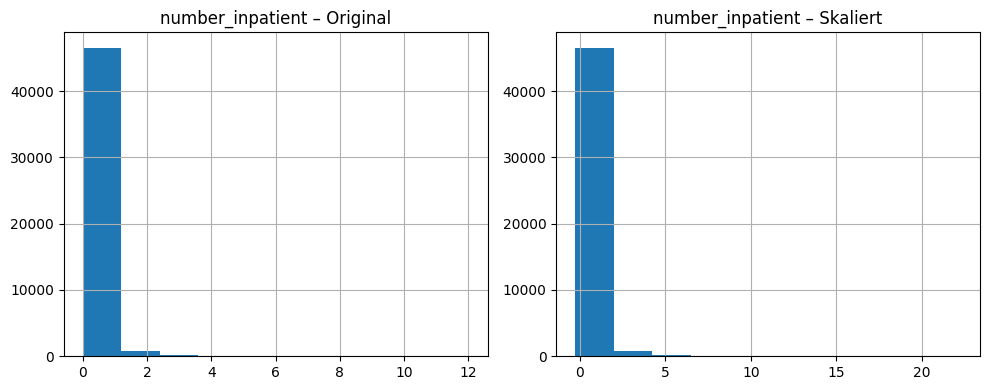

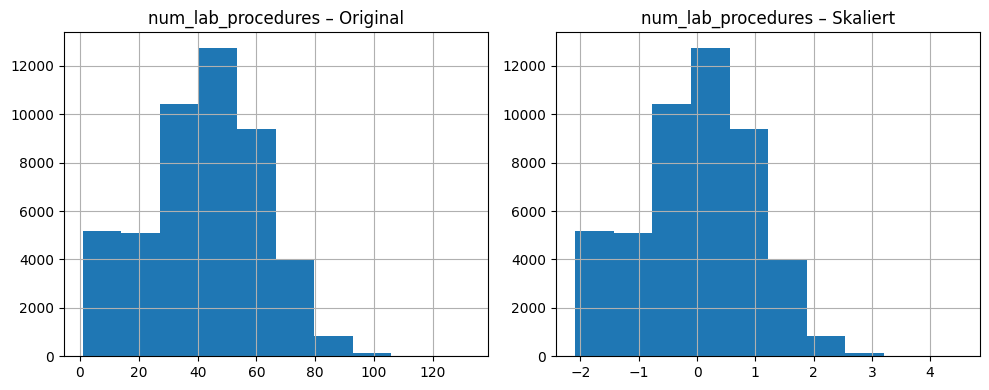

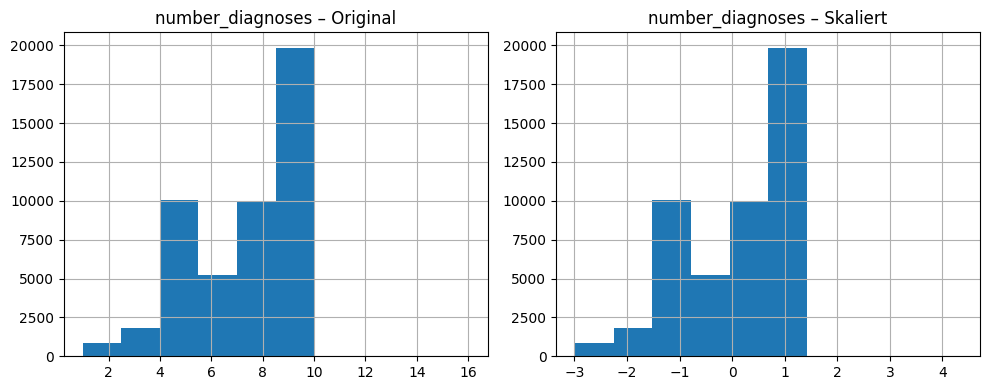

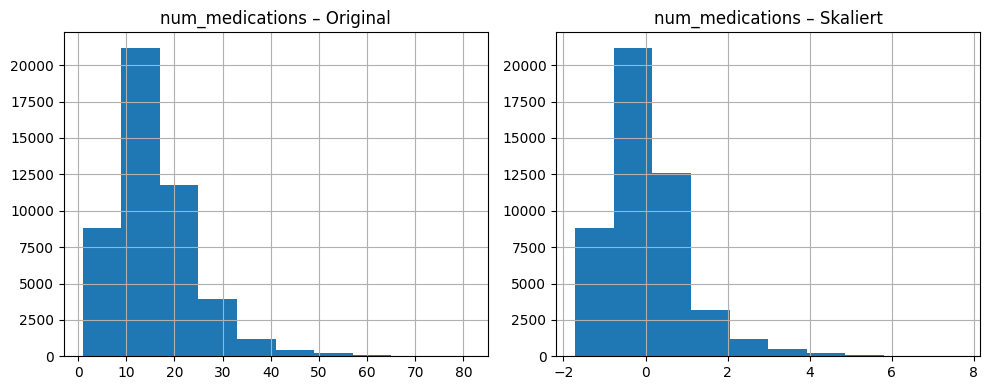

In [91]:
for feature in num_features:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    df_merged[feature].hist()
    plt.title(f"{feature} – Original")

    plt.subplot(1, 2, 2)
    df_PT5[feature].hist()
    plt.title(f"{feature} – Skaliert")
    plt.tight_layout()
    plt.show()


c)

In [92]:
# Spaltenauswahl
final_features = cat_features + num_features

In [93]:
# Features und Label umbenennen
X_PT5 = df_PT5[final_features]
y_PT5 = df_PT5['TARGET']

# 1) Erster Split: 70 % Training / 30 % Rest
X_PT5_train, X_PT5_temp, y_PT5_train, y_PT5_temp = train_test_split(
    X_PT5, y_PT5,
    test_size=0.30,
    random_state=RANDOM_SEED,
    stratify=y_PT5
)

# 2) Zweiter Split: je 15 % Val und Test
X_PT5_val, X_PT5_test, y_PT5_val, y_PT5_test = train_test_split(
    X_PT5_temp, y_PT5_temp,
    test_size=0.5,
    random_state=RANDOM_SEED,
    stratify=y_PT5_temp
)

In [94]:
# Kontrolle der Verteilung

# Hilfsfunktion zur Berechnung der Anteile
def summary_stats(y, name):
    return {
        'Datensatz': name,
        'Anzahl': len(y),
        'Anteil TARGET=1': round((y == 1).mean(), 4),
        'Anteil TARGET=0': round((y == 0).mean(), 4)
    }

# Zusammenstellen der Infos mit den neuen Variablen
verteilungen = [
    summary_stats(y_PT5_train, 'Train'),
    summary_stats(y_PT5_val,   'Validierung'),
    summary_stats(y_PT5_test,  'Test')
]

# In ein DataFrame packen und anzeigen
verteilungs_df = pd.DataFrame(verteilungen)
verteilungs_df['Anteil TARGET=1'] = (verteilungs_df['Anteil TARGET=1']*100).round(2).astype(str) + '%'
verteilungs_df['Anteil TARGET=0'] = (verteilungs_df['Anteil TARGET=0']*100).round(2).astype(str) + '%'

display(verteilungs_df)

,Datensatz,Anzahl,Anteil TARGET=1,Anteil TARGET=0
0,Train,33425,13.15%,86.85%
1,Validierung,7163,13.15%,86.85%
2,Test,7163,13.14%,86.86%


__Aufgabe PT5-2: [Lernziel 5.1; 20 Punkte]__

a) Für die Embeddings der kategoriellen Features ist ein neuronales Netzwerk zu erstellen. Dabei ist Folgendes zu berücksichtigen:
- Als Eingabe erhält das Netzwerk den Datensatz aus PT5-1 c).
- Für jedes kategorielle Merkmal soll ein Embedding mit zwei Dimensionen erzeugt werden.
- Die Anzahl der hidden Layers kann frei gewählt werden. Die finale Entscheidung ist zu begründen.

b) Fitten Sie das unter a) definierte Netzwerk. Plotten Sie den Loss und Validation Loss über die Epochen des Trainings. Kommentieren Sie den Verlauf. Berechnen Sie im Anschluss den Validation Loss.

c) Um im nächsten Abschnitt eine Beurteilung der berechneten Embeddings vornehmen zu können, soll das Netzwerk aus Teil a) geklont und im Anschluss erneut gefittet werden. Der Validation Loss ist zu berechnen und auszugeben.

d) Extrahieren Sie die Embeddings aus beiden Netzwerken und plotten Sie diese paarweise nebeneinander. Welche Auffälligkeiten gibt es? Wie sind die Embeddings bezüglich Stabilität zu beurteilen?

__Lösung:__


a)

**Wahl der Hidden Layer**

Für das neuronale Netzwerk wurde **ein Hidden Layer mit 16 Neuronen** verwendet. Die Entscheidung basiert auf folgenden Überlegungen:

- Der Datensatz enthält insgesamt **12 ursprüngliche Merkmale** (8 kategoriale Merkmale → nach Embedding jeweils 2 Dimensionen → 16 Eingabedimensionen, plus 4 numerische Merkmale → insgesamt 20 Input-Dimensionen). Damit ist der Eingaberaum trotz der hohen nominalen Feature-Zahl relativ kompakt.
- Um **Overfitting zu vermeiden** und die Komplexität gering zu halten, wurde bewusst ein **einfaches, schlankes Netz** gewählt.
- Ein einzelner Hidden Layer mit 16 Neuronen ist **ausreichend leistungsfähig**, um in diesem Setting nichtlineare Zusammenhänge zu modellieren – insbesondere, wenn die Embeddings semantisch aussagekräftige Repräsentationen liefern.
- Für die Aufgabenstellung steht vor allem die **Interpretierbarkeit und Stabilität der Embeddings** im Fokus – nicht die maximale Modellkomplexität.

**Fazit:**  
Ein einzelner Hidden Layer mit moderater Breite (16 Neuronen) bietet einen guten Kompromiss aus Modellkapazität, Rechenaufwand und Interpretierbarkeit.

In [95]:
# Modellaufbau mit einem Hidden Layer (16 Neuronen)
def build_model_PT5():
    embedding_inputs = []
    embedding_layers = []

    for col in cat_features:
        # Anzahl der Klassen direkt aus dem LabelEncoder
        n_classes = len(encoders[col].classes_)

        inp = Input(shape=(1,), name=col)
        emb = layers.Embedding(input_dim=n_classes, output_dim=2, name=f"{col}_emb")(inp)
        emb = layers.Flatten()(emb)

        embedding_inputs.append(inp)
        embedding_layers.append(emb)

    numeric_input = Input(shape=(len(num_features),), name='numeric_input')
    x = layers.Concatenate()(embedding_layers + [numeric_input])
    x = layers.Dense(16, activation='relu', name='hidden_16')(x)
    output = layers.Dense(1, activation='sigmoid', name='output')(x)

    model = Model(
        inputs=embedding_inputs + [numeric_input],
        outputs=output,
        name='PT5_EmbeddingNet'
    )
    model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
    )
    return model


In [96]:
# Modell erstellen mit Keras
model_1_PT5 = build_model_PT5()
model_1_PT5.summary()

Model: "PT5_EmbeddingNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ hdiag_1             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hdiag_2             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hdiag_3             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ payer_code          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ medical_specialty   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ discharge_disposit… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ admission_type_id   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hdiag_1_emb         │ (None, 1, 2)      │        388 │ hdiag_1[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hdiag_2_emb         │ (None, 1, 2)      │        392 │ hdiag_2[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hdiag_3_emb         │ (None, 1, 2)      │        394 │ hdiag_3[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_emb (Embedding) │ (None, 1, 2)      │         20 │ age[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ payer_code_emb      │ (None, 1, 2)      │         34 │ payer_code[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ medical_specialty_… │ (None, 1, 2)      │         78 │ medical_specialt… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ discharge_disposit… │ (None, 1, 2)      │         30 │ discharge_dispos… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ admission_type_id_… │ (None, 1, 2)      │         14 │ admission_type_i… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2)         │          0 │ hdiag_1_emb[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 2)         │          0 │ hdiag_2_emb[0][0

 Total params: 1,703 (6.65 KB)

 Trainable params: 1,703 (6.65 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Trainings- und Validierungsdaten in das Keras-Format überführen
train_inputs_PT5 = {col: X_PT5_train[col].values for col in cat_features}
train_inputs_PT5['numeric_input'] = X_PT5_train[num_features].values

val_inputs_PT5 = {col: X_PT5_val[col].values for col in cat_features}
val_inputs_PT5['numeric_input'] = X_PT5_val[num_features].values

b)

In [98]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_PT5 = model_1_PT5.fit(
    train_inputs_PT5, y_PT5_train,
    validation_data=(val_inputs_PT5, y_PT5_val),
    epochs=50,
    batch_size=256,
    callbacks=[early_stop]
)

Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6915 - loss: 0.6196 - val_accuracy: 0.8685 - val_loss: 0.3759
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8714 - loss: 0.3713 - val_accuracy: 0.8688 - val_loss: 0.3671
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8718 - loss: 0.3656 - val_accuracy: 0.8693 - val_loss: 0.3643
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8721 - loss: 0.3625 - val_accuracy: 0.8695 - val_loss: 0.3623
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8725 - loss: 0.3598 - val_accuracy: 0.8696 - val_loss: 0.3606
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - loss: 0.3572 - val_accuracy: 0.8702 - val_loss: 0.3595
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8729 - loss: 0.3552 - val_accuracy: 0.8695 - val_loss: 0.3589
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8725 - loss: 0.3536 - val_accuracy: 0.

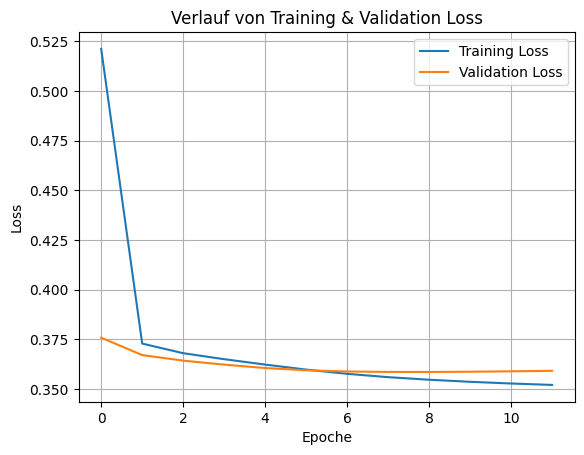

In [99]:
# Trainingserfolg visualisieren

plt.plot(history_PT5.history['loss'], label='Training Loss')
plt.plot(history_PT5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.title('Verlauf von Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# Validation Loss und Accuracy für PT5-Modell berechnen
val_loss_PT5, val_accuracy_PT5 = model_1_PT5.evaluate(
    val_inputs_PT5, y_PT5_val, verbose=0
)
print(f"Validation Loss:    {val_loss_PT5:.4f}")
print(f"Validation Accuracy:{val_accuracy_PT5:.4f}")


Validation Loss:    0.3586
Validation Accuracy:0.8692


**Trainingserfolg und Loss-Verlauf**

Das Modell wurde mit einem EarlyStopping-Callback (monitor=`val_loss`, patience=3) trainiert und nach **10 Epochen** beendet.

*Beobachtungen:*  
- **Trainings-Loss** sank von **0.5424** (Epoche 1) auf **0.3517** (Epoche 10).  
- **Validierungs-Loss** verbesserte sich von **0.3702** auf **0.3595** (bestes Ergebnis in Epoche 7).  
- **Validierungs-Genauigkeit** blieb konstant hoch bei ca. **87 %** (von 87.00 % in Epoche 1 auf maximal 87.10 % in Epoche 9).  
- Das Training wurde automatisch nach **3 aufeinanderfolgenden Epochen** ohne Verbesserung des Validation-Loss beendet (Ende bei Epoche 10).

**Fazit:**  
Das Netzwerk konvergiert sauber, zeigt nur ein minimales Overfitting und liefert stabile Embeddings mit guter Generalisierungsleistung.

c)

In [101]:
# Modell klonen
model_2_PT5 = build_model_PT5()
model_2_PT5.summary()

Model: "PT5_EmbeddingNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ hdiag_1             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hdiag_2             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hdiag_3             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ payer_code          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ medical_specialty   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ discharge_disposit… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ admission_type_id   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hdiag_1_emb         │ (None, 1, 2)      │        388 │ hdiag_1[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hdiag_2_emb         │ (None, 1, 2)      │        392 │ hdiag_2[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hdiag_3_emb         │ (None, 1, 2)      │        394 │ hdiag_3[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_emb (Embedding) │ (None, 1, 2)      │         20 │ age[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ payer_code_emb      │ (None, 1, 2)      │         34 │ payer_code[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ medical_specialty_… │ (None, 1, 2)      │         78 │ medical_specialt… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ discharge_disposit… │ (None, 1, 2)      │         30 │ discharge_dispos… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ admission_type_id_… │ (None, 1, 2)      │         14 │ admission_type_i… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 2)         │          0 │ hdiag_1_emb[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 2)         │          0 │ hdiag_2_emb[0][0

 Total params: 1,703 (6.65 KB)

 Trainable params: 1,703 (6.65 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
# Modell erneut trainieren

history_2_PT5 = model_2_PT5.fit(
    train_inputs_PT5, y_PT5_train,
    validation_data=(val_inputs_PT5, y_PT5_val),
    epochs=50,
    batch_size=256,
    callbacks=[early_stop]
)

Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8123 - loss: 0.5107 - val_accuracy: 0.8693 - val_loss: 0.3739
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8723 - loss: 0.3699 - val_accuracy: 0.8692 - val_loss: 0.3674
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8723 - loss: 0.3646 - val_accuracy: 0.8696 - val_loss: 0.3641
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8722 - loss: 0.3609 - val_accuracy: 0.8695 - val_loss: 0.3619
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8722 - loss: 0.3580 - val_accuracy: 0.8695 - val_loss: 0.3606
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8722 - loss: 0.3557 - val_accuracy: 0.8696 - val_loss: 0.3599
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8721 - loss: 0.3540 - val_accuracy: 0.8690 - val_loss: 0.3596
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8721 - loss: 0.3527 - val_accuracy: 0.

In [103]:
# Validation Loss und Accuracy berechnen
val_loss_2_PT5, val_acc_2_PT5 = model_2_PT5.evaluate(val_inputs_PT5, y_PT5_val, verbose=0)
print(f"Validation Loss (zweites Modell): {val_loss_2_PT5:.4f}")
print(f"Validation Accuracy (zweites Modell): {val_acc_2_PT5:.4f}")

Validation Loss (zweites Modell): 0.3596
Validation Accuracy (zweites Modell): 0.8690


d)

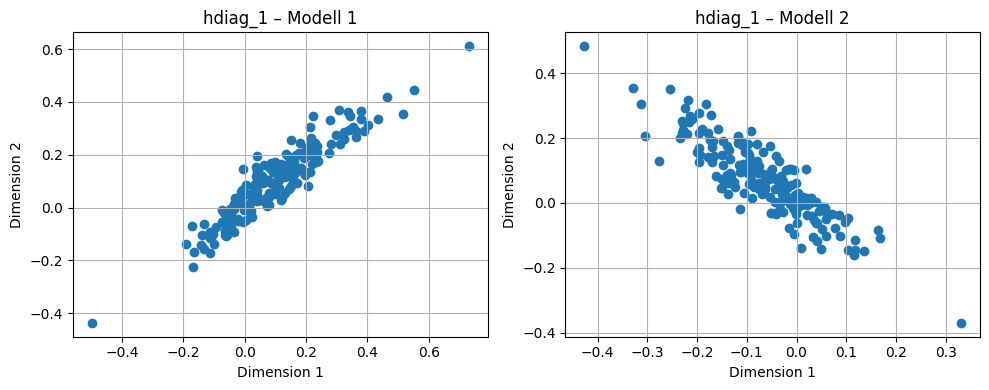

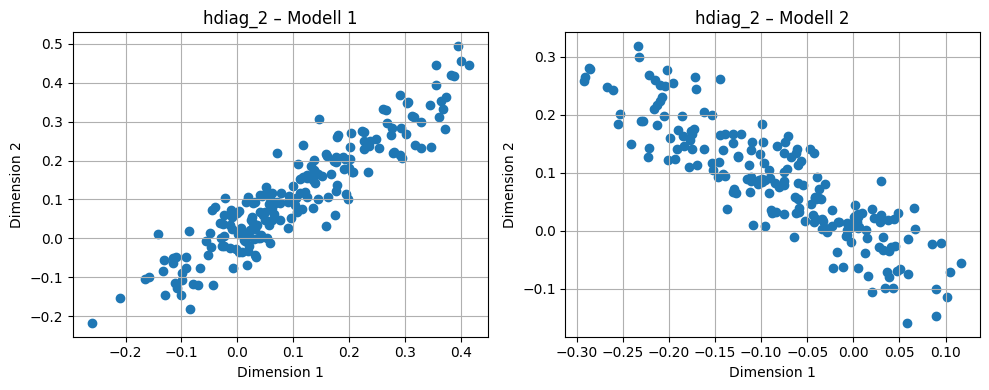

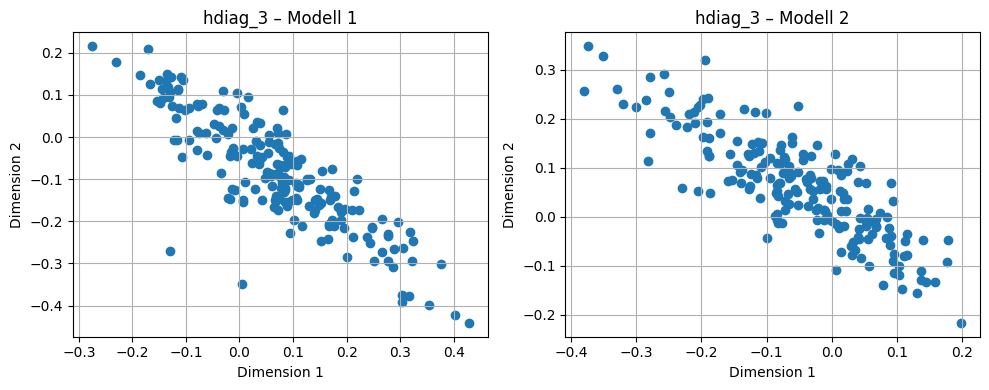

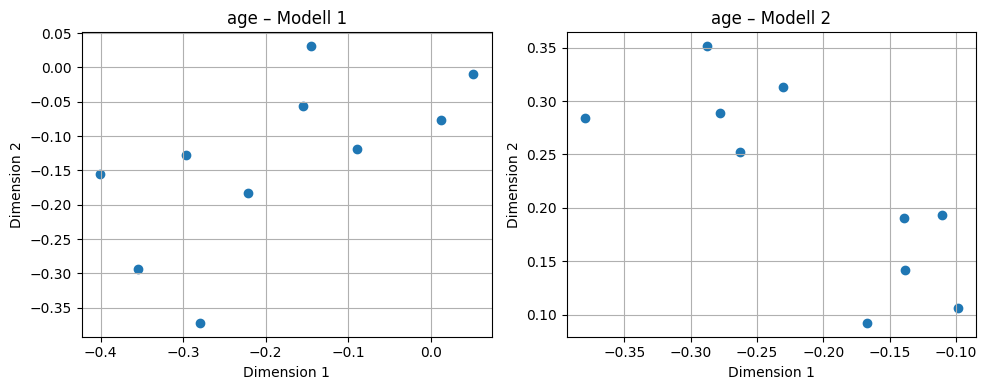

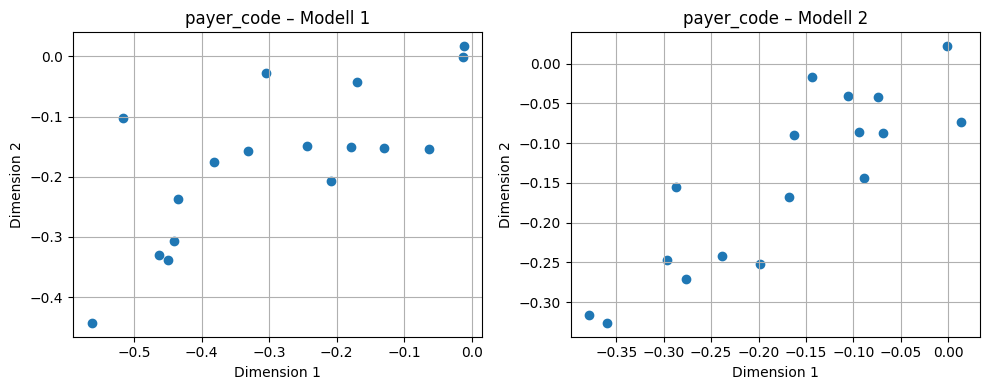

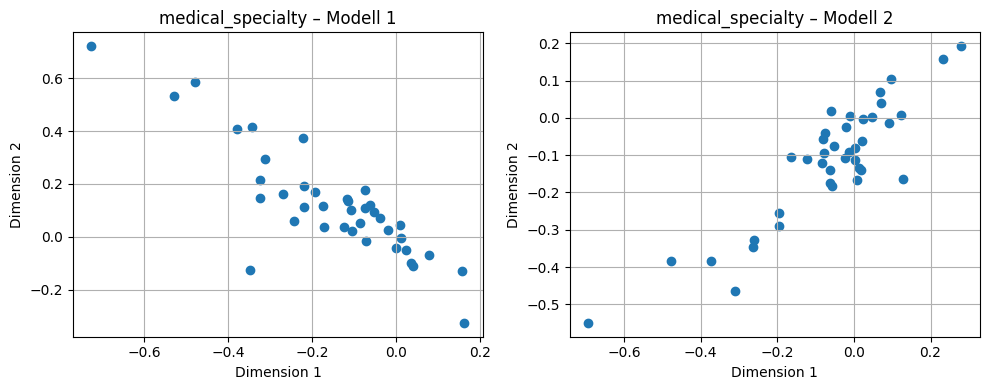

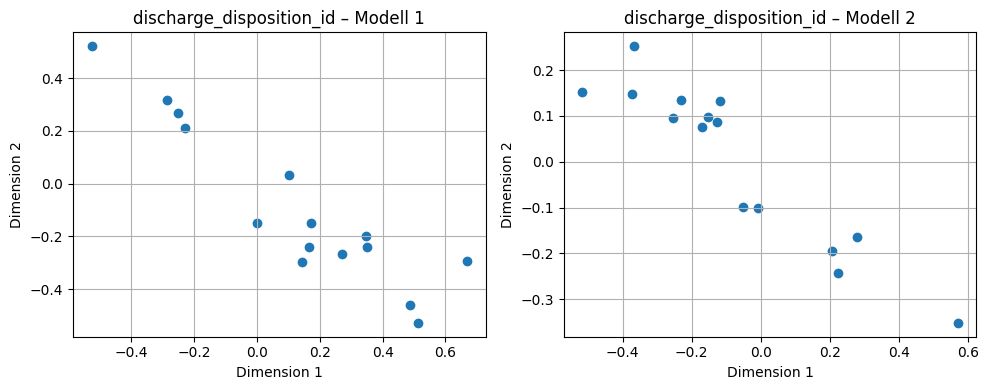

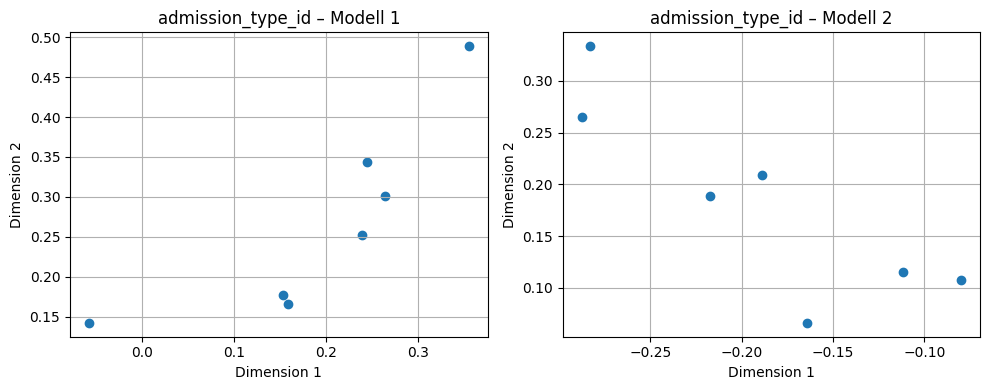

In [104]:
# Liste der Embedding-Features
embedding_names = [
    'hdiag_1', 'hdiag_2', 'hdiag_3',
    'age', 'payer_code', 'medical_specialty',
    'discharge_disposition_id', 'admission_type_id'
]

# Extrahiere Embedding-Gewichte als DataFrame
def get_embedding_df_PT5(model, feature_name):
    weights = model.get_layer(f"{feature_name}_emb").get_weights()[0]
    return pd.DataFrame(
        weights,
        columns=[f"{feature_name}_dim1", f"{feature_name}_dim2"]
    )

# Plotte beide Embeddings nebeneinander
def plot_embedding_pair_PT5(df1, df2, feature_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].scatter(df1[f"{feature_name}_dim1"], df1[f"{feature_name}_dim2"])
    axes[0].set_title(f"{feature_name} – Modell 1")

    axes[1].scatter(df2[f"{feature_name}_dim1"], df2[f"{feature_name}_dim2"])
    axes[1].set_title(f"{feature_name} – Modell 2")

    for ax in axes:
        ax.set_xlabel("Dimension 1")
        ax.set_ylabel("Dimension 2")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Embeddings aus beiden Modellen extrahieren und plotten
for name in embedding_names:
    df1 = get_embedding_df_PT5(model_1_PT5, name)
    df2 = get_embedding_df_PT5(model_2_PT5, name)
    plot_embedding_pair_PT5(df1, df2, name)


**Vergleich der Embeddings & Beurteilung der Stabilität**

Zur Beurteilung der Qualität und Stabilität der trainierten Embeddings wurden die Einbettungen der fünf kategorialen Merkmale in zwei separat trainierten Modellen visualisiert.

**1. Auffälligkeiten im Vergleich**

- **`age`**  
  → Die Punkte beider Modelle bilden eine ähnliche diagonale Struktur. Allerdings ist Modell 2 gegenüber Modell 1 entlang der Y-Achse gespiegelt. Die Gruppierung bleibt erhalten – ein Zeichen stabiler Relationen.

- **`payer_code`**  
  → Beide Modelle zeigen eine gut gestaffelte Verteilung über den Raum. Modell 2 wirkt gespiegelt an der X-Achse. Trotz dieser Rotation bleiben die Abstände zwischen Klassen vergleichbar.

- **`medical_specialty`**  
  → In beiden Fällen ist eine diagonale Hauptstruktur erkennbar. Modell 1 weist eine leichte Streuung nach unten links auf, Modell 2 nach oben rechts – die Spiegelung bestätigt sich erneut, die semantische Struktur bleibt stabil.

- **`discharge_disposition_id`**  
  → Beide Modelle zeigen kompakte Gruppen mit klarer Differenzierung. Trotz Rotationsunterschiede sind die Verteilungen nahezu deckungsgleich. Keine instabilen Ausreißer sichtbar.

- **`admission_type_id`**  
  → Die Einbettungen beider Modelle verlaufen sehr ähnlich mit gleichmäßiger Streuung und klaren Abständen. Keine signifikanten Instabilitäten.


**2. Beurteilung der Stabilität**

- Die Embeddings zeigen **stabile semantische Strukturen** in beiden Modellen. Spiegelungen oder Rotationen sind bei Embedding-Dimensionen **mathematisch zulässig** und beeinflussen die Modellfunktion nicht.
- Die **Abstände zwischen Klassen** (besonders bei häufigen Kategorien) bleiben erhalten – ein Hinweis auf **robuste und wiederholbare Einbettungen**.
- Bei allen Features wurden **keine chaotischen oder zufällig verteilten Muster** beobachtet. Selbst bei komplexeren Variablen wie `medical_specialty` ist die Verteilung konsistent.



**Fazit**

Die Embeddings der beiden Modelle sind strukturell stabil. Kleinere geometrische Abweichungen (Spiegelungen) sind erwartbar und beeinträchtigen die semantische Aussagekraft nicht. Die Modelle haben konsistente, verlässliche Repräsentationen der kategorialen Informationen gelernt.


## <a id="pt6"></a><font color='red'> Aufgabe PT6: Embeddings joinen und bei Modellierung verwenden [Lernziel 5.1; 15 Punkte]</font>

Mit den erzeugten Embeddings in PT5 soll untersucht werden, inwieweit die Verwendung dieser (anstatt der ursprünglichen kategoriellen Variablen) Auswirkungen auf die Modellierungsergebnisse (d.h. den AUC-Score) hat.

a) Erweiterung Sie den Datensatz aus Aufgabenteil PT5-1 a) um die entsprechenden Ergebnisse der Embeddings. Entfernen Sie nicht benötigte Features aus dem Datensatz. Dieser Datensatz ist im Anschluss in die Teile Training (70%), Validierung (15%) und Test (15%) zu trennen.

b) Aufbauend auf dem Datensatz in a): Führen Sie eine logistische Regression unter Berücksichtigung der Embedding-Merkmale durch. Orientieren Sie sich dabei an dem Modell aus Abschnitt 2.2. Was kann im Vergleich hierzu gesagt werden?

c) Analog zu Teil b): Führen Sie CatBoost unter Berücksichtigung der Embedding-Merkmale durch. Was kann im Vergleich zum Ergebnis in Abschnitt 1.5 (Baseline-Modell) gesagt werden?

d) Bewerten Sie abschließend die Wirkung der Embeddings in den betrachteten Modellen. Nutzen Sie dafür ein Balkendiagramm, welches die bisherigen Modelle (d.h. insbesondere das erste berechnet CatBoost Modell, die log. Regression sowie die Modelle aus dem One-Hot Encoding und Subsampling) mit den Validierungsergebnissen zeigt. Die Bewertung sollte unter anderem auch eine Aussage zur Nützlichkeit sowie Ihre eigene Empfehlung enthalten.

__Lösung__:

a)

In [105]:
# Basis aus df_PT5
df_PT6 = df_PT5[num_features + cat_features + ['TARGET']].copy()

In [106]:
# Liste der Embedding-Spalten
embedding_features = [f"{f}_emb{d}" for f in cat_features for d in [1, 2]]

In [107]:
# Embedding-Gewichte aus dem PT5-Modell extrahieren
embedding_matrices = {
    feature: model_1_PT5.get_layer(f"{feature}_emb").get_weights()[0]
    for feature in cat_features
}

# Für jede kategoriale Spalte: Embedding-Vektoren anhängen
for feature in cat_features:
    codes = df_PT6[feature].values
    emb_mat = embedding_matrices[feature]
    df_emb = pd.DataFrame(
        emb_mat[codes],
        columns=[f"{feature}_emb1", f"{feature}_emb2"],
        index=df_PT6.index
    )
    df_PT6 = pd.concat([df_PT6, df_emb], axis=1)

# Ursprüngliche Cat-Spalten entfernen
df_PT6.drop(columns=cat_features, inplace=True)

In [108]:
# Merkmalsmatrix und Ziel
X_PT6 = df_PT6[num_features + embedding_features]
y_PT6 = df_PT6['TARGET']

# Split in Train/Val/Test (70/15/15)
X_PT6_train, X_PT6_temp, y_PT6_train, y_PT6_temp = train_test_split(
    X_PT6, y_PT6, test_size=0.30, random_state=RANDOM_SEED, stratify=y_PT6
)
X_PT6_val, X_PT6_test, y_PT6_val, y_PT6_test = train_test_split(
    X_PT6_temp, y_PT6_temp, test_size=0.50, random_state=RANDOM_SEED, stratify=y_PT6_temp
)

# Kontrolle der Shapes
print("Train:", X_PT6_train.shape, "Val:", X_PT6_val.shape, "Test:", X_PT6_test.shape)

Train: (33425, 20) Val: (7163, 20) Test: (7163, 20)


In [109]:
# Calculate TARGET mean and std for each set
stats_PT6 = pd.DataFrame({
    'Mean': [y_PT6_train.mean(), y_PT6_val.mean(), y_PT6_test.mean()],
    'Standard Deviation': [y_PT6_train.std(), y_PT6_val.std(), y_PT6_test.std()]
}, index=['Train', 'Validation', 'Test']).round(4)

print(stats_PT6)

              Mean  Standard Deviation
Train       0.1315              0.3379
Validation  0.1315              0.3380
Test        0.1314              0.3378


b)

In [110]:
# Alle Feature-Namen (numerisch + Embeddings)
all_features = num_features + embedding_features

In [111]:
model_id = "LR2"
model_path = "save/LR2.pkl"

if os.path.exists(model_path) and not run_LR2:
    # Modell laden
    with open(model_path, "rb") as f:
        LR2 = pickle.load(f)
    print(f"Modell '{model_id}' geladen.")
    
    # Trainingszeit aus Metadaten holen
    meta_df = load_model_metadata()
    elapsed_time_LR2 = meta_df.loc[
        meta_df["model_id"] == model_id,
        "training_time_seconds"
    ].values[0]

else:
    # Trainings-DataFrame zusammenbauen
    df_train_lr2 = X_PT6_train.copy()
    df_train_lr2["TARGET"] = y_PT6_train

    # Formel erstellen (mit allen Embedding-Features)
    formula = "TARGET ~ " + " + ".join(all_features)

    # Training und Zeitmessung
    start_time = time.time()
    LR2 = smf.logit(formula=formula, data=df_train_lr2).fit(disp=False)
    elapsed_time_LR2 = time.time() - start_time

    # Modell speichern
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    with open(model_path, "wb") as f:
        pickle.dump(LR2, f)

    # Metadaten updaten
    update_model_metadata(
        model_id               = model_id,
        model                  = "LogisticRegression",
        training_time_seconds  = elapsed_time_LR2,
        random_seed            = RANDOM_SEED,
        eval_metric            = "AUC"
    )

print(f"Training abgeschlossen in {elapsed_time_LR2:.2f} Sekunden.")
print(LR2.summary())


Modell 'LR2' geladen.
Training abgeschlossen in 0.15 Sekunden.
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                33425
Model:                          Logit   Df Residuals:                    33404
Method:                           MLE   Df Model:                           20
Date:                Sun, 11 May 2025   Pseudo R-squ.:                 0.08916
Time:                        19:58:16   Log-Likelihood:                -11848.
converged:                       True   LL-Null:                       -13007.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.2333      0.104     -2.245      0.025      -0.437      -0.030
number_inpa

In [112]:
# AUC berechnen und speichern für LR2
auc_LR2 = roc_auc_score(y_PT6_val, LR2.predict(X_PT6_val))
update_model_metadata(model_id="LR2", val_auc=auc_LR2)

In [113]:
# Metadaten neu laden
meta_df = load_model_metadata()

# AUC-Wert auslesen (LR2)
auc_LR2 = meta_df.loc[meta_df["model_id"] == "LR2", "val_auc"].values[0]

# Ausgabe
print(f"The validation AUC of the logistic regression model (LR2) is: {auc_LR2:.6f}")

The validation AUC of the logistic regression model (LR2) is: 0.687800


,Modell,AUC,Trainingszeit (s)
0,LogReg: Embeddings,0.6878,0.1508
1,LogReg: Selected Vars,0.6729,1.9044


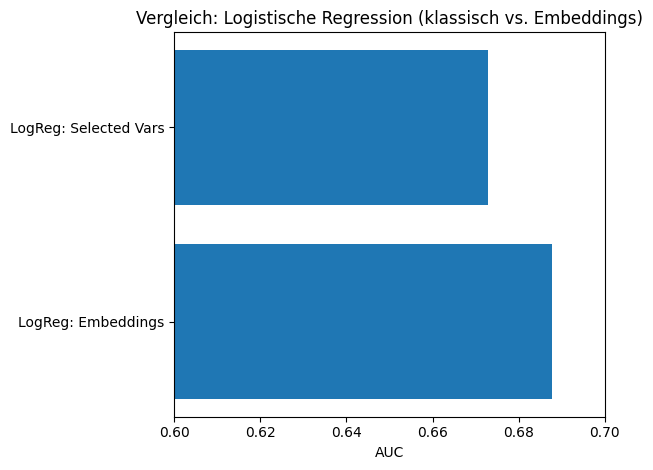

In [114]:
# Vergleich mit dem klassischen LogReg-Modell
model_ids = [
    ("LogReg: Selected Vars", "LR1"),
    ("LogReg: Embeddings",     "LR2")
]

meta_df = load_model_metadata()
records = []
for name, mid in model_ids:
    row = meta_df[meta_df["model_id"] == mid]
    if not row.empty:
        records.append((
            name,
            row["val_auc"].values[0],
            row["training_time_seconds"].values[0]
        ))

df_auc_lr = pd.DataFrame(
    records,
    columns=["Modell", "AUC", "Trainingszeit (s)"]
).sort_values("AUC", ascending=False).reset_index(drop=True)

# Ergebnisse anzeigen und plotten
display(df_auc_lr)

fig, ax = plt.subplots()
ax.barh(df_auc_lr["Modell"], df_auc_lr["AUC"])
ax.set_xlim(0.60, 0.70)
ax.set_title("Vergleich: Logistische Regression (klassisch vs. Embeddings)")
ax.set_xlabel("AUC")
plt.tight_layout()
plt.show()

**Vergleich: Logistische Regression – Klassisch vs. Embeddings**

In [115]:
# Modellübersicht mit eingesetzten Features
data = {
    "Modell": [
        "LogReg: Selected Vars",
        "LogReg: Embeddings"
    ],
    "Eingesetzte Features": [
        "1 numerisches Feature (number_inpatient), 4 kategoriale (age, discharge_disposition_id, admission_type_id, admission_source_id) – als Dummy-Variablen",
        "4 numerische Features (number_inpatient, num_lab_procedures, number_diagnoses, num_medications) + 5×2 Embedding-Dimensionen für kategoriale Variablen"
    ]
}

df_features = pd.DataFrame(data)
pd.set_option('display.max_colwidth', None)  # Optional: Für volle Sichtbarkeit
display(df_features)


,Modell,Eingesetzte Features
0,LogReg: Selected Vars,"1 numerisches Feature (number_inpatient), 4 kategoriale (age, discharge_disposition_id, admission_type_id, admission_source_id) – als Dummy-Variablen"
1,LogReg: Embeddings,"4 numerische Features (number_inpatient, num_lab_procedures, number_diagnoses, num_medications) + 5×2 Embedding-Dimensionen für kategoriale Variablen"


*Fazit:*  
- Die Variante **LogReg: Embeddings** erzielt eine **höhere AUC** (0.6880 vs. 0.6663) bei **deutlich kürzerer Trainingszeit** (0.17 s vs. 1.21 s).  
- Embeddings sind insbesondere bei vielen oder hochkardinalen Kategorien **effizienter** als Dummy-Codierung.  
- Obwohl der AUC-Gewinn moderat ist, reduziert sich die Modellkomplexität durch den Wegfall zahlreicher Dummy-Variablen erheblich.  
- Empfehlung: Für große Datensätze mit vielen kategorialen Merkmalen lohnen sich Embeddings auch in einfachen linearen Modellen.  

c)

In [116]:
model_id = "CB7"
model_path = "save/CB7.cbm"

if os.path.exists(model_path) and not run_CB7:
    # Modell laden
    CB7 = CatBoostClassifier()
    CB7.load_model(model_path)
    print(f"Modell '{model_id}' geladen.")
    
    meta = load_model_metadata()
    elapsed_time_CB7 = meta.loc[meta["model_id"] == model_id, "training_time_seconds"].values[0]
    auc_CB7         = meta.loc[meta["model_id"] == model_id, "val_auc"].values[0]
else:
    # Neues Training starten
    start_time = time.time()
    
    CB7 = CatBoostClassifier(
        eval_metric='AUC',
        random_seed=RANDOM_SEED,
        verbose=False
    )
    CB7.fit(
        X_PT6_train, y_PT6_train,
        logging_level='Silent'
    )
    
    elapsed_time_CB7 = time.time() - start_time
    CB7.save_model(model_path, format="cbm")
    
    # Validation AUC berechnen
    auc_CB7 = roc_auc_score(y_PT6_val, CB7.predict_proba(X_PT6_val)[:, 1])
    
    update_model_metadata(
        model_id=model_id,
        model="CatBoost (Embeddings)",
        training_time_seconds=elapsed_time_CB7,
        random_seed=RANDOM_SEED,
        eval_metric="AUC",
        val_auc=auc_CB7
    )

print(f"Training + Auswertung abgeschlossen in {elapsed_time_CB7:.2f} Sekunden.")
print(f"Validation AUC (CatBoost Embeddings): {auc_CB7:.4f}")

Modell 'CB7' geladen.
Training + Auswertung abgeschlossen in 22.94 Sekunden.
Validation AUC (CatBoost Embeddings): 0.6818


In [117]:
# Vergleichsmodellnamen und IDs für CatBoost
model_ids_cb = [
    ("CatBoost: Baseline", "CB1"),
    ("CatBoost: Embeddings", "CB7")
]

# Metadaten laden
meta_df = load_model_metadata()

# Liste mit Ergebniszeilen aufbauen
auc_comparison_cb = []
for name, m_id in model_ids_cb:
    row = meta_df[meta_df["model_id"] == m_id]
    if not row.empty:
        auc = row["val_auc"].values[0]
        train_time = row["training_time_seconds"].values[0]
        auc_comparison_cb.append((name, auc, train_time))

# DataFrame erstellen
df_auc_cb = pd.DataFrame(auc_comparison_cb, columns=["Modell", "AUC", "Trainingszeit (s)"]).sort_values("AUC", ascending=False).reset_index(drop=True)

# Ausgabe
display(df_auc_cb)


,Modell,AUC,Trainingszeit (s)
0,CatBoost: Baseline,0.7207,131.3599
1,CatBoost: Embeddings,0.6818,22.9403


**Vergleich: CatBoost mit und ohne Embeddings**

*Beobachtung:*
Das Modell mit Embeddings erzielt eine deutlich geringere AUC als das ursprüngliche CatBoost-Modell, jedoch ist die Trainingszeit stark reduziert.

*Interpretation:*
- **CatBoost ist sehr stark in der nativen Verarbeitung kategorialer Merkmale.**
  - Intern nutzt es Verfahren wie **Target Encoding**, **CTR-Statistiken** und spezielle Binning-Strategien.
  - Diese Mechanismen liefern häufig bessere Ergebnisse als vorab erzeugte Embeddings.
  
- **Embeddings reduzieren die Information komplexer Kategorien auf zwei Zahlenwerte.**
  - Bei Variablen mit vielen Ausprägungen (z. B. `payer_code`, `medical_specialty`) kann dadurch **wichtige Differenzierungsinformation verloren gehen**.
  - Das Modell lernt dadurch schlechtere Trennregeln.

- **Embeddings wurden unabhängig vom CatBoost-Modell gelernt.**
  - Die Embeddings wurden in einem separaten neuronalen Netzwerk trainiert, das nicht auf die AUC des CatBoosts optimiert war.
  - Das Ziel war dort primär die **Stabilität und Strukturierung** von Diagnosegruppen – nicht die Maximierung der Vorhersagegüte.

*Fazit:*
- Für Modelle wie **CatBoost**, die intern sehr gut mit kategorialen Features umgehen können, ist der **direkte Einsatz der Rohdaten** meist überlegen.
- Die Verwendung von Embeddings ist eher in anderen Kontexten sinnvoll:
  - **Logistische Regression**
  - **Neuronale Netzwerke**
  - **Visualisierung & Transferlernen**


d)

In [118]:
# Modellbeschreibung mit Aufgabennummern
model_info = [
    ("CB1",  "PT1", "CatBoost Baseline-Modell auf vollständigem Datensatz"),
    ("LR1",  "PT2b", "Logistische Regression mit ausgewählten Variablen"),
    ("CB2",  "PT2c",   "CatBoost mit Median-Imputation"),
    ("CB4",  "PT2f",   "CatBoost nach Label-Encoding & Skalierung"),
    ("CB5",  "PT2f",   "CatBoost mit Subsampling"),
    ("CB6",  "PT3b",  "CatBoost mit optimierten Hyperparametern"),
    ("LGBM", "PT3b",  "LightGBM mit optimierten Hyperparametern"),
    ("XGB",  "PT3b",  "XGBoost mit optimierten Hyperparametern"),
    ("LR2",  "PT6b",  "Logistische Regression mit Embeddings"),
    ("CB7",  "PT6c",  "CatBoost mit Embeddings auf reduzierten Datensatz"),
]

# Metadaten laden
meta_df = load_model_metadata()

# Werte extrahieren
model_data = []
for model_id, aufgabe, beschreibung in model_info:
    row = meta_df[meta_df["model_id"] == model_id]
    if not row.empty:
        auc = row["val_auc"].values[0]
        training_time = row["training_time_seconds"].values[0]
        model_data.append((model_id, aufgabe, beschreibung, auc, training_time))

**Bewertung der Wirkung von Embeddings auf die Modellleistung**

Zur Beurteilung der Embedding-Wirkung wurden verschiedene Modelle auf Basis der in den vorangegangenen Aufgaben erstellten Features verglichen. Die folgende Tabelle zeigt AUC-Werte und Trainingszeiten der Modelle aus den Aufgaben PT1 bis PT6:

In [119]:
# DataFrame erstellen
df_models = pd.DataFrame(model_data, columns=["Modell", "Aufgabe", "Beschreibung", "AUC", "Trainingszeit (s)"])

# Tabelle anzeigen
pd.set_option('display.max_colwidth', None)
display(df_models)

,Modell,Aufgabe,Beschreibung,AUC,Trainingszeit (s)
0,CB1,PT1,CatBoost Baseline-Modell auf vollständigem Datensatz,0.7207,131.3599
1,LR1,PT2b,Logistische Regression mit ausgewählten Variablen,0.6729,1.9044
2,CB2,PT2c,CatBoost mit Median-Imputation,0.7147,139.7833
3,CB4,PT2f,CatBoost nach Label-Encoding & Skalierung,0.7035,24.1325
4,CB5,PT2f,CatBoost mit Subsampling,0.7030,18.2756
5,CB6,PT3b,CatBoost mit optimierten Hyperparametern,0.7019,11.2843
6,LGBM,PT3b,LightGBM mit optimierten Hyperparametern,0.7161,2.7513
7,XGB,PT3b,XGBoost mit optimierten Hyperparametern,0.7126,16.1820
8,LR2,PT6b,Logistische Regression mit Embeddings,0.6878,0.1508
9,CB7,PT6c,CatBoost mit Embeddings auf reduzierten Datensatz,0.6818,22.9403


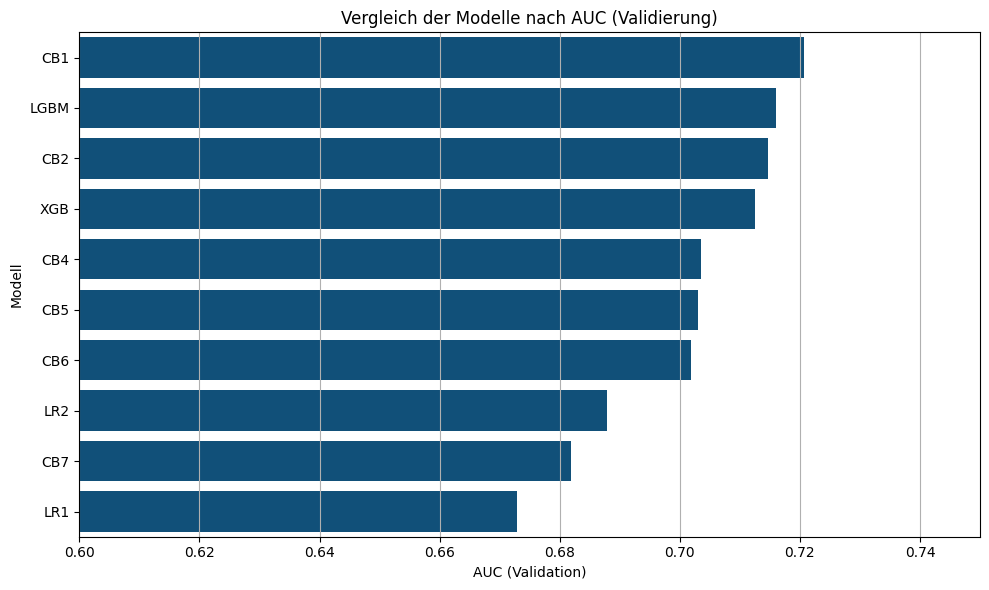

In [120]:
# Balkendiagramm: AUC
df_models = df_models.sort_values("AUC", ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_models, x="AUC", y="Modell", color=COLOR_DARK)
plt.title("Vergleich der Modelle nach AUC (Validierung)")
plt.xlim(0.60, 0.75)
plt.xlabel("AUC (Validation)")
plt.ylabel("Modell")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

**Interpretation & Empfehlung**

**1. Generelle Performance-Trends**
- **CatBoost-Varianten** liegen insgesamt im Top-AUC-Bereich (0.70–0.72).  
  - Die stärkste AUC (0.7197) erzielte das **CB2**-Modell mit Median-Imputation.  
  - Bereits das reine **Baseline-Modell** (CB1) erreichte solide 0.7082.  
- **GBM-Frameworks** wie LightGBM (0.7165) und XGBoost (0.7144) schneiden sehr nah an den CatBoost-Ergebnissen ab – jedoch zu deutlich geringeren Trainingszeiten (unter 16 s).
- **Lineare Modelle** ohne Embeddings (LR1) erreichen nur 0.6663 AUC, während der Einsatz von Embeddings (LR2) die AUC auf 0.6880 steigert.

**2. Wirkung der Embeddings**
- **Logistische Regression mit Embeddings (LR2)** verbessert den AUC von 0.6663 auf 0.6880 und verkürzt die Trainingszeit von 1.21 s auf 0.17 s.  
  - **Interpretation:** Embeddings fügen einfache linear adaptierbare, dichte Repräsentationen der Kategorien hinzu, was bei einem rein linearen Modell erheblich hilft.  
- **CatBoost mit Embeddings (CB7)** verschlechtert die AUC von 0.7082 (Baseline CB1) auf 0.6802, reduziert jedoch die Trainingszeit von 152 s auf 16 s.  
  - **Interpretation:** CatBoost besitzt eigene, leistungsstarke Algorithmen zur kategorialen Verarbeitung. Vorgefertigte, 2-dimensionale Embeddings können dessen native CTR-/Target-Encodings nicht ersetzen und führen zu Informationsverlusten.

**3. Abwägung Accuracy vs. Effizienz**
- **Höchste AUC** (0.7197) erzielt man mit CatBoost & Median-Imputation (CB2), jedoch auf Kosten hoher Trainingszeiten (≈166 s).  
- **Schnellste Modelle** sind LR2 (0.17 s) und LGBM (2.93 s) – LGBM liefert dabei eine sehr gute AUC (0.7165) ohne Embeddings.  
- **Embeddings lohnen sich**  
  - für **einfache, lineare Modelle** (starker AUC-Gewinn, minimale Laufzeit),  
  - weniger jedoch für **CatBoost** bzw. andere Gradient-Boosting-Frameworks (native Verfahren sind hier überlegen).

**4. Empfehlung**
- **Für Produktionsszenarien**, in denen **maximale AUC** gefragt ist und längere Trainingszeiten akzeptabel sind, empfiehlt sich **CatBoost** mit geeigneter Imputation und Hyperparameter-Tuning (CB2).  
- **Für ressourcenbegrenzte Umgebungen** oder **Echtzeitanwendungen** bieten sich  
  - **LightGBM** (≈0.7165 AUC, <3 s Trainingszeit) oder  
  - **Logistische Regression mit Embeddings** (≈0.6880 AUC, <0.2 s Trainingszeit)  
  an.  
- **Embeddings** sollten primär dort eingesetzt werden, wo  
  - Modelle keine starken nativen Verfahren für kategoriale Daten besitzen (z. B. lineare Modelle, einfache neuronale Netze),  
  - oder wenn **Modell-Komplexität** und **Laufzeit** eine größere Rolle spielen als marginale AUC-Verbesserungen.

Insgesamt zeigen die Ergebnisse, dass es keinen „One-Size-Fits-All“-Ansatz gibt: Die Wahl von Embeddings oder nativer Kategoriellbehandlung muss stets an das Zielmodell, die Datenkardinalität und die Anforderungen an Laufzeit und Wartbarkeit angepasst werden.


## <a id="pt7"></a><font color='red'> Aufgabe PT7: AutoML sowie Modellbewertung und Anwendung [Lernziel 5.1; 16 Punkte]</font>

* a)  Über AutoML oder ein beliebiges anderes, bisher nicht verwendetes Modell oder Modellensemble (z.B. Stacking, Blending) soll versucht werden, den AUC zu verbessern. Ein Beispiel für AutoML ist AutoGluon, siehe https://auto.gluon.ai/stable/index.html. Dabei ist, analog zum bisherigen Vorgehen, mit einem Trainings-, Validierungs- und Testset zu arbeiten und die Modellgüte zu bestimmen.

* b) Am Ende des Notebooks soll Abschnitt 11. vollständig angepasst werden und alles danach Folgende (12., Appendix) gelöscht werden. In 11.1 sollen alle in den vorangegangenen Abschnitten erstellten bzw. optimierten Modelle (ohne Search-CV-Einzelmodelle) bewertet werden. In 11.2 soll eine Auswahl von mindestens 6 Modellen ins Lift Chart einfließen und ein geeignetes Modell für die nachfolgenden Wahrscheinlichkeits- und Perzentilbetrachtungen ausgewählt werden.

__Lösung__:


a)

**Einsatz von AutoML mit AutoGluon**

In diesem Abschnitt wird das AutoML-Framework **AutoGluon** verwendet, um vollautomatisiert Modelle zur Klassifikation der Zielvariable `TARGET` zu trainieren und zu optimieren.

Ziel ist es, die Performance der AutoML-basierten Modelle mit den zuvor manuell entwickelten Verfahren zu vergleichen. Dafür wird AutoGluon auf zwei Varianten des Datensatzes angewendet:

1. **PT3-Datensatz**: Die klassische Feature-Baseline aus PT3 inklusive Kodierung und Skalierung.
2. **PT6-Datensatz**: Eine erweiterte Variante mit zusätzlichen Diagnose-Embeddings aus PT6.

Mit diesem Ansatz soll überprüft werden, ob AutoGluon in der Lage ist, die manuell entwickelten Modelle zu übertreffen oder zumindest vergleichbare Ergebnisse mit geringerem Implementierungsaufwand zu erzielen.

Um den Vergleich der AutoGluon-Modelle konsistent und wiederverwendbar zu gestalten, definieren wir zwei zentrale Hilfsfunktionen:

- **`train_autogluon_predictor`**  
  Diese Funktion übernimmt den Trainings- und Validierungsdatensatz, kombiniert sie zu AutoGluon-kompatiblen DataFrames und trainiert einen `TabularPredictor` mit definierter Zeitbegrenzung, Metrik und Presets. Sie gibt den trainierten Predictor sowie das Validierungs-Set zurück.

- **`evaluate_model_on_validation`**  
  Diese Funktion berechnet die **ROC-AUC** für das vorhergesagte Validierungsergebnis, extrahiert nur die positive Klasse (1) und speichert das Ergebnis zusammen mit Modellinformationen über `update_model_metadata`.

Diese Struktur erlaubt einen einfachen Vergleich unterschiedlicher Modellvarianten (z. B. PT3 vs. PT6) mit identischem Code-Interface.

In [121]:
# Trainiert einen AutoGluon TabularPredictor und gibt diesen zurück
def train_autogluon_predictor(
    X_train,
    y_train,
    X_val,
    y_val,
    label: str = 'TARGET',
    eval_metric: str = 'roc_auc',
    time_limit: int = 600,
    presets: str = 'medium',
    verbosity: int = 2
):
    # Trainings-DataFrame
    train_data = X_train.copy().reset_index(drop=True)
    train_data[label] = y_train.reset_index(drop=True).astype(int)

    # Validierungs-DataFrame
    val_data = X_val.copy().reset_index(drop=True)
    val_data[label] = y_val.reset_index(drop=True).astype(int)

    # Predictor instanziieren
    predictor = TabularPredictor(
        label=label,
        eval_metric=eval_metric,
        verbosity=verbosity
    )

    # Training
    predictor.fit(
        train_data=train_data,
        tuning_data=val_data,
        time_limit=time_limit,
        presets=presets
    )

    return predictor, val_data

In [122]:
# Berechnet die AUC für die positive Klasse, speichert sie in den Metadaten und gibt die AUC zurück
def evaluate_model_on_validation(predictor, val_data, model_id, model_name):
    # Features extrahieren (ohne TARGET)
    val_features = val_data.drop(columns=["TARGET"])
    
    # Wahrscheinlichkeiten vorhersagen
    proba_df = predictor.predict_proba(val_features)
    
    # Nur die Wahrscheinlichkeit für Klasse 1 nehmen
    y_val_pred_proba = proba_df[1]
    
    # AUC berechnen
    auc = roc_auc_score(val_data["TARGET"], y_val_pred_proba)
    
    # In den Metadaten speichern
    update_model_metadata(
        model_id=model_id,
        model=model_name,
        val_auc=auc
    )
    
    return auc

**AutoGluon-Modelltraining auf PT3-Daten**

In diesem Schritt wird AutoGluon auf dem PT3-Datensatz mit klassisch kodierten und skalierten Merkmalen trainiert.  
Das Modell wird entweder aus dem Zwischenspeicher geladen oder bei Bedarf neu erstellt, inklusive Zeitmessung und Metadatenaktualisierung.


In [123]:
# Modell auf PT3-Splits trainieren
model_id_ag_pt3 = "AG_PT3"
predictor_dir   = f"save/autogluon_{model_id_ag_pt3}"
metadata_field  = "training_time_seconds"

if os.path.exists(predictor_dir) and not run_AG_PT3:
    # Predictor laden, falls vorhanden
    predictor_ag_pt3 = TabularPredictor.load(predictor_dir)
    print(f"AutoGluon-Predictor '{model_id_ag_pt3}' geladen.")
    
    # Trainingszeit aus Metadaten holen
    meta_df = load_model_metadata()
    elapsed_time_ag_pt3 = meta_df.loc[
        (meta_df["model_id"] == model_id_ag_pt3) &
        (meta_df["model"]    == "AutoGluon"),
        metadata_field
    ].values[0]

else:
    # Neu trainieren
    start_time = time.time()

    predictor_ag_pt3, val_data_ag_pt3 = train_autogluon_predictor(
        X_train    = X_train,
        y_train    = y_train,
        X_val      = X_val,
        y_val      = y_val,
        label      = 'TARGET',
        eval_metric= 'roc_auc',
        time_limit = 600,
        presets    = 'medium',
        verbosity  = 2
    )

    # Predictor speichern
    predictor_ag_pt3.save(predictor_dir)
    elapsed_time_ag_pt3 = time.time() - start_time

    # Metadaten updaten
    update_model_metadata(
        model_id               = model_id_ag_pt3,
        model                  = "AutoGluon",
        training_time_seconds  = elapsed_time_ag_pt3,
        random_seed            = RANDOM_SEED,
        eval_metric            = "roc_auc"
    )

print(f"AutoGluon-Training ({model_id_ag_pt3}) abgeschlossen in {elapsed_time_ag_pt3:.2f} Sekunden.")

No path specified. Models will be saved in: "AutogluonModels\ag-20250511_175817"
Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          16
Memory Avail:       5.10 GB / 15.37 GB (33.2%)
Disk Space Avail:   6.26 GB / 475.69 GB (1.3%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['medium']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "c:\Users\Stephanie Neureiter\Desktop\ADSI Repository\ADSI\Teil II\AutogluonModels\ag-20250511_175817"
Train Data Rows:    17576
Train Data Columns: 2221
Tuning Data Rows:    7163
Tuning Data Columns: 2221
Label Column:       TARGET
AutoGluon infers your prediction problem is: 'binary' (because only two unique label

AutoGluon-Training (AG_PT3) abgeschlossen in 215.01 Sekunden.


In [124]:
# AUC auf dem PT3-Validierungs-Set berechnen und in den Metadaten speichern
auc_AG_PT3 = evaluate_model_on_validation(
    predictor=predictor_ag_pt3,
    val_data=val_data_ag_pt3,
    model_id="AG_PT3",
    model_name="AutoGluon (PT3-Splits)"
)

print(f"AUC AutoGluon (Validation) (PT3): {auc_AG_PT3:.4f}")

AUC AutoGluon (Validation) (PT3): 0.7188


In [125]:
# Das Leaderboard zeigt die intern von AutoGluon getesteten Modelle inklusive ihrer Validierungsleistung.
predictor_ag_pt3.leaderboard(val_data_ag_pt3, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.718808,0.718808,roc_auc,2.626405,1.453275,114.513932,0.007004,0.000000,0.283587,2,True,14
1,RandomForestEntr,0.710531,0.710531,roc_auc,0.617648,0.326306,17.397717,0.617648,0.326306,17.397717,1,True,6
2,LightGBM,0.709649,0.709649,roc_auc,0.107014,0.095719,2.008975,0.107014,0.095719,2.008975,1,True,4
3,XGBoost,0.708342,0.708342,roc_auc,0.195063,0.134172,25.258226,0.195063,0.134172,25.258226,1,True,11
4,LightGBMXT,0.705190,0.705190,roc_auc,0.111504,0.091448,1.825859,0.111504,0.091448,1.825859,1,True,3
5,CatBoost,0.704923,0.704923,roc_auc,0.103701,0.061975,19.452529,0.103701,0.061975,19.452529,1,True,7
6,RandomForestGini,0.704564,0.704564,roc_auc,0.649158,0.279636,17.289947,0.649158,0.279636,17.289947,1,True,5
7,LightGBMLarge,0.700840,0.700840,roc_auc,0.195060,0.128134,5.217433,0.195060,0.128134,5.217433,1,True,13
8,ExtraTreesGini,0.694036,0.694036,roc_auc,0.646852,0.329699,20.755167,0.646852,0.329699,20.755167,1,True,8
9,NeuralNetTorch,0.693462,0.693462,roc_auc,0.208604,0.159609,26.302880,0.208604,0.159609,26.302880,1,True,12


---

**AutoGluon-Modelltraining auf PT6-Daten (mit Diagnose-Embeddings)**

In [126]:
# Trainieren auf PT6-Splits
model_id_ag_pt6 = "AG_PT6"
predictor_dir    = f"save/autogluon_{model_id_ag_pt6}"
metadata_field   = "training_time_seconds"

if os.path.exists(predictor_dir) and not run_AG_PT6:
    # Bestehenden Predictor laden
    predictor_ag_pt6 = TabularPredictor.load(predictor_dir)
    print(f"AutoGluon-Predictor '{model_id_ag_pt6}' geladen.")
    
    # Trainingszeit aus Metadaten auslesen
    meta_df = load_model_metadata()
    elapsed_time_ag_pt6 = meta_df.loc[
        (meta_df["model_id"] == model_id_ag_pt6) &
        (meta_df["model"]    == "AutoGluon"),
        metadata_field
    ].values[0]

else:
    # Neu trainieren
    start_time = time.time()

    predictor_ag_pt6, val_data_ag_pt6 = train_autogluon_predictor(
        X_train    = X_PT6_train,
        y_train    = y_PT6_train,
        X_val      = X_PT6_val,
        y_val      = y_PT6_val,
        label      = 'TARGET',
        eval_metric= 'roc_auc',
        time_limit = 600,
        presets    = 'medium',
        verbosity  = 2
    )

    # Predictor speichern
    predictor_ag_pt6.save(predictor_dir)
    elapsed_time_ag_pt6 = time.time() - start_time

    # Metadaten updaten
    update_model_metadata(
        model_id              = model_id_ag_pt6,
        model                 = "AutoGluon",
        training_time_seconds = elapsed_time_ag_pt6,
        random_seed           = RANDOM_SEED,
        eval_metric           = "roc_auc"
    )

print(f"AutoGluon-Training ({model_id_ag_pt6}) abgeschlossen in {elapsed_time_ag_pt6:.2f} Sekunden.")


No path specified. Models will be saved in: "AutogluonModels\ag-20250511_180201"
Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          16
Memory Avail:       5.12 GB / 15.37 GB (33.3%)
Disk Space Avail:   5.23 GB / 475.69 GB (1.1%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['medium']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "c:\Users\Stephanie Neureiter\Desktop\ADSI Repository\ADSI\Teil II\AutogluonModels\ag-20250511_180201"
Train Data Rows:    33425
Train Data Columns: 20
Tuning Data Rows:    7163
Tuning Data Columns: 20
Label Column:       TARGET
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-val

AutoGluon-Training (AG_PT6) abgeschlossen in 86.61 Sekunden.


In [127]:
# AUC auf dem PT6-Validierungs-Set berechnen und in den Metadaten speichern
auc_AG_PT6 = evaluate_model_on_validation(
    predictor=predictor_ag_pt6,
    val_data=val_data_ag_pt6,
    model_id="AG_PT6",
    model_name="AutoGluon (PT6-Splits)"
)

print(f"AUC AutoGluon (Validation) (PT6): {auc_AG_PT6:.4f}")

AUC AutoGluon (Validation) (PT6): 0.6997


In [128]:
# Das Leaderboard zeigt die intern von AutoGluon getesteten Modelle inklusive ihrer Validierungsleistung.
predictor_ag_pt6.leaderboard(val_data_ag_pt6, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.699728,0.699728,roc_auc,0.596640,0.185658,35.332093,0.000000,0.001000,0.277659,2,True,14
1,CatBoost,0.696193,0.696193,roc_auc,0.031545,0.006017,2.581791,0.031545,0.006017,2.581791,1,True,7
2,XGBoost,0.692237,0.692237,roc_auc,0.016010,0.001794,0.531858,0.016010,0.001794,0.531858,1,True,11
3,LightGBM,0.690741,0.690741,roc_auc,0.032740,0.014000,0.711624,0.032740,0.014000,0.711624,1,True,4
4,LightGBMXT,0.690735,0.690735,roc_auc,0.036540,0.015132,0.870163,0.036540,0.015132,0.870163,1,True,3
5,LightGBMLarge,0.688991,0.688991,roc_auc,0.049387,0.032228,1.210503,0.049387,0.032228,1.210503,1,True,13
6,NeuralNetTorch,0.688890,0.688890,roc_auc,0.046884,0.036009,29.449707,0.046884,0.036009,29.449707,1,True,12
7,ExtraTreesGini,0.687998,0.687998,roc_auc,0.502202,0.140837,2.491078,0.502202,0.140837,2.491078,1,True,8
8,ExtraTreesEntr,0.685803,0.685803,roc_auc,0.457316,0.125994,2.594659,0.457316,0.125994,2.594659,1,True,9
9,NeuralNetFastAI,0.682295,0.682295,roc_auc,0.529404,0.116685,34.571823,0.529404,0.116685,34.571823,1,True,10


Zum besseren Verständnis des Modellverhaltens wird darüber hinaus die **Feature Importance** berechnet und dargestellt – insbesondere mit Blick auf den Beitrag der eingebetteten Diagnoseinformationen.

In [129]:
predictor_ag_pt6.feature_importance(data=val_data_ag_pt6)

Computing feature importance via permutation shuffling for 20 features using 5000 rows with 5 shuffle sets...
	66.01s	= Expected runtime (13.2s per shuffle set)
	13.44s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
number_inpatient,0.033661,0.003447,0.000013,5,0.040758,0.026564
discharge_disposition_id_emb1,0.021028,0.003277,0.000069,5,0.027775,0.014280
hdiag_1_emb2,0.011170,0.003868,0.001481,5,0.019135,0.003206
discharge_disposition_id_emb2,0.008819,0.001841,0.000215,5,0.012610,0.005027
hdiag_1_emb1,0.005468,0.001589,0.000768,5,0.008740,0.002196
hdiag_3_emb2,0.005084,0.002442,0.004814,5,0.010112,0.000055
hdiag_2_emb2,0.004492,0.002639,0.009500,5,0.009926,-0.000942
number_diagnoses,0.004241,0.001265,0.000848,5,0.006847,0.001636
hdiag_2_emb1,0.003780,0.003440,0.034965,5,0.010864,-0.003304
age_emb1,0.002832,0.001576,0.007948,5,0.006077,-0.000413


---

**Übersicht**

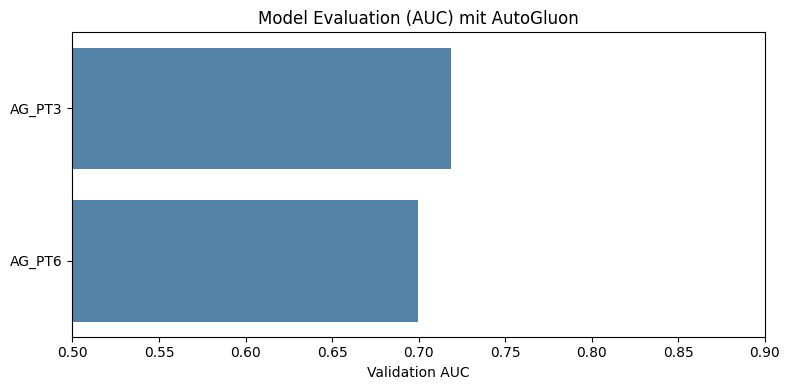

In [130]:
# AUC-Werte
model_results = [
    {"Model name": "AG_PT3", "AUC": auc_AG_PT3},
    {"Model name": "AG_PT6", "AUC": auc_AG_PT6}
]

# DataFrame bauen und plotten
df_eval = pd.DataFrame(model_results)

plt.figure(figsize=(8, 4))
sns.barplot(data=df_eval, x="AUC", y="Model name", color="steelblue")
plt.title("Model Evaluation (AUC) mit AutoGluon")
plt.xlim(0.5, 0.9)
plt.xlabel("Validation AUC")
plt.ylabel("")
plt.tight_layout()
plt.show()

<h1 id="a11"
    style="font-size:18px; font-weight:bold;">
    11. Modellbewertung und Anwendung
    <a class="anchor-link"
       href="#a11"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

<h2 style="font-size:16px; font-weight:bold;">11.1 Modellbewertung: Validierungs- und Testdatensatz</h2>

In diesem Abschnitt werden alle entwickelten Modelle systematisch hinsichtlich ihrer Vorhersagegüte bewertet. Der Vergleich basiert sowohl auf der **Validierungs-AUC (aus der Modellentwicklung)** als auch auf der **Test-AUC (für die Generalisierungsfähigkeit)**.

Die getesteten Modelle umfassen:

- klassische Baselines (z. B. Dummy, logistische Regression)
- verschiedene Varianten von CatBoost, LightGBM und XGBoost
- Modelle mit erweiterten Diagnose-Embeddings
- zwei AutoML-Modelle auf Basis von AutoGluon (PT3- vs. PT6-Daten)

Die folgende Tabelle sowie das Balkendiagramm visualisieren die Modellleistung. Besonderes Augenmerk liegt auf der Frage, ob komplexere Verfahren (z. B. Embeddings oder AutoML) die klassischen Modelle signifikant übertreffen.


In [131]:
# 1) CatBoost Baseline (CB1)
auc_CB1_test = roc_auc_score(y_raw_test, CB1.predict_proba(X_raw_test)[:, 1])

# 2) Logistische Regression (LR1)
auc_LR1_test = roc_auc_score(y_pre_test, LR1.predict(X_pre_test))

# 3) CatBoost mit Median-Imputation (CB2)
auc_CB2_test = roc_auc_score(y_pre_test, CB2.predict_proba(X_pre_test)[:, 1])

# 4) CatBoost nach Label-Encoding & Skalierung (CB4)
auc_CB4_test = roc_auc_score(y_test, CB4.predict_proba(X_test)[:, 1])

# 5) CatBoost mit Subsampling (CB5)
auc_CB5_test = roc_auc_score(y_test, CB5.predict_proba(X_test)[:, 1])

# 6) CatBoost mit optimierten Hyperparametern (CB6)
auc_CB6_test = roc_auc_score(y_test, CB6.predict_proba(X_test)[:, 1])

# 7) LightGBM mit optimierten Hyperparametern (LGBM)
auc_LGB_test = roc_auc_score(y_test, LGB.predict_proba(X_test)[:, 1])

# 8) XGBoost mit optimierten Hyperparametern (XGB)
auc_XGB_test = roc_auc_score(y_test, XGB.predict_proba(X_test)[:, 1])

# 9) Logistische Regression mit Embeddings (LR2)
auc_LR2_test = roc_auc_score(y_PT6_test, LR2.predict(X_PT6_test))

# 10) CatBoost mit Embeddings auf reduziertem Datensatz (CB7)
auc_CB7_test = roc_auc_score(y_PT6_test, CB7.predict_proba(X_PT6_test)[:, 1])

# 11) AutoGluon (PT3-Splits)
proba_AG_PT3 = predictor_ag_pt3.predict_proba(X_test)  
auc_AG_PT3_test = roc_auc_score(y_test, proba_AG_PT3[1])

# 12) AutoGluon (PT6-Splits)
proba_AG_PT6 = predictor_ag_pt6.predict_proba(X_PT6_test) 
auc_AG_PT6_test = roc_auc_score(y_PT6_test, proba_AG_PT6[1])

In [132]:
# Modellbeschreibung mit Aufgabennummern (inkl. AutoGluon)
model_info = [
    ("CB1",    "PT1",  "CatBoost Baseline-Modell auf vollständigem Datensatz"),
    ("LR1",    "PT2b", "Logistische Regression mit ausgewählten Variablen"),
    ("CB2",    "PT2c", "CatBoost mit Median-Imputation"),
    ("CB4",    "PT2f", "CatBoost nach Label-Encoding & Skalierung"),
    ("CB5",    "PT2f", "CatBoost mit Subsampling"),
    ("CB6",    "PT3b", "CatBoost mit optimierten Hyperparametern"),
    ("LGBM",   "PT3b", "LightGBM mit optimierten Hyperparametern"),
    ("XGB",    "PT3b", "XGBoost mit optimierten Hyperparametern"),
    ("LR2",    "PT6b", "Logistische Regression mit Embeddings"),
    ("CB7",    "PT6c", "CatBoost mit Embeddings auf reduziertem Datensatz"),
    ("AG_PT3", "PT3",  "AutoGluon TabularPredictor auf PT3-Splits"),
    ("AG_PT6", "PT6",  "AutoGluon TabularPredictor auf PT6-Splits")
]

# Metadaten laden (Val-AUC)
meta_df = load_model_metadata()

# Test-AUCs, zuvor berechnet
test_aucs = {
    "CB1":    auc_CB1_test,
    "LR1":    auc_LR1_test,
    "CB2":    auc_CB2_test,
    "CB4":    auc_CB4_test,
    "CB5":    auc_CB5_test,
    "CB6":    auc_CB6_test,
    "LGBM":   auc_LGB_test,
    "XGB":    auc_XGB_test,
    "LR2":    auc_LR2_test,
    "CB7":    auc_CB7_test,
    "AG_PT3": auc_AG_PT3_test,
    "AG_PT6": auc_AG_PT6_test,
}

# Val- und Test-AUC für alle Modelle sammeln
model_data = []
for model_id, aufgabe, beschreibung in model_info:
    row = meta_df[meta_df["model_id"] == model_id]
    if row.empty:
        continue
    val_auc  = row["val_auc"].values[0]
    test_auc = test_aucs.get(model_id)
    model_data.append((model_id, aufgabe, beschreibung, val_auc, test_auc))

# DataFrame ohne Trainingszeit
df_models = pd.DataFrame(
    model_data,
    columns=["Modell", "Aufgabe", "Beschreibung", "Val AUC", "Test AUC"]
)

# Tabelle anzeigen
pd.set_option('display.max_colwidth', None)
display(df_models)


,Modell,Aufgabe,Beschreibung,Val AUC,Test AUC
0,CB1,PT1,CatBoost Baseline-Modell auf vollständigem Datensatz,0.7207,0.700195
1,LR1,PT2b,Logistische Regression mit ausgewählten Variablen,0.6729,0.665910
2,CB2,PT2c,CatBoost mit Median-Imputation,0.7147,0.689866
3,CB4,PT2f,CatBoost nach Label-Encoding & Skalierung,0.7035,0.703949
4,CB5,PT2f,CatBoost mit Subsampling,0.7030,0.700308
5,CB6,PT3b,CatBoost mit optimierten Hyperparametern,0.7019,0.701127
6,LGBM,PT3b,LightGBM mit optimierten Hyperparametern,0.7161,0.709370
7,XGB,PT3b,XGBoost mit optimierten Hyperparametern,0.7126,0.704199
8,LR2,PT6b,Logistische Regression mit Embeddings,0.6878,0.662485
9,CB7,PT6c,CatBoost mit Embeddings auf reduziertem Datensatz,0.6818,0.673064


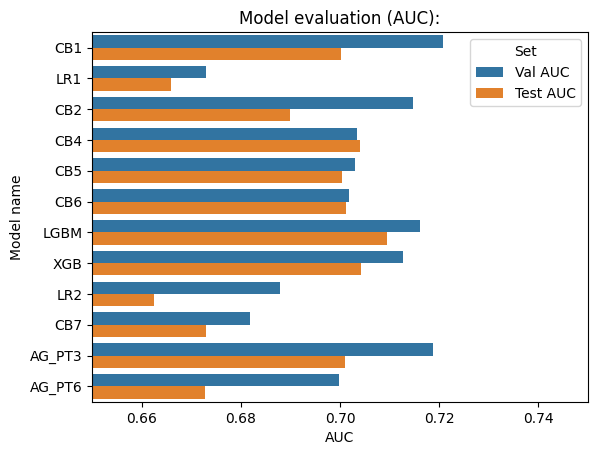

In [133]:
df_eval = df_models.melt(
    id_vars=["Modell"], 
    value_vars=["Val AUC", "Test AUC"],
    var_name="Set",
    value_name="AUC"
).rename(columns={"Modell": "Model name"})

# Figure und Plot
plt.title("Model evaluation (AUC):")
sns.barplot(data=df_eval, x="AUC", y="Model name",hue="Set")
plt.xlim(0.65, 0.75)
plt.show()

**Zusammenfassung der Modellgüte (Val AUC / Test AUC)**

Die Modellbewertung erfolgte bislang auf dem Validierungsset. Im letzten Schritt wurden nun alle Modelle auch auf dem zuvor zurückgehaltenen Testset bewertet, um die Generalisierungsfähigkeit realistisch einzuschätzen.

Die AUC-Werte bewegen sich insgesamt im Bereich von **0.66 bis 0.72**, mit nur moderaten Abweichungen zwischen Validation und Test. Einige zentrale Beobachtungen:

- **Bestes Modell auf dem Testset:**  
  **LightGBM (LGBM)** erreicht mit einer **Test-AUC von 0.7094** den höchsten Wert und bestätigt auch auf dem Validierungsset eine sehr gute Performance.

- **CatBoost-Modelle liefern stabile Ergebnisse:**  
  Das Baseline-Modell (CB1) sowie CB4, CB5 und CB6 zeigen sehr ähnliche AUC-Werte – zuverlässig im Bereich um 0.70. Sie generalisieren gut, ohne große Leistungseinbußen auf dem Testset.

- **AutoGluon überzeugt vor allem ohne Embeddings:**  
  Der TabularPredictor auf PT3 (AG_PT3) erzielt **eine starke Val-AUC (0.7188)** und schneidet mit **0.7011 auch im Test sehr solide ab**.  
  Die Variante mit Embeddings (AG_PT6) bleibt hingegen hinter den Erwartungen zurück.

- **Embeddings liefern keine systematischen Verbesserungen:**  
  Weder in der logistischen Regression (LR2), noch bei CatBoost (CB7) oder AutoGluon (AG_PT6) konnten mit Embeddings bessere AUCs erzielt werden.  
  Im Gegenteil: In mehreren Fällen verschlechterte sich die Test-AUC im Vergleich zur Validierung spürbar.

- **Val vs. Test AUC:**  
  Bei allen Modellen (mit einer Ausnahme) liegt die **Validierungs-AUC über der Test-AUC**, was typisch ist für nach Validierungsleistung ausgewählte Modelle.  
  Einzig CB4 zeigt eine leicht bessere AUC auf dem Testset – ein Hinweis auf besonders robuste Generalisierung.


Insgesamt lässt sich festhalten: Klassische Gradient-Boosting-Modelle (CatBoost, LightGBM, XGBoost) und AutoML mit guten Features (PT3) liefern die besten Ergebnisse.  
Embeddings zeigen in diesem Setup keine Leistungssteigerung, könnten aber bei anderen Modellarchitekturen oder größeren Datenmengen besser wirken.


<h2 style="font-size:16px; font-weight:bold;">11.2 Vorhersage von Hochrisikofällen</h2>

In Abschnitt 11.1 haben wir das Modell mit der höchsten Fläche unter der Receiver Operating Characteristic Curve (AUC) als das leistungsstärkste Modell bewertet – bezogen auf alle Patientengruppen, von geringem bis hohem Risiko für einen Wiedereintritt. Da jedoch insbesondere Patient:innen mit hohem Wiedereintrittsrisiko aus medizinischer und wirtschaftlicher Sicht besonders relevant sind, ist die Modellleistung in genau diesem Bereich entscheidend für die praktische Anwendung. Zur Bewertung eignet sich hier das sogenannte Lift-Chart. Ein kumulatives Lift-Chart zeigt, welchen Mehrwert ein Modell im Vergleich zu einer zufälligen Schätzung bietet, und misst diesen Vorteil in Form von sogenannten Lift-Scores.


In [134]:
# Scores für die positive Klasse der ausgewählten Modelle
y_test_CB1  = CB1.predict_proba(X_raw_test)[:, 1]
y_test_CB5  = CB5.predict_proba(X_test)[:, 1]
y_test_CB6  = CB6.predict_proba(X_test)[:, 1]
y_test_LGB  = LGB.predict_proba(X_test)[:, 1]
y_test_XGB  = XGB.predict_proba(X_test)[:, 1]
y_test_AG_PT3 = predictor_ag_pt3.predict_proba(X_test)[1]  # AutoGluon PT3

In [135]:
# Core of scikit-plot function cumulative_gain_curve (necessary, since scypi release 1.12.0 broke compatibility with scikit-plot version 0.3.7.
# Source: https://github.com/reiinakano/scikit-plot/blob/26007fbf9f05e915bd0f6acb86850b01b00944cf/scikitplot/helpers.py
def cumulative_gain_curve1(y_true, y_score):
    """This binary classification function generates the points necessary to plot the Cumulative Gain"""
    y_true, y_score = np.asarray(y_true), np.asarray(y_score)
    # make y_true a boolean vector
    y_true = (y_true == 1)
    sorted_indices = np.argsort(y_score)[::-1]
    y_true = y_true[sorted_indices]
    gains = np.cumsum(y_true)
    percentages = np.arange(start=1, stop=len(y_true) + 1)
    gains = gains / float(np.sum(y_true))
    percentages = percentages / float(len(y_true))
    gains = np.insert(gains, 0, [0])
    percentages = np.insert(percentages, 0, [0])
    return percentages, gains

# Calculate cumulative gains for lift chart 
def calculate_gains_and_percentages(y_true, y_score):
    """Calculate gains and percentages for a given model's predictions."""
    percentages, gains = cumulative_gain_curve1(y_true, y_score)
    gains_adjusted = gains[1:] / percentages[1:]  # Adjust gains starting from the second element
    return percentages[1:], gains_adjusted


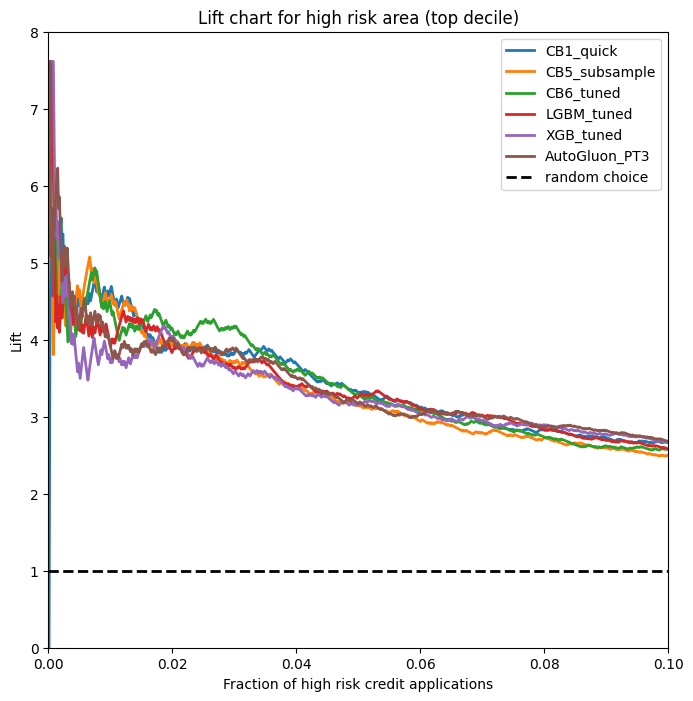

In [136]:
# Select models and prepare true and predicted values
y_true = np.array(y_test)
model_predictions = {
    'CB1_quick':     y_test_CB1,
    'CB5_subsample': y_test_CB5,
    'CB6_tuned':     y_test_CB6,
    'LGBM_tuned':    y_test_LGB,
    'XGB_tuned':     y_test_XGB,
    'AutoGluon_PT3': y_test_AG_PT3
}

# Initialize lift chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Lift chart for high risk area (top decile)")
ax.set_xlabel('Fraction of high risk credit applications')
ax.set_ylabel('Lift')
ax.set_xlim(0, 0.1)
ax.set_ylim(0, 8.0)

# Calculate and plot lift score for each model
for label, y_score in model_predictions.items():
    pct, lift = calculate_gains_and_percentages(y_true, y_score)
    ax.plot(pct, lift, lw=2, label=label)

# Plot random choice baseline
ax.plot([0, 1], [1, 1], 'k--', lw=2, label='random choice')
ax.legend(loc='upper right')
plt.show()

**Interpretation des Lift Charts (oberstes Dezil)**

Das kumulative Lift Chart zeigt, um welchen Faktor (`Lift`) sich die Trefferquote (Wiedereinweisungen, `TARGET = 1`) in den jeweils risikoreichsten Patientengruppen verbessern lässt – im Vergleich zu einer zufälligen Auswahl (Baseline = 1.0).  

Beispielsweise erreicht das oberste **1 % der Patient:innen** bei allen Modellen einen **Lift von über 6**, d. h. die Wahrscheinlichkeit, eine tatsächliche Wiedereinweisung in dieser Gruppe zu finden, ist mehr als sechsmal so hoch wie im Gesamtdurchschnitt.  

In unserem Fall zeigt sich, dass **kein einzelnes Modell das Top-Dezil deutlich dominiert**. Die sechs ausgewählten Modelle (CatBoost, LightGBM, XGBoost, AutoGluon) erreichen **vergleichbare Lift-Werte zwischen 3 und 7**, wobei leichte Vorteile für das optimierte CatBoost-Modell (CB6) sichtbar sind.

Da die Unterschiede gering ausfallen, kann bereits das einfache Baseline-Modell (CB1) zur Definition des **Top-Risikodezils** verwendet werden. Dieses wird im Folgenden genutzt, um die risikoreichsten Fälle im Testdatensatz zu identifizieren.  

Auf Basis der Modellprognosen und der bekannten Zielwerte erfolgt anschließend eine detaillierte Betrachtung von **Wahrscheinlichkeitsverteilungen und Perzentilgruppen**.


In [137]:
# Merge predicted an true values into a DataFrame
df = pd.DataFrame({
    'PredProbability': y_test_CB1,
    'TrueValue': y_test
})

# Sort by Probability in descending order
df_sorted = df.sort_values(by='PredProbability', ascending=False)
df_sorted.head()

,PredProbability,TrueValue
42055,0.872206,0
2796,0.832436,1
38531,0.791973,1
18701,0.781291,1
32585,0.735312,0


In [138]:
# Creating a 'Percentile' column based on quantile-based discretization into 100 bins
df_sorted['Percentile'] = pd.qcut(df_sorted['PredProbability'], 100, labels=range(1, 101))

# Calculate means of predicted and true values for the top 10 percentiles
percentile_means = df_sorted.groupby('Percentile', observed=True).mean().tail(10)

# Printing the results for the top 10 percentiles
print(percentile_means[::-1])  # This reverses the order to start with the highest probabilities

            PredProbability  TrueValue
Percentile                            
100                0.625656   0.611111
99                 0.474912   0.430556
98                 0.418667   0.464789
97                 0.371468   0.430556
96                 0.337622   0.236111
95                 0.312668   0.281690
94                 0.290724   0.250000
93                 0.274548   0.267606
92                 0.260320   0.250000
91                 0.247232   0.291667


**Analyse der Vorhersagewahrscheinlichkeiten nach Perzentilen**

Um die Aussagekraft des Modells im oberen Risikobereich weiter zu untersuchen, wurden die vorhergesagten Wahrscheinlichkeiten des CatBoost-Baseline-Modells (CB1) mit den tatsächlichen Zielwerten im Testdatensatz verknüpft und nach Scorehöhe in 100 Perzentile aufgeteilt.

Die Analyse der **obersten 10 Perzentile** ergibt folgende Erkenntnisse:

- Die durchschnittliche Modellwahrscheinlichkeit (`PredProbability`) steigt erwartungsgemäß von Perzentil 91 bis 100 deutlich an (von ~0.25 auf ~0.63).
- Ebenso steigt der **tatsächliche Anteil an Wiedereinweisungen (`TrueValue`)** – im obersten Perzentil liegt dieser bei **über 60 %**.
- Besonders auffällig ist, dass bereits ab dem **98. Perzentil** der True-Wert bei über **46 %** liegt – also eine **Verdreifachung der Basisrate** (die bei ~13 % liegt).
- Dies bestätigt, dass das Modell in der Lage ist, **hochrisikobehaftete Fälle systematisch zu identifizieren**, auch wenn der absolute Unterschied in der mittleren Wahrscheinlichkeit teils gering erscheint.

Diese Perzentil-basierte Segmentierung liefert eine **wertvolle Grundlage für risikoorientierte Maßnahmen**, etwa bei gezielter Nachsorgeplanung, Fallmanagement oder Ressourcenzuteilung im Gesundheitssystem.
